# <div align="center"><b> ИССЛЕДОВАНИЕ ОБЪЯВЛЕНИЙ О ПРОДАЖЕ КВАРТИР </b></div> 

**ЦЕЛЬ:** выявить параметры, влияющие на рыночную стоимость недвижимости.

# 1. ПРЕДОБРАБОТКА ДАННЫХ

В текущем разделе выполним подготовку данных к дальнейшей обработке:
- выявим количество пропусков и заполним их там, где это возможно;
- найдем явные и неявные дубликаты;
- приведем заголовки столбцов датафрейма к единому виду.

Согласно заданию на проект, обработка редких и выбивающихся значений будет выполнена позднее (в другом разделе).

# 1.1 Обзор данных

В этом разделе получим общую информацию о данных:
- размер таблицы;
- количество пропусков;
- тип данных в столбцах

In [1]:
#импортируем библиотеку pandas, сохраним ее в переменную pd для быстрого вызова
import pandas as pd

In [2]:
#импортируем модуль matplotlib.pyplot
import matplotlib.pyplot as plt

In [3]:
#импортируем библиотеку seaborn
import seaborn as sns

In [4]:
#снимем ограничение на количество столбцов датафрейма, выводимых на экран
pd.options.display.max_columns = None

#прочитаем файл с информацией об объектах недвижимости, сохраним в переменную df
try:
    # local machine
    df = pd.read_csv(r'C:\Users\vizum\Desktop\yandex_practicum\project_3_yandex_real_estate\real_estate_data.csv', sep='\t')
except:
    #yandex practicum server
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
#выведем на экран по пять первых и последних строк таблицы
display(df.head())
display(df.tail())

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

total_images  last_price  total_area first_day_exposition  rooms  \
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23694             3.7           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697             3.0          17.0          NaN     12          NaN   False   
23698             2.5           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
23694           24665.0               4232.0               1.0          796.0   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697           39140.0              10364.0               2.0          173.0   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
23694               3.0          381.0              NaN  
23695               NaN            NaN             45.0  
23696               NaN            NaN              NaN  
23697               3.0          196.0            602.0  
23698               NaN            NaN              NaN

In [6]:
#получим общую информацию о таблице с данными (далее - датафрейм, датасет)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выводы:**
1. В датафрейме 23699 строк и 22 столбца, 14 из которых имеют пропуски (причины возникновения пропусков рассмотрим далее).
2. Обнаружено несоответствие типов данных для столбцов:
 - `first_day_exposition` (должен быть тип datetime);  
 - `is_apartment` (должен быть тип bool);
 - `balcony` (должен быть тип int);
 - `parcs_around3000` (должен быть тип int);
 - `ponds_around3000` (должен быть тип int);
 - `days_exposition` (должен быть тип int).
3. Нарушен стиль snake_case  в названии столбцов `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`.

## 1.2 Исправление названий столбцов

In [7]:
#приведем название столбцов 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' в соответствие со стилем snake_case
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest','ponds_around3000':'ponds_around_3000',
               'parks_around3000':'parks_around_3000'})
#проверим результат переименования
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## 1.3 Поиск явных и неявных дубликатов

In [8]:
#проверка на наличие неявных дубликатов
#так как неявный дубликат может находиться только в текстовых данных, проверим столбец с названием населенного пункта
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В датафрейме есть неявные дубликаты, обусловленные разным обозначением вида населенного пункта (н/п), например: "Кудрово" и "деревня Кудрово".

Для упрощения поиска неявных дубликатов, напишем функцию для представления названий населенных пунктов в формате "Имя вид населенного пункта", например: "Кудрово деревня", "Пижма деревня".

In [9]:
#функция для нового представления названий населенных пунктов (н/п)
def name_place_change(locality):
    #разобъем название н/п на отдельные слова и сохраним их в список
    locality_list=str(locality).split()
    #сохраним начальную длину списка в новой переменной, так как далее понадобится длина начального списка
    length=len(locality_list)
    if length>1: #т. к. функция актуальна для н/п, названия которых состоят минимум из двух слов
        #переберем список по индексам
        for i in range(0,length):
            #если цикл встречает слово, содержащее прописную букву, все элементы списка, начиная с текущего, копируются
            #в начало списка, причем порядок следования сохраняется
            if locality_list[i].istitle():
                ins=0 #переменная, обозначающая новый индекс вставляемого элемента списка
                #цикл для перемещения нужных элементов списка в его начало
                for t in range(-length+i, 0):
                    locality_list.insert(ins, locality_list[t])
                    ins+=1
                #удаление лишних элементов списка - скопированных в начало списка
                for delete in range(0, length-i):
                    locality_list.pop()
                #формируем новое название н/п
                new_name=' '.join(locality_list)
                #выходим из первого цикла и завершаем работу функции
                return new_name
    #если название н/п состоит из одного слова, ничего не меняем и завершаем работу функции
    else:
        return locality
    
#Проверим работу функции name_place_change на тестовых данных
test_names = ['поселок Жмых',
      'деревня Малые Вешенки',
     'Коломна',
     'поселок городского типа Оленек',
      'мой любимый город Сарапул']
test_columns=['loc_name']
test_data = pd.DataFrame(data=test_names, columns=test_columns)
test_data['new_name'] = test_data['loc_name'].apply(name_place_change)
test_data

loc_name                        new_name
0                    поселок Жмых                    Жмых поселок
1           деревня Малые Вешенки           Малые Вешенки деревня
2                         Коломна                         Коломна
3  поселок городского типа Оленек  Оленек поселок городского типа
4       мой любимый город Сарапул       Сарапул мой любимый город

Функция name_place_change для тестовых данных сработала корректно. Применим ее к изучаемому датафрейму и сохраним результат в новый столбец `new_locality_name`.

In [10]:
#выберем только строки с непустыми значениями
df.loc[df['locality_name'].isna() == False, 'new_locality_name'] = df['locality_name'].apply(name_place_change)

#проверим результат замены
df.info()
display(df[['locality_name', 'new_locality_name']].head(10))
df[['locality_name', 'new_locality_name']].tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

locality_name          new_locality_name
0            Санкт-Петербург            Санкт-Петербург
1             посёлок Шушары             Шушары посёлок
2            Санкт-Петербург            Санкт-Петербург
3            Санкт-Петербург            Санкт-Петербург
4            Санкт-Петербург            Санкт-Петербург
5  городской посёлок Янино-1  Янино-1 городской посёлок
6          посёлок Парголово          Парголово посёлок
7            Санкт-Петербург            Санкт-Петербург
8             посёлок Мурино             Мурино посёлок
9            Санкт-Петербург            Санкт-Петербург

locality_name    new_locality_name
23689      Санкт-Петербург      Санкт-Петербург
23690      Санкт-Петербург      Санкт-Петербург
23691      Санкт-Петербург      Санкт-Петербург
23692               Тихвин               Тихвин
23693             Петергоф             Петергоф
23694      Санкт-Петербург      Санкт-Петербург
23695                Тосно                Тосно
23696     село Рождествено     Рождествено село
23697      Санкт-Петербург      Санкт-Петербург
23698  поселок Новый Учхоз  Новый Учхоз поселок

Функция name_place_change сработала корректно. Выведем на экран список уникальных названий населенных пунктов. Отсортируем их по алфавиту.

In [11]:
df['new_locality_name'].sort_values().unique()

array(['Агалатово деревня', 'Александровская посёлок',
       'Алексеевка посёлок', 'Аннино поселок', 'Аннино посёлок',
       'Аро деревня', 'Барышево поселок', 'Батово деревня',
       'Бегуницы деревня', 'Белогорка деревня', 'Белоостров посёлок',
       'Бокситогорск', 'Большая Вруда деревня',
       'Большая Ижора городской поселок',
       'Большая Ижора поселок городского типа',
       'Большая Пустомержа деревня', 'Большие Колпаны деревня',
       'Большое Рейзино деревня', 'Большой Сабск деревня', 'Бор деревня',
       'Борисова Грива деревня', 'Бугры поселок', 'Бугры посёлок',
       'Будогощь городской посёлок', 'Ваганово деревня',
       'Важины посёлок городского типа', 'Вартемяги деревня',
       'Вахнова Кара деревня', 'Вещево поселок станции',
       'Вещево посёлок при железнодорожной станции',
       'Виллози городской посёлок', 'Вознесенье посёлок городского типа',
       'Возрождение поселок', 'Возрождение посёлок', 'Войсковицы поселок',
       'Войскорово посёлок', 

В результате анализа уникальных значений столбца `new_locality_name` можно сказать следующее:
1) Часть неявных дубликатов обусловлена чередованием букв "е" и "ё";

2) часть неявных дубликатов вызвана различными формулировками вида населенного пункта: городской поселок/поселок городского типа, поселок станции/поселок при железнодорожной станции;

3) также возможны неявные дубликаты при указании различных видов у одного и того же населенного пункта, например: Зимитрицы деревня/Зимитрицы поселок. Следует отметить, что при подозрении на такие дубликаты необходимо выполнить проверку, они действительно обозначают один и тот же населенный пункт.

Для замены неявных дубликатов из пунктов 1-2 напишем функцию, которая в качестве аргументов принимает список с названиями, которые нужно заменить, и список с названиями, на которые нужно заменить.

In [12]:
#список с заменяемыми названиями н/п
uncorr_names = [['ё'], ['городской поселок', 'поселок городского типа'], ['поселок при железнодорожной станции', 'поселок станции'],
               ['садовое некоммерческое товарищество', 'садовое товарищество']]
#список наименований н/п, на которые будет выполняться замена
corr_names = ['е', 'пгт.', 'п.ст.', 'с.н.т.']
#функция замены "некорректных" названий на "корректные"
def correct_locality_names(df, uncorr_names, corr_names):
    for i, corr_name in enumerate(corr_names):
        for name in uncorr_names[i]:
            df['new_locality_name'] = df['new_locality_name'].str.replace(name, corr_name)
#проверим результат работы функции на тестовых данных
test_names_rename = ['посёлок станции Жмых',
      'деревня Малые Вешенки',
     'городской поселок Коломна',
     'поселок городского типа Оленек',
      'мой любимый город Сарапул',
     'садовое некоммерческое товарищество Березка']
test_columns_rename = ['new_locality_name']
test_data_rename = pd.DataFrame(data=test_names_rename, columns=test_columns_rename)
correct_locality_names(test_data_rename,uncorr_names, corr_names)
test_data_rename

new_locality_name
0                 п.ст. Жмых
1      деревня Малые Вешенки
2               пгт. Коломна
3                пгт. Оленек
4  мой любимый город Сарапул
5             с.н.т. Березка

In [13]:
#применим функцию к датафрейму
correct_locality_names(df, uncorr_names, corr_names)

#выведем отсортированный по алфавиту список уникальных названий н/п
df['new_locality_name'].sort_values().unique()

array(['Агалатово деревня', 'Александровская поселок',
       'Алексеевка поселок', 'Аннино поселок', 'Аро деревня',
       'Барышево поселок', 'Батово деревня', 'Бегуницы деревня',
       'Белогорка деревня', 'Белоостров поселок', 'Бокситогорск',
       'Большая Вруда деревня', 'Большая Ижора пгт.',
       'Большая Пустомержа деревня', 'Большие Колпаны деревня',
       'Большое Рейзино деревня', 'Большой Сабск деревня', 'Бор деревня',
       'Борисова Грива деревня', 'Бугры поселок', 'Будогощь пгт.',
       'Ваганово деревня', 'Важины пгт.', 'Вартемяги деревня',
       'Вахнова Кара деревня', 'Вещево п.ст.', 'Виллози пгт.',
       'Вознесенье пгт.', 'Возрождение поселок', 'Войсковицы поселок',
       'Войскорово поселок', 'Володарское поселок', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Вырица пгт.', 'Выскатка деревня',
       'Высокоключевой поселок', 'Высоцк', 'Гаврилово поселок',
       'Гарболово деревня', 'Гарболово поселок', 'Гатчина',
       'Гладкое поселок', 'Глаже

После замены неявных дубликатов в обозначении вида населенного пункта была выполнена проверка на неявные дубликаты, вызванные указанием разного вида населенного пункта (например, деревня Зимитрицы/поселок Зимитрицы). В результате проверки было найдено два неявных дубликата такого вида: Мурино/поселок Мурино (старое название), Кудрово/Кудрово деревня (старое название). Кроме того, некорректно сформировано название для н.п. пгт. имени Свердлова и пгт. имени Морозова: должно быть "имени Свердлова пгт" и "имени Морозова пгт.". Получившаяся неточность связана с особенностями работы функции name_place_change. Заменим все значения "Мурино поселок" на "Мурино", "Кудрово деревня" на "Кудрово" и скорректируем название пгт. им. Свердлова и пгт. им. Морозова:

In [14]:
uncorr_names=[['Мурино поселок'], ['Морозова пгт. имени'], ['Свердлова пгт. имени'], ['Кудрово деревня']]
corr_names=['Мурино', 'имени Морозова пгт.', 'имени Свердлова пгт.', 'Кудрово']

correct_locality_names(df, uncorr_names, corr_names)
df['new_locality_name'].sort_values().unique()

/tmp/ipykernel_340/235358105.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_locality_name'] = df['new_locality_name'].str.replace(name, corr_name)


array(['Агалатово деревня', 'Александровская поселок',
       'Алексеевка поселок', 'Аннино поселок', 'Аро деревня',
       'Барышево поселок', 'Батово деревня', 'Бегуницы деревня',
       'Белогорка деревня', 'Белоостров поселок', 'Бокситогорск',
       'Большая Вруда деревня', 'Большая Ижора пгт.',
       'Большая Пустомержа деревня', 'Большие Колпаны деревня',
       'Большое Рейзино деревня', 'Большой Сабск деревня', 'Бор деревня',
       'Борисова Грива деревня', 'Бугры поселок', 'Будогощь пгт.',
       'Ваганово деревня', 'Важины пгт.', 'Вартемяги деревня',
       'Вахнова Кара деревня', 'Вещево п.ст.', 'Виллози пгт.',
       'Вознесенье пгт.', 'Возрождение поселок', 'Войсковицы поселок',
       'Войскорово поселок', 'Володарское поселок', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Вырица пгт.', 'Выскатка деревня',
       'Высокоключевой поселок', 'Высоцк', 'Гаврилово поселок',
       'Гарболово деревня', 'Гарболово поселок', 'Гатчина',
       'Гладкое поселок', 'Глаже

Неявные дубликаты удалены. Выполним проверку на наличие явных дубликатов.

In [15]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

## 1.4 Заполнение пропусков

В датафрейме 14 столбцов имеют пропуски. Рассмотрим возможные причины их возникновения:
- столбец `ceiling_height` заполнялся пользователем вручную. Вероятно, пользователь не знает/не помнит высоту потолков в продаваемой недвижимости, и так как высота потолков не является распространенным критерием выбора недвижимости, не стал ее измерять/смотреть в документах. Объем пропусков для столбца `ceiling_height` составляет:

In [16]:
f"Процент пропусков в столбце ceiling_height: {df['ceiling_height'].isna().sum()/df.shape[0]:.1%}"

'Процент пропусков в столбце ceiling_height: 38.8%'

Процент пропусков в столбце `ceiling_height` составляет почти 40% от всей выборки. В связи с этим искусственное заполнение пропусков может исказить выборку. Оставим пропуски без изменений.

- столбец `floors_total` заполнялся пользователем. Скорее всего, пропуски в этом столбце вызваны теми же факторами, что и пропуски в столбе `ceiling_height`. Посчитаем процент пропусков:

In [17]:
f"Процент пропусков в столбце floors_total: {df['floors_total'].isna().sum()/df.shape[0]:.1%}"

'Процент пропусков в столбце floors_total: 0.4%'

Количество пропусков в столбце floors_total составляет менее 1% всей выборки. Строки с пропусками можно безболезненно удалить, однако пропуски могут в дальнейшем помочь выявить новые зависимости, поэтому удалять их не будем.
- столбец `living_area` заполнялся пользователем. Так как площадь является одним из основных параметров выбора недвижимости, возможно, пользователь не указал площадь намеренно (может быть, объявление ненастоящее) или возникла ошибка при обработке данных. Посчитаем объем пропущенных значений:

In [18]:
f"Процент пропусков в столбце living_area: {df['living_area'].isna().sum()/df.shape[0]:.1%}"

'Процент пропусков в столбце living_area: 8.0%'

Процент пропусков в столбце `living_area` достаточно велик, удалять эти строки нельзя. Заполнить средним/медианным значением тоже будет некорректно. Оставим пропуски без изменений.

- столбец `is_apartment` должен быть заполнен булевым типом данных: недвижимость либо апартаменты, либо нет. Возможно, пользователь заполнял его в случае, когда значение столбца должно быть `True`, и оставлял пропуск, если квартира не являлась апартаментами. Посчитаем количество пропусков и заполним их значением `False`.

In [19]:
#проверим, нет ли в столбце 'is_apartment' аномальных значений
df['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

Аномальных значений в `is_apartment` нет, можно идти дальше.

In [20]:
print(f"Количество пропусков в столбце is_apartment до заполнения пропусков: {df['is_apartment'].isna().sum()}")
print(f"Процент пропусков в столбце is_apartment до заполнения пропусков: {df['is_apartment'].isna().sum()/df.shape[0]:.1%}")
df['is_apartment'] = df['is_apartment'].fillna(False)
print(f"Количество пропусков в столбце is_apartment после заполнения пропусков: {df['is_apartment'].isna().sum()}")

Количество пропусков в столбце is_apartment до заполнения пропусков: 20924
Процент пропусков в столбце is_apartment до заполнения пропусков: 88.3%
Количество пропусков в столбце is_apartment после заполнения пропусков: 0


- пропуски в столбце `kitchen_area`, вероятно, вызваны отсутствием кухни, например, в квартирах-студиях, либо отсутствием информации у продавца. Посчитаем процент пропусков в этом столбце и проверим, справедливо ли предположение, что пропуски данного значения характерны для квартир-студий, апартаментов и свободных планировок.

In [21]:
#посчитаем процент пропусков в столбце 'kitchen_area'
print(f"Процент пропусков в столбце kitchen_area: {df['kitchen_area'].isna().sum()/df.shape[0]:.1%}\n")

#проверим, какие значения из столбцов 'is_apartment', 'studio', 'open_plan' соответствуют пропускам в столбце 'kitchen_area'
print('Значения столбца "is_apartment", соответствующие пропускам в столбце "kitchen_area":')
display(df[df['kitchen_area'].isna()].groupby(by = 'is_apartment')['total_images'].count())

print('Значения столбца "studio", соответствующие пропускам в столбце "kitchen_area":')
display(df[df['kitchen_area'].isna()].groupby(by = 'studio')['total_images'].count())

print('Значения столбца "open_plan", соответствующие пропускам в столбце "kitchen_area":')
display(df[df['kitchen_area'].isna()].groupby(by = 'open_plan')['total_images'].count())

Процент пропусков в столбце kitchen_area: 9.6%

Значения столбца "is_apartment", соответствующие пропускам в столбце "kitchen_area":


is_apartment
False    2263
True       15
Name: total_images, dtype: int64

Значения столбца "studio", соответствующие пропускам в столбце "kitchen_area":


studio
False    2129
True      149
Name: total_images, dtype: int64

Значения столбца "open_plan", соответствующие пропускам в столбце "kitchen_area":


open_plan
False    2211
True       67
Name: total_images, dtype: int64

Пропусков достаточно много - почти 10% от всей выборки. 
Проверять соответствие пропусков в `kitchen_area` значениям столбцов `is_apartment`, `studio`, `open_plan` более корректно после заполнения в них пропусков. Однако уже на этом этапе видно, что предположение о том, что пропуски в `kitchen_area` не характерны только для студий, апартаментов и квартир со свободной планировкой. Оставим пропуски без изменений.

- пропуски в столбце `balcony`, вероятно, вызваны отсутствием балкона в продаваемой недвижимости. Здесь пропуски можно заменить на 0.

In [22]:
#заменим пропуски для количества балконов на 0
df['balcony'] = df['balcony'].fillna(0)

#проверим результат заполнения
df['balcony'].isna().sum()

0

Пропуски в столбце `balcony` заполнены.

- пропуски в столбце `locality_name`, возможно, вызваны, невнимательностью пользователя при заполнении объявления, либо ошибкой при выгрузке данных. Посчитаем общий процент пропусков в этом столбце:

In [23]:
f"Процент пропусков в столбце locality_name: {df['locality_name'].isna().sum()/df.shape[0]:.1%}"

'Процент пропусков в столбце locality_name: 0.2%'

Процент пропусков в столбце `locality_name` очень мал, строки с пропусками можно удалить.

- значения в столбце `airports_nearest` формировались автоматически на основании картографических данных, поэтому пропуски могут быть вызваны тем, что расстояние от продаваемой недвижимости до ближайшего аэропорта превышает некоторое пороговое значение. Однако может быть и так, что пропуск возник случайно, и для одного и того же населенного пункта в столбце `airports_nearest` есть и корректные значения, и пропуски. Сформируем новую таблицу, в которой будет содержаться:

  *- наименования н.п., для которых хотя бы для одного объявления указано расстояние до аэропорта;*
  
  *- количество объявлений для выбранных н.п., в которых указано расстояние до аропорта;*
  
  *- общее количество объявлений для выбранных н.п.;*
  
  *- минимальное, максимальное, среднее и медианное расстояние до аэропорта в объявлениях для выбранных н.п.*
  


In [24]:
#запишем в новую таблицу наименования н.п, для которых в airports_nearest есть непустые значения и сосчитаем количество непустых
#значений для каждого н.п.
airp_compare = df[df['airports_nearest'].isna() == False].groupby(by='new_locality_name')['total_images'].count().reset_index()

#сформируем список с выбранными на предыдущем этапе н.п. (для связи между новой таблицой и исследуемым датафреймом)
#рассчитаем для каждого выбранного н.п. общее количество объявлений, минимальное, максимальное, среднее и медианное расстояния до
#аэропорта
for name in list(airp_compare['new_locality_name']):
    airp_compare.loc[airp_compare['new_locality_name'] == name, 'total_advert'] = df[df['new_locality_name'] == name]['total_images'].count()
    airp_compare.loc[airp_compare['new_locality_name'] == name, 'min_dist'] = df[df['new_locality_name'] == name]['airports_nearest'].min()
    airp_compare.loc[airp_compare['new_locality_name'] == name, 'max_dist'] = df[df['new_locality_name'] == name]['airports_nearest'].max()
    airp_compare.loc[airp_compare['new_locality_name'] == name, 'mean_dist'] = round(df[df['new_locality_name'] == name]['airports_nearest'].mean(),1)
    airp_compare.loc[airp_compare['new_locality_name'] == name, 'median_dist'] = round(df[df['new_locality_name'] == name]['airports_nearest'].median(),1)

#скорректируем название столбца с количеством непустых значений в airports_nearest
airp_compare=airp_compare.rename(columns={'total_images':'adv_wo_missed_values'})
airp_compare

new_locality_name  adv_wo_missed_values  total_advert  min_dist  \
0   Александровская поселок                     2           2.0   12781.0   
1        Белоостров поселок                     1           1.0   57769.0   
2               Зеленогорск                    24          24.0   70016.0   
3                   Колпино                   337         338.0   23649.0   
4              Красное Село                   176         178.0   23892.0   
5                 Кронштадт                    95          96.0   64931.0   
6          Левашово поселок                     1           1.0   52693.0   
7         Лисий Нос поселок                     3           3.0   54068.0   
8                 Ломоносов                   132         133.0   46502.0   
9      Металлострой поселок                    66          66.0   24629.0   
10       Молодежное поселок                     5           5.0   83758.0   
11                   Мурино                     2         590.0   51553.0   
12                 Павловск                    38          38.0   19380.0   
13        Парголово поселок                   327         327.0   44346.0   
14         Песочный поселок                     4           4.0   52504.0   
15                 Петергоф                   201         201.0   34626.0   
16   Петро-Славянка поселок                     1           1.0   20605.0   
17        Понтонный поселок                    20          20.0   28997.0   
18                   Пушкин                   369         369.0   12157.0   
19           Репино поселок                     4           4.0   61451.0   
20          Санкт-Петербург                 15636       15721.0       0.0   
21         Саперный поселок                     6           6.0   34110.0   
22               Сестрорецк                   183         183.0   50031.0   
23         Стрельна поселок                    44          44.0   26770.0   
24       Усть-Ижора поселок                     2           2.0   26500.0   
25           Шушары поселок                   436         440.0    9294.0   
26          Щеглово поселок                     1          23.0   61908.0   

    max_dist  mean_dist  median_dist  
0    13012.0    12896.5      12896.5  
1    57769.0    57769.0      57769.0  
2    81607.0    73300.2      72282.0  
3    31691.0    26375.9      26232.0  
4    38367.0    26595.6      25715.5  
5    69785.0    67469.3      67850.0  
6    52693.0    52693.0      52693.0  
7    55930.0    55302.3      55909.0  
8    56896.0    48308.3      48415.5  
9    26729.0    25726.5      25758.0  
10   84869.0    84430.2      84665.0  
11   51553.0    51553.0      51553.0  
12   24291.0    21053.3      20529.5  
13   61748.0    53994.9      53426.0  
14   56095.0    54565.5      54831.5  
15   46535.0    40184.7      39231.0  
16   20605.0    20605.0      20605.0  
17   32141.0    30581.4      30642.0  
18   21055.0    16447.9      15766.0  
19   64127.0    62293.2      61797.5  
20   54784.0    28046.2      26757.5  
21   34180.0    34142.7      34147.5  
22   61872.0    56640.5      56692.0  
23   28945.0    28148.4      28317.0  
24   26521.0    26510.5      26510.5  
25   26293.0    16061.5      17427.0  
26   61908.0    61908.0      61908.0

Из таблицы airp_compare видно, что пропуски в столбце airports_nearest наблюдаются также и для н.п., для которых хотя бы для одного объявления указано расстояние для аэропорта. Возможно, это возникло из-за ошибки анализа картографических данных. Такие пропуски заменим средним для населенного пункта (выбросов нет, можно брать среднее) расстоянием для аэропорта. Для остальных пропусков примем, что расстояние слишком велико, и пропуск возник неслучайно.
Отобразим населенные пункты, для которых в столбце airports_nearest есть и пропуски, и значения:

In [25]:
airp_compare[(airp_compare['total_advert']-airp_compare['adv_wo_missed_values'])>0]

new_locality_name  adv_wo_missed_values  total_advert  min_dist  max_dist  \
3            Колпино                   337         338.0   23649.0   31691.0   
4       Красное Село                   176         178.0   23892.0   38367.0   
5          Кронштадт                    95          96.0   64931.0   69785.0   
8          Ломоносов                   132         133.0   46502.0   56896.0   
11            Мурино                     2         590.0   51553.0   51553.0   
20   Санкт-Петербург                 15636       15721.0       0.0   54784.0   
25    Шушары поселок                   436         440.0    9294.0   26293.0   
26   Щеглово поселок                     1          23.0   61908.0   61908.0   

    mean_dist  median_dist  
3     26375.9      26232.0  
4     26595.6      25715.5  
5     67469.3      67850.0  
8     48308.3      48415.5  
11    51553.0      51553.0  
20    28046.2      26757.5  
25    16061.5      17427.0  
26    61908.0      61908.0

In [26]:
#выведем на экран названия н.п., для которых в airports_nearest есть и значения, и пропуски, и количество пропусков для этих н.п.
df[(df['city_centers_nearest'].isna()==True)&(df['airports_nearest'].isna()==True)&(df['new_locality_name'].isin(list(airp_compare['new_locality_name'])))].groupby(by='new_locality_name')['total_images'].count().reset_index()

new_locality_name  total_images
0           Колпино             1
1      Красное Село             2
2         Кронштадт             1
3         Ломоносов             1
4            Мурино           588
5   Санкт-Петербург            61
6    Шушары поселок             4
7   Щеглово поселок            22

Создадим словарь, в котором ключами будут являться названия населенных пунктов (из таблицы выше), а значениями - среднее расстояние до аэропорта от этих населенных пунктов: 

In [27]:
fill_airp_missed = dict(zip(list(airp_compare[(airp_compare['total_advert']-airp_compare['adv_wo_missed_values'])>0]['new_locality_name']),
                            list(airp_compare[(airp_compare['total_advert']-airp_compare['adv_wo_missed_values'])>0]['mean_dist'])))


Заполним пропуски для выбранных населенных пунктов:

In [28]:
#цикл перебора всех ключей в словаре fill_airp_missed
for key in fill_airp_missed:
    #выберем строки, соответствующие выбранным населенным пунктам и имеющие пропуски в столбце 'airports_nearest'
    df.loc[(df['airports_nearest'].isna())&(df['new_locality_name']==key), 'airports_nearest'] = fill_airp_missed[key]

#проверим результат замены пропусков
print('Общее количество объявлений для выбранных населенных пунктов:')
print(airp_compare['total_advert'].sum())

print('\nОбщее количество объявлений без пропусков в "airports_nearest" для выбранных населенных пунктов:')
print(df[df['airports_nearest'].isna()==False].groupby(by='new_locality_name')['open_plan'].count().sum())

Общее количество объявлений для выбранных населенных пунктов:
18820.0

Общее количество объявлений без пропусков в "airports_nearest" для выбранных населенных пунктов:
18820


Общее количество объявлений для выбранных н.п. равно сумме объявлений без пропусков в `airports_nearest`, пропуски заполнены.

- пропуски в столбце `cityCenters_nearest`, возможно, соответствуют объявлениям по продаже недвижимости в ЛО. Пропуски значений здесь могут быть вызваны теми же причинами, что и пропуски в airports_nearest - слишком больше расстояние до центра СПб не сохраняется в базу. Выполним для столбца `city_centers_nearest` те же этапы, что и для столбца `airports_nearest`:

In [29]:
#рассчитаем процент пропусков
f"Процент пропусков в столбце city_centers_nearest: {df['city_centers_nearest'].isna().sum()/df.shape[0]:.1%}"

'Процент пропусков в столбце city_centers_nearest: 23.3%'

Процент пропусков большой. Составим таблицу для н.п., для которых в `city_centers_nearest` есть как значения, так и пропуски:

In [30]:
#запишем в новую таблицу наименования н.п, для которых в city_centers_nearest есть непустые значения и сосчитаем количество непустых
#значений для каждого н.п.
city_centers_compare = df[df['city_centers_nearest'].isna() == False].groupby(by='new_locality_name')['total_images'].count().reset_index()

#сформируем список с выбранными на предыдущем этапе н.п. (для связи между новой таблицой и исследуемым датафреймом)
#рассчитаем для каждого выбранного н.п. общее количество объявлений, минимальное, максимальное, среднее и медианное расстояния до
#до центра ближайшего города
for name in list(city_centers_compare['new_locality_name']):
    city_centers_compare.loc[city_centers_compare['new_locality_name'] == name, 'total_advert'] = df[df['new_locality_name'] == name]['total_images'].count()
    city_centers_compare.loc[city_centers_compare['new_locality_name'] == name, 'min_dist'] = df[df['new_locality_name'] == name]['city_centers_nearest'].min()
    city_centers_compare.loc[city_centers_compare['new_locality_name'] == name, 'max_dist'] = df[df['new_locality_name'] == name]['city_centers_nearest'].max()
    city_centers_compare.loc[city_centers_compare['new_locality_name'] == name, 'mean_dist'] = round(df[df['new_locality_name'] == name]['city_centers_nearest'].mean(),1)
    city_centers_compare.loc[city_centers_compare['new_locality_name'] == name, 'median_dist'] = round(df[df['new_locality_name'] == name]['city_centers_nearest'].median(),1)

    #скорректируем название столбца с количеством непустых значений в city_centers_nearest
city_centers_compare=city_centers_compare.rename(columns={'total_images':'adv_wo_missed_values'})
city_centers_compare

new_locality_name  adv_wo_missed_values  total_advert  min_dist  \
0   Александровская поселок                     2           2.0   27352.0   
1        Белоостров поселок                     1           1.0   38868.0   
2               Зеленогорск                    24          24.0   51115.0   
3                   Колпино                   337         338.0   29436.0   
4              Красное Село                   176         178.0   27317.0   
5                 Кронштадт                    95          96.0   46657.0   
6          Левашово поселок                     1           1.0   25727.0   
7         Лисий Нос поселок                     3           3.0   26368.0   
8                 Ломоносов                   132         133.0   36816.0   
9      Металлострой поселок                    66          66.0   26696.0   
10       Молодежное поселок                     5           5.0   64857.0   
11                   Мурино                     2         590.0   21888.0   
12                 Павловск                    38          38.0   31533.0   
13        Парголово поселок                   327         327.0   17994.0   
14         Песочный поселок                     4           4.0   25867.0   
15                 Петергоф                   201         201.0   29815.0   
16   Петро-Славянка поселок                     1           1.0   27165.0   
17        Понтонный поселок                    20          20.0   30709.0   
18                   Пушкин                   368         369.0   24311.0   
19           Репино поселок                     4           4.0   42550.0   
20          Санкт-Петербург                 15660       15721.0     181.0   
21         Саперный поселок                     6           6.0   35822.0   
22               Сестрорецк                   183         183.0   31130.0   
23         Стрельна поселок                    44          44.0   21813.0   
24       Усть-Ижора поселок                     2           2.0   28212.0   
25           Шушары поселок                   436         440.0   17012.0   
26          Щеглово поселок                     1          23.0   34085.0   

    max_dist  mean_dist  median_dist  
0    27584.0    27468.0      27468.0  
1    38868.0    38868.0      38868.0  
2    62706.0    54617.6      53381.0  
3    37477.0    32113.8      32018.0  
4    41792.0    30020.3      29140.5  
5    51511.0    49195.7      49575.0  
6    25727.0    25727.0      25727.0  
7    28246.0    27613.3      28226.0  
8    61495.0    50740.0      51677.0  
9    29217.0    27561.3      27602.0  
10   65968.0    65529.2      65764.0  
11   21888.0    21888.0      21888.0  
12   36445.0    33206.9      32683.0  
13   24415.0    19924.8      19311.0  
14   27835.0    26475.2      26099.5  
15   49574.0    35468.9      33771.0  
16   27165.0    27165.0      27165.0  
17   33853.0    32293.4      32354.0  
18   35610.0    28745.4      27930.5  
19   45226.0    43392.2      42896.5  
20   29493.0    11601.3      12244.5  
21   35892.0    35854.7      35859.5  
22   42971.0    34624.5      34821.0  
23   24134.0    23376.1      23506.0  
24   28233.0    28222.5      28222.5  
25   32079.0    24243.4      24212.0  
26   34085.0    34085.0      34085.0

In [31]:
#отобразим строки таблицы city_centers_nearest для н.п., для которых в city_centers_nearest есть как пропуски, так и значения
city_centers_compare[(city_centers_compare['total_advert']-city_centers_compare['adv_wo_missed_values'])>0]

new_locality_name  adv_wo_missed_values  total_advert  min_dist  max_dist  \
3            Колпино                   337         338.0   29436.0   37477.0   
4       Красное Село                   176         178.0   27317.0   41792.0   
5          Кронштадт                    95          96.0   46657.0   51511.0   
8          Ломоносов                   132         133.0   36816.0   61495.0   
11            Мурино                     2         590.0   21888.0   21888.0   
18            Пушкин                   368         369.0   24311.0   35610.0   
20   Санкт-Петербург                 15660       15721.0     181.0   29493.0   
25    Шушары поселок                   436         440.0   17012.0   32079.0   
26   Щеглово поселок                     1          23.0   34085.0   34085.0   

    mean_dist  median_dist  
3     32113.8      32018.0  
4     30020.3      29140.5  
5     49195.7      49575.0  
8     50740.0      51677.0  
11    21888.0      21888.0  
18    28745.4      27930.5  
20    11601.3      12244.5  
25    24243.4      24212.0  
26    34085.0      34085.0

In [32]:
#создадим словарь {населенный пункт:среднее расстояние до центра ближайшего города}
fill_city_centers_missed = dict(zip(list(city_centers_compare[(city_centers_compare['total_advert']-city_centers_compare['adv_wo_missed_values'])>0]['new_locality_name']),
                            list(city_centers_compare[(city_centers_compare['total_advert']-city_centers_compare['adv_wo_missed_values'])>0]['mean_dist'])))

In [33]:
#цикл перебора всех ключей в словаре fill_city_centers__missed
for key in fill_city_centers_missed:
    #выберем строки, соответствующие выбранным населенным пунктам и имеющие пропуски в столбце 'city_centers_nearest'
    df.loc[(df['city_centers_nearest'].isna())&(df['new_locality_name']==key), 'city_centers_nearest'] = fill_city_centers_missed[key]

#проверим результат замены пропусков
print('Общее количество объявлений для выбранных населенных пунктов:')
print(city_centers_compare['total_advert'].sum())

print('\nОбщее количество объявлений без пропусков в "city_centers_nearest" для выбранных населенных пунктов:')
print(df[df['city_centers_nearest'].isna()==False].groupby(by='new_locality_name')['open_plan'].count().sum())

Общее количество объявлений для выбранных населенных пунктов:
18820.0

Общее количество объявлений без пропусков в "city_centers_nearest" для выбранных населенных пунктов:
18820


Заметим, что в таблицах airp_compare и city_centers_compare столбцы `new_locality_name`- `total_advert` получились практически одинаковыми - различие только в строке для г. Пушкин (в столбце dv_wo_missed_values). Следовательно, количество пропущенных значений в `city_centers_nearest` в исследуемом датафрейме на 1 больше, чем в `airports_nearest`. 

Сравнение столбцов `adv_wo_missed_values` и `total_advert` в таблицах airp_compare и city_centers_compare показывает, что количество пропусков в `airports_nearest` и `city_centers_nearest` для отдного и того же н.п. одинаково (за исключением г. Пушкин). Возможно, пропуски в этих столбцах встречаются в одних и тех же объявлениях.

- пропуски в столбцах `parks_nearest`, `parks_around`, `parks_around_3000`, `ponds_around_3000` могут быть вызваны отсутствием в заданном радиусе прудов/парков и ошибками работы алгоритма по анализу картографических данных. Заметим, что пропусков в `parks_nearest` and `ponds_nearest` больше, чем в `parks_around_3000`, `ponds_around_3000`. Может быть, в parks/ponds_around_3000 попали нулевые значения, а в те же объявления в parks/ponds_nearest - NaN? Проверим:

In [34]:
#проверим, какие значения в parks_around_3000 соответствуют пропускам в parks_nearest
df[df['parks_nearest'].isna()]['parks_around_3000'].unique()

array([ 0., nan])

In [35]:
#проверим, какие значения в parks_nearest соответствуют пропускам в parks_around_3000
df[df['parks_around_3000'].isna()]['parks_nearest'].unique()

array([nan])

In [36]:
#проверим, какие значения в ponds_around_3000 соответствуют пропускам в ponds_nearest
df[df['ponds_nearest'].isna()]['ponds_around_3000'].unique()

array([ 0., nan])

In [37]:
#проверим, какие значения в ponds_nearest соответствуют пропускам в ponds_around_3000
df[df['ponds_around_3000'].isna()]['ponds_nearest'].unique()

array([nan])

Действительно, в результате проверки выявлено:
    
    1) пропускам в столбце `parks_nearest` соответствуют значения 0 и NaN в parks_around_3000. Пропускам в `parks_around_3000` в столбце `parks_nearest` соответсвуют только пропуски. В связи с этим, пропусков в `parks_around_3000` больше, чем в `parks_nearest`;
    2) пропускам в столбце `ponds_nearest` соответствуют значения 0 и NaN в `ponds_around_3000`. Пропускам в `ponds_around_3000` в столбце `ponds_nearest` соответсвуют только пропуски. В связи с этим, пропусков в `ponds_around_3000` больше, чем в `ponds_nearest`;
    3) пропуски в столбцах `parks/ponds_around_3000` вызваны отсутствием в пределах 3 км парков и прудов - заменим пропуски на 0;
    4) пропуски в столбцах `parks_ponds_nearest`, вероятно, вызваны отсутствием парков/прудов внутри радиуса поиска при анализе картографических данных. Пропуски здесь заполнять не будем (на ноль не совсем корректно, квартира же вряд ли находится внутри парка/пруда).

In [38]:
lst_for_fillna=['parks_around_3000', 'ponds_around_3000']
for col in lst_for_fillna:
    df[col] = df[col].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в parks_around_3000, ponds_around_3000 заменены на 0.

- пропуски в столбце `days_exposition` могут быть обусловлены тем, что объявление до сих пор активно: его или забыли снять с публикации, или оно еще актуально. Оставим пропуски без изменений.

После того, как все возможные пропуски заполнены, удалим строки с пропусками в `floors_total` (0.4% пропущенных значений) и в `locality_name`(0.2% пропущенных значений).

In [39]:
#удалим строки с пропусками в 'floors_total', 'locality_name'
df=df.dropna(subset=['floors_total', 'locality_name'])

#удалим также столбец 'locality_name', т.к. названия н.п. есть в 'new_locality_name'
df.pop('locality_name')

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  airports_nearest      18741 non-null  float64
 15  city_centers_neares

## 1.5 Изменение типов данных

In [40]:
#посмотрим на типы данных в датафрейме после заполнения пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  airports_nearest      18741 non-null  float64
 15  city_centers_neares

Заметим, что после заполнения пропусков в `is_apartment` тип столбца изменился на bool, что и требовалась.
Выполним дальнейшие преобразования:

 - `first_day_exposition` преобразуем в datetime;  
 - `balcony` преобразуем в int;
 - `parks_around_3000` преобразуем в int;
 - `ponds_around_3000` преобразуем в int;
 - `floors_total` преобразуем в int.
 
 Столбец `days_exposition` также должен иметь тип int, однако из-за наличия в нем пропусков преобразование не выполнить. Оставим тип данных этого столбца без изменений.

In [41]:
#изменим тип столбца 'balcony'
df['balcony']=df['balcony'].astype('int')

#изменим тип столбца 'first_day_exposition'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#изменим тип столбца 'parks_around_3000'
df['parks_around_3000'] = df['parks_around_3000'].astype('int', errors = 'ignore')

#изменим тип столбца 'ponds_around_3000'
df['ponds_around_3000'] = df['ponds_around_3000'].astype('int', errors = 'ignore')

#изменим тип столбца 'parks_nearest'
df['parks_nearest'] = df['parks_nearest'].astype('int', errors = 'ignore')

#изменим тип столбца 'ponds_nearest'
df['ponds_nearest'] = df['ponds_nearest'].astype('int', errors = 'ignore')

#изменим тип столбца 'ponds_nearest'
df['floors_total'] = df['floors_total'].astype('int', errors = 'ignore')

#проверим результат изменения типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Типы данных нужных столбцов изменены, объем используемой памяти уменьшился. Можно идти дальше.

# 2. Подсчет и добавление данных в таблицу 

## 2.1 Расчет цены квадратного метра

Стоимость квадратного метра рассчитаем по формуле: *square_meter_price = total_area/last_price*. Исходя из общей информации, полученной на этапе знакомства с датафреймом (раздел 1.1), пропуски в столбцах, используемых для расчета, отутствуют и оба столбца заполнены только числовыми значениями. Для получения корректной стоимости квадратного метра проверим, что в столбцах `total_area` и `last_price` нет нулевых и отрицательных значений, после чего перейдем непосредственно к расчетам.

In [45]:
#проверка наличия отрицательных и нулевых значений в total_area и last_price
print('Минимальное значение площади:', df['total_area'].min())
print('Минимальное значение цены:', df['last_price'].min())

Минимальное значение площади: 12.0
Минимальное значение цены: 12190.0


In [46]:
#рассчитаем общую площадь недвижимости для каждого объявления и запишем в таблицу
#т.к. пропуски представлены NaN, в результате математических операций с пропуском вернется NaN


#рассчитаем стоимость квадратного метра
df['square_meter_price'] = round(df['last_price']/(df['total_area']), 0)

#проверим результат
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony  airports_nearest  city_centers_nearest  \
0      False          25.0        0           18863.0               16028.0   
1      False          11.0        2           12817.0               18603.0   
2      False           8.3        0           21741.0               13933.0   
3      False           NaN        0           28098.0                6800.0   
4      False          41.0        0           31856.0                8098.0   

   parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                  1          482.0                  2          755.0   
1                  0            NaN                  0            NaN   
2                  1           90.0                  2          574.0   
3                  2           84.0                  3          234.0   
4                  2          112.0                  1           48.0   

   days_exposition new_locality_name  square_meter_price  
0              NaN   Санкт-Петербург            120370.0  
1             81.0    Шушары поселок             82921.0  
2            558.0   Санкт-Петербург             92786.0  
3            424.0   Санкт-Петербург            408176.0  
4            121.0   Санкт-Петербург            100000.0

## 2.2 Определение дня недели, месяца и года публикации объявления

In [47]:
#определим день недели публикации
df['weekday']=df['first_day_exposition'].dt.weekday

#определим месяц публикации
df['month']=df['first_day_exposition'].dt.month

#определим год публикации
df['year']=df['first_day_exposition'].dt.year

#проверим результат
display(df.head())

print(df['weekday'].sort_values().unique())
print(df['month'].sort_values().unique())
print(df['year'].sort_values().unique())

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony  airports_nearest  city_centers_nearest  \
0      False          25.0        0           18863.0               16028.0   
1      False          11.0        2           12817.0               18603.0   
2      False           8.3        0           21741.0               13933.0   
3      False           NaN        0           28098.0                6800.0   
4      False          41.0        0           31856.0                8098.0   

   parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                  1          482.0                  2          755.0   
1                  0            NaN                  0            NaN   
2                  1           90.0                  2          574.0   
3                  2           84.0                  3          234.0   
4                  2          112.0                  1           48.0   

   days_exposition new_locality_name  square_meter_price  weekday  month  year  
0              NaN   Санкт-Петербург            120370.0        3      3  2019  
1             81.0    Шушары поселок             82921.0        1     12  2018  
2            558.0   Санкт-Петербург             92786.0        3      8  2015  
3            424.0   Санкт-Петербург            408176.0        4      7  2015  
4            121.0   Санкт-Петербург            100000.0        1      6  2018

[0 1 2 3 4 5 6]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2014 2015 2016 2017 2018 2019]


Определение дня недели, месяца и года размещения объявления выполнено, аномальных значений в столбцах `weekday`, `month`, `year` нет.

## 2.3 Определение этажа квартиры <a id='2.3'></a>

Для определения этажа квартиры напишем функцию, которую применим к изучаемому датафрейму.
Заданием предлагается разделить объявления по следующим категориям, в зависимости от этажа:
- первый;
- последний;
- другой (не первый и не последний).

Так как среди объявлений встречаются одноэтажные дома, добавим еще одну категорию: 'одноэтажный дом'.

In [48]:
#объявим функцию для категоризации объявлений по этажу
def floor_category(row):
    #воспользуемся конструкцией try-except для корректной обработки ошибок
    try:
        #проверка на корректность указания этажа продаваемой недвижимости
        if row['floor']<=0:
            return 'неверно указан этаж'
        #проверка на корректность указания общего количества этажей в доме
        elif row['floors_total']<=0:
            return 'неверное количество этажей в доме'
        #проверка на принадлежность объявления к какой-либо категории
        elif row['floor']==1:
            if row['floors_total']==1:
                return 'одноэтажный дом'
            else:
                return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        elif 1<row['floor']<row['floors_total']:
            return 'другой'
    except:
        #результат при возникновении ошибки, не учтенной в блоке except
        return 'неизвестная ошибка'

#проверим работу функции floor_check на тестовых данных
floor_test = pd.DataFrame({'floor':[1, 1, 0, 10, 15, 'gg', 13, 13], 'floors_total':[1, 2, 3, 11, 15, 11, 0, 14]})
floor_test['floors_category']=floor_test.apply(floor_category, axis=1)
floor_test

floor  floors_total                    floors_category
0     1             1                    одноэтажный дом
1     1             2                             первый
2     0             3                неверно указан этаж
3    10            11                             другой
4    15            15                          последний
5    gg            11                 неизвестная ошибка
6    13             0  неверное количество этажей в доме
7    13            14                             другой

Для тестовых данных функция *floors_check* сработала корректно. Применим ее к основному датафрейму.

In [49]:
#применим функцию категоризации по этажу 
df['floors_category']=df.apply(floor_category, axis=1)

#выведем первые 5 строк датафрейма
display(df.head())

#проверим разбиение объявлений на категории
df['floors_category'].value_counts()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony  airports_nearest  city_centers_nearest  \
0      False          25.0        0           18863.0               16028.0   
1      False          11.0        2           12817.0               18603.0   
2      False           8.3        0           21741.0               13933.0   
3      False           NaN        0           28098.0                6800.0   
4      False          41.0        0           31856.0                8098.0   

   parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                  1          482.0                  2          755.0   
1                  0            NaN                  0            NaN   
2                  1           90.0                  2          574.0   
3                  2           84.0                  3          234.0   
4                  2          112.0                  1           48.0   

   days_exposition new_locality_name  square_meter_price  weekday  month  \
0              NaN   Санкт-Петербург            120370.0        3      3   
1             81.0    Шушары поселок             82921.0        1     12   
2            558.0   Санкт-Петербург             92786.0        3      8   
3            424.0   Санкт-Петербург            408176.0        4      7   
4            121.0   Санкт-Петербург            100000.0        1      6   

   year floors_category  
0  2019          другой  
1  2018          первый  
2  2015          другой  
3  2015          другой  
4  2018          другой

другой             17326
последний           3330
первый              2884
одноэтажный дом       25
Name: floors_category, dtype: int64

Категоризация выполнена, ошибок, вызванных неверными значениями номера этажа и общего количества этажей в доме, не обнаружено.

## 2.4 Определение соотношения жилой и общей площади, площади кухни и общей площади

In [50]:
#рассчитаем отношение жилой площади к общей площади помещения
df['living_to_total'] = round(df['living_area']/df['total_area'], 2)

#рассчитаем отношение площади кухни к общей площади помещения
df['kitchen_to_total'] = round(df['kitchen_area']/df['total_area'], 2)

#проверим результат
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony  airports_nearest  city_centers_nearest  \
0      False          25.0        0           18863.0               16028.0   
1      False          11.0        2           12817.0               18603.0   
2      False           8.3        0           21741.0               13933.0   
3      False           NaN        0           28098.0                6800.0   
4      False          41.0        0           31856.0                8098.0   

   parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                  1          482.0                  2          755.0   
1                  0            NaN                  0            NaN   
2                  1           90.0                  2          574.0   
3                  2           84.0                  3          234.0   
4                  2          112.0                  1           48.0   

   days_exposition new_locality_name  square_meter_price  weekday  month  \
0              NaN   Санкт-Петербург            120370.0        3      3   
1             81.0    Шушары поселок             82921.0        1     12   
2            558.0   Санкт-Петербург             92786.0        3      8   
3            424.0   Санкт-Петербург            408176.0        4      7   
4            121.0   Санкт-Петербург            100000.0        1      6   

   year floors_category  living_to_total  kitchen_to_total  
0  2019          другой             0.47              0.23  
1  2018          первый             0.46              0.27  
2  2015          другой             0.61              0.15  
3  2015          другой              NaN               NaN  
4  2018          другой             0.32              0.41

# 3. Исследовательский анализ данных

## 3.1 Анализ площади продаваемой недвижимости <a id='3.1'></a>

В текущем разделе изучим статистическую информацию о площади недвижимости, построим гистограмму распределения значений и найдем наиболее часто встречающиеся варианты площади.

In [51]:
#для получения общей информации о площади продаваемой недвижимости применим метод describe() к столбцам, несущим информацию
#о площади: 'living_area', 'kitchen_area', 'total_area'
df.loc[:, ['living_area', 'kitchen_area', 'total_area']].describe()

living_area  kitchen_area    total_area
count  21700.000000  21343.000000  23565.000000
mean      34.454822     10.560994     60.322824
std       22.045359      5.900630     35.657060
min        2.000000      1.300000     12.000000
25%       18.600000      7.000000     40.000000
50%       30.000000      9.100000     52.000000
75%       42.300000     12.000000     69.700000
max      409.700000    112.000000    900.000000

Анализируя статистическую информацию о данных в столбцах 'living_area', 'kitchen_area', 'total_area', можно сделать следующие выводы:

- средняя площадь жилой, кухонной и общей площадей составляет 34.4, 10.4, 44.9 кв.м. соответственно;
- медианная площадь жилой, кухонной и общей площадей составляет 30, 9, 39 м соответственно;
- среди всех объявлений встречается недвижимость как с очень маленькой площадью (2 кв.м. - комната или пользовательская опечатка при созданиий объявления), так и с очень большой (521 кв.м. Неплохо, однако :)) )

Построим гистограмму для распределения значений общей площади (отдельно анализировать жилую и кухонную площадь не имеет смысла, так как стоимость квартиры считается, исходя из общей площади).

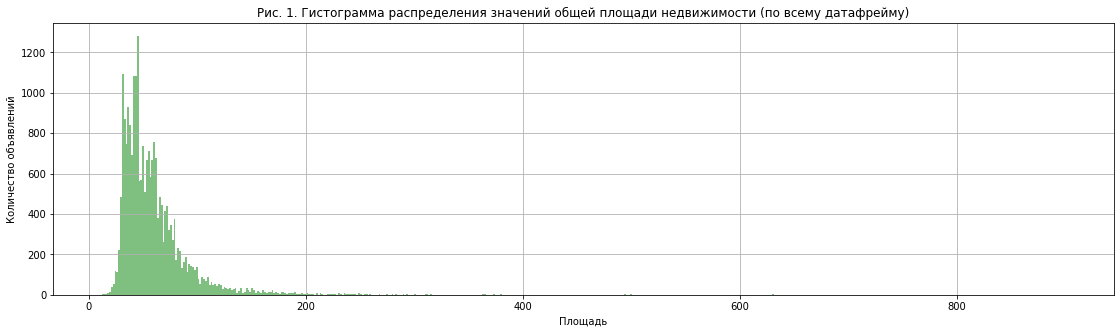

In [52]:
#построим гистрограмму на 522 корзины (округрим максимальное значение общей площади в большую сторону)
df['total_area'].hist(bins=522, figsize=(19, 5), color='green', alpha=0.5);
plt.title('Рис. 1. Гистограмма распределения значений общей площади недвижимости (по всему датафрейму)');
plt.xlabel('Площадь');
plt.ylabel('Количество объявлений');

На гистограмме наблюдается три локальных пика: около 20 кв.м., 35 кв.м., 50 кв.м. Наличие локальных пиков может быть объяснено использованием типовых проектов застройки еще при СССР, поэтому определенные величины площадей могут встречаться чаще других.
Больше всего продается недвижимости с площадью около 25 кв.м. Совсем редко встречаются площади менее 10 кв.м. и более 150 кв.м. Построим точечный график для значений общей площади.

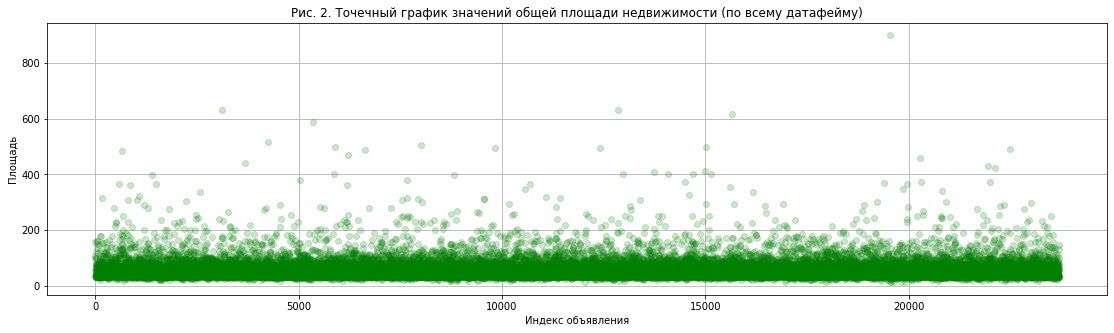

In [53]:
df['total_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5))
plt.title('Рис. 2. Точечный график значений общей площади недвижимости (по всему датафейму)')
plt.xlabel('Индекс объявления')
plt.ylabel('Площадь');

На точечном графике более наглядо видно, что большее количество значений находится от 10 до 100 кв.м. Число объектов недвижимости с площадью от 100 до 200 кв.м. заметно снижается, площадь более 200 кв.м. встречается уже редко.

Построим снова гистограмму распределения площади от 0 до 200 кв.м. на 200 корзин.

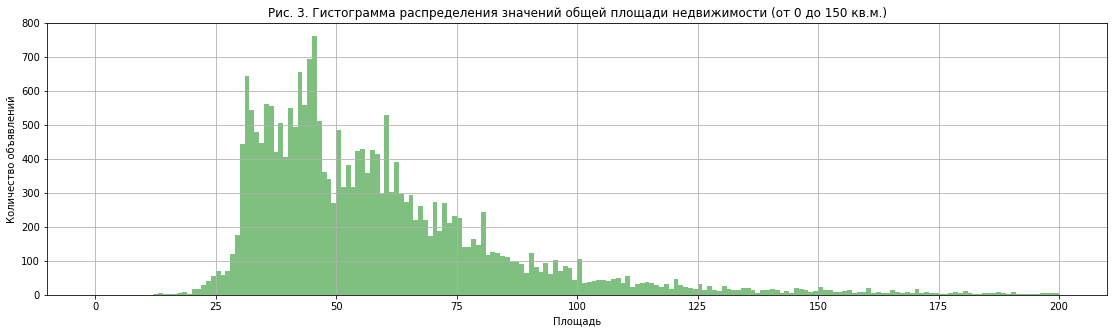

In [54]:
df['total_area'].hist(bins=200, range=(0,200), figsize=(19, 5), color='green', alpha=0.5)
plt.title('Рис. 3. Гистограмма распределения значений общей площади недвижимости (от 0 до 150 кв.м.)');
plt.xlabel('Площадь');
plt.ylabel('Количество объявлений');

На укрупненной диаграмме видно следующее:

- наиболее встречаемые значения общей площади продаваемой недвижимости - от 30 до 47 кв.м;
- для площади 49-50 кв.м. наблюдается резкий спад, по сравнению с соседними значениями. Начиная с 30 до 46 кв.м. количество объявлений резко растет, затем наблюдается относительно пологий спад с локальными минимумами и максимумами;
- в целом, можно сказать, что наиболее типичные значения площади для продаваемой недвижимости: от 30 до 47 кв.м.

**Выводы**:
1. Минимальное значение общей площади составляет 12 кв.м, максимальное - 900 кв.м.
2. Гистограмма распределения значений общей площади похожа на нормальное распределение, однако выделяется три локальных пика: 40-47 кв.м. (1 место по встречаемости), 30-39 кв.м. (2 место по встречаемости), 50-63 кв.м. (3 место по встречаемости), что может быть результатом типовой застройки СПб и Ленинградской области.
3. Чаще всего встречаются квартиры с площадью 44-46 кв.м. (более 650 объявлений на каждый  из интервалов 44-45 кв.м., 45-46 кв.м). 
4. Реже всего встречается площадь со значениями меньше 20 кв.м. и более 175 кв.м. (менее 10 объявлений на каждый интервал с шагом 1 кв.м).

## 3.2 Анализ цены продаваемой недвижимости

Рассмотрим распределения стоимости продаваемой недвижимости:
- за весь объект;
- за квадратный метр.

Получим статистическую информацию и построим гистрограммы распределения.

In [55]:
#для получения общей информации о цене продаваемой недвижимости применим метод describe()
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Из статистических данных о столбце 'last_price' можно заметить, что среднее значение практически в полтора раза больше медианного, что вызвано присутствием в выборке очень высоких цен. Например, максимальная стоимость недвижимости для рассматриваемой выборки составляет 763 миллиона!

Построим гистограмму распределения стоимости недвижимости.

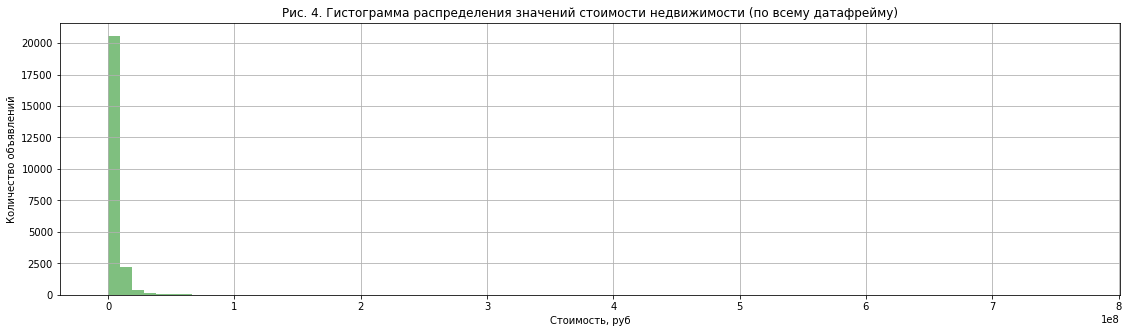

In [56]:
df['last_price'].hist(bins=80, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 4. Гистограмма распределения значений стоимости недвижимости (по всему датафрейму)');
plt.xlabel('Стоимость, руб');
plt.ylabel('Количество объявлений');

Величины, значительно превышающие типовые для выборки, делают гистограмму неудобной для восприятия и анализа. По получившейся гистограмме можно сказать лишь, что практически вся невижимость (более 20000 объявлений) продается за цену менее 10 миллионов. Построим точечный график стоимости и на его основе выберем диапазон для построения гистограммы.

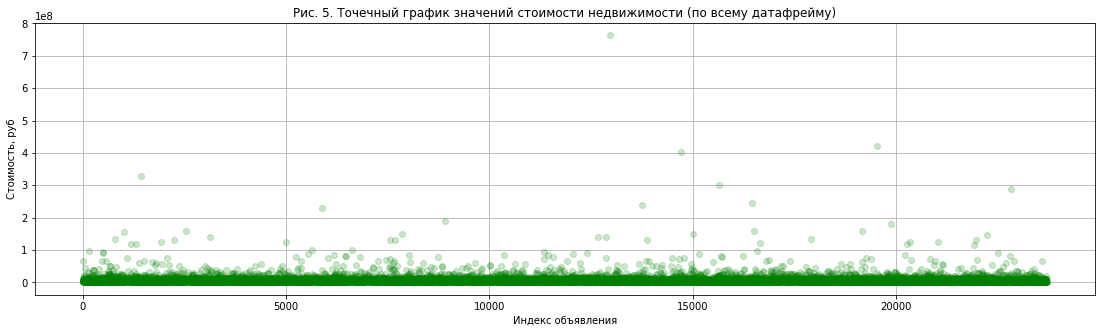

In [57]:
df['last_price'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5))
plt.title('Рис. 5. Точечный график значений стоимости недвижимости (по всему датафрейму)');
plt.xlabel('Индекс объявления');
plt.ylabel('Стоимость, руб');

По полученному точечному графику видим, что в подавляющем числе объявлений указана цена менее 50 млн. При этом максимальная цена (763 млн) имеет большой отрыв от второй по величине стоимости - почти на 300 млн. От 50 до 100 млн количество объявлений резко уменьшается. Свыше 100 млн остается только 37 объявлений. Посчитаем, сколько процентов занимают объявления с указанной ценой до 50 млн, от 50 до 100 млн, свыше 100 млн:

In [58]:
print(f"До 50 млн, включительно: {df[df['last_price']<=50000000]['total_images'].count()/df.shape[0]:.1%}")
print(f"От 50 (не вкл.) до 100 млн. (вкл.): {df[(df['last_price']<=100000000)&(df['last_price']>50000000)]['total_images'].count()/df.shape[0]:.1%}")
print(f"Более 100 млн.: {df[df['last_price']>100000000]['total_images'].count()/df.shape[0]:.1%}")

До 50 млн, включительно: 99.4%
От 50 (не вкл.) до 100 млн. (вкл.): 0.4%
Более 100 млн.: 0.2%


Построим гистограмму на 100 корзин (по полмиллиона в корзине :) ) по значениям цены до 50 млн включительно, так как этот диапазон включает 99.4% значений.

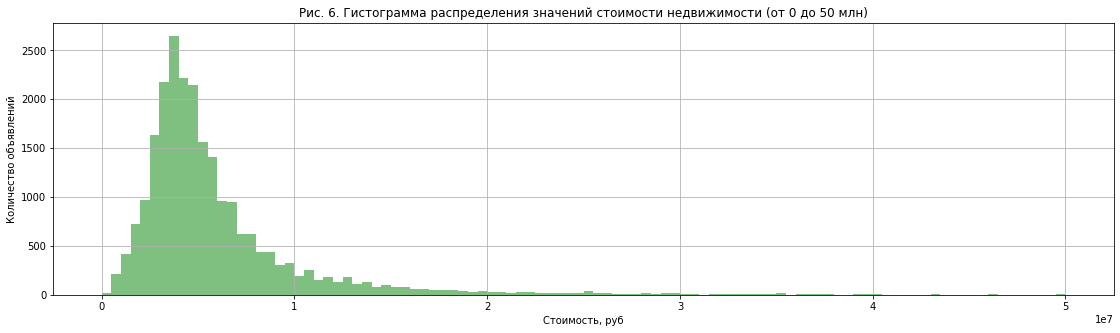

In [59]:
df['last_price'].hist(range=(0,50000000), bins=100, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 6. Гистограмма распределения значений стоимости недвижимости (от 0 до 50 млн)');
plt.xlabel('Стоимость, руб');
plt.ylabel('Количество объявлений');

По полученной гистограмме, можно сказать, что наиболее встречаемые значения цены на недвижимость: от 3.5 до 4 млн (более 2500 объявлений). Встречаемость остальных интервалов с ценами практически симметрична относительно интервала 3.5-4 млн: гистограмма имеет "хвост", уходящий в сторону увеличения стоимости. Такой вид диаграммы вполне соответствует действительности, так как существует много факторов, вызывающих удорожание недвижимости (элитный дом, хорошее расположение, вид из окна и т.д.).

Рассмотрим распределение стоимости за квадратный метр. <a id='square_meter_price'></a>

In [60]:
#для получения общей информации о цене продаваемой недвижимости применим метод describe()
df['square_meter_price'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.120000e+02
25%      7.656600e+04
50%      9.500000e+04
75%      1.142130e+05
max      1.907500e+06
Name: square_meter_price, dtype: float64

Медианное значение цены за квадратный метр составляет 95 тысяч рублей, среднее - 99.5 тысяч рублей, минимальное - 112 рублей, максимальное - 1.9 млн рублей. Минимальное значение не очень похоже на правду. Посмотрим на стоки датафрейма, содержащие минимальную и максимальную стоимость за квадратный метр.

In [61]:
df[(df['square_meter_price']==df['square_meter_price'].min())|(df['square_meter_price']==df['square_meter_price'].max())]

total_images   last_price  total_area first_day_exposition  rooms  \
8793              7      12190.0       109.0           2019-03-20      2   
12971            19  763000000.0       400.0           2017-09-30      7   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8793             2.75            25         32.0     25         False   False   
12971             NaN            10        250.0     10         False   False   

       open_plan  kitchen_area  balcony  airports_nearest  \
8793       False          40.5        0           36421.0   
12971      False           NaN        2           25108.0   

       city_centers_nearest  parks_around_3000  parks_nearest  \
8793                 9176.0                  1          805.0   
12971                3956.0                  1          530.0   

       ponds_around_3000  ponds_nearest  days_exposition new_locality_name  \
8793                   0            NaN              8.0   Санкт-Петербург   
12971                  3          756.0             33.0   Санкт-Петербург   

       square_meter_price  weekday  month  year floors_category  \
8793                112.0        2      3  2019       последний   
12971           1907500.0        5      9  2017       последний   

       living_to_total  kitchen_to_total  
8793              0.29              0.37  
12971             0.62               NaN

Квартира с минимальной стоимостью кв.м соответствует объявлению №8793, с максимальной стоимостью кв.м - объявлению №12971.

Обе квартиры находятся в Санкт-Петербурге. Квартира №12971 в полтора раза ближе к аэропорту и в 2.3 раза ближе к центру города, чем квартира №8793. 

Параметры, указанные в объявлении №12971 вполне могут соответствовать действительности, в то время как стоимость квартиры площадью 109 кв.м в Санкт-Петербурге, составляющая всего 12190 рублей - явление маловероятное (очень жаль :((( ). Скорее всего, в стоимости квартиры №8793 не хватает нескольких нулей - поэтому и получилось слишком низкая цена за квадратный метр.

Построим точечный график для определения границ построения гистограммы:

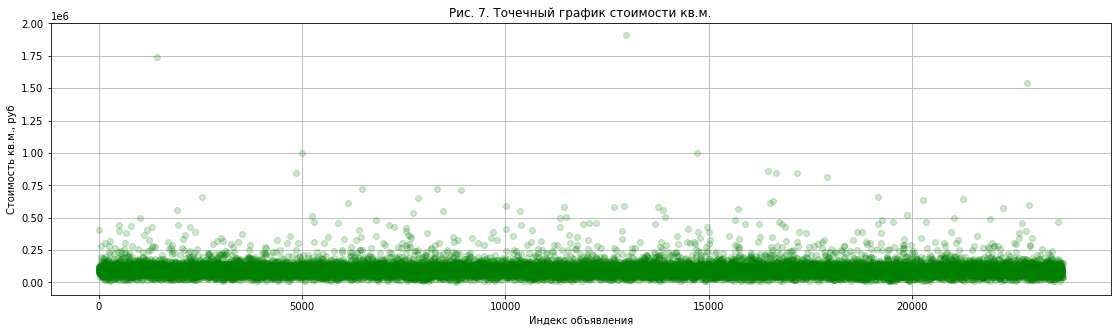

In [62]:
df['square_meter_price'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5))
plt.title('Рис. 7. Точечный график стоимости кв.м.');
plt.xlabel('Индекс объявления');
plt.ylabel('Стоимость кв.м., руб');

Подавляющее число объявлений соответствует цене за кв.м. недвижимости до 200 тысяч, далее количество объявлений резко снижается. Построим гистограмму распределения цены за кв.м. в пределах от 0 до 250 тысяч на 25 корзин (по 10 тысяч рублей в корзине):

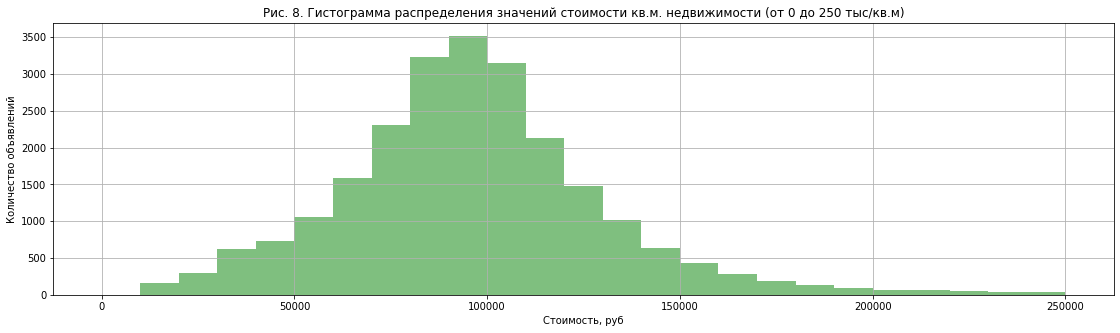

In [63]:
df['square_meter_price'].hist(range=(0,250000), bins=25, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 8. Гистограмма распределения значений стоимости кв.м. недвижимости (от 0 до 250 тыс/кв.м)');
plt.xlabel('Стоимость, руб');
plt.ylabel('Количество объявлений');

Согласно полученной гистограмме, наиболее встречающаяся цена за кв.м недвижимости находится в пределах от 80 до 110 тысяч рублей (более 9500 объявлений в общей сложности на интервал 80-110 тысяч рублей).

**Выводы:**

1. Наиболее часто встречается цена на недвижимости от 3.5 до 4 млн. Наиболее часто встречаемая стоимость квадратного метра: от 80 до 110 тыс.руб./кв.м;
2. Минимальная цена на квартиру в датафрейме -12190 руб (вероятно, результат пользовательской опечатки), максимальная - 763 млн. руб., средняя 6.5 млн. руб, медианная - 4.6 млн. руб. Большая часть объявлений соответствует цене до 50 млн. руб.
3. Медианное значение цены за квадратный метр составляет 95 тысяч рублей, среднее - 99.5 тысяч рублей, минимальное - 112 рублей (вероятно, результат опечатки при заполнении стоимости), максимальное - 1.9 млн рублей  Большая часть объявлений соответствует цене за кв.м до  200 тысяч рублей.
4. Гистограммы по цене и цене за кв.м. имеют вид нормального распределения с "хвостом", направленным в сторону увеличения стоимости.

## 3.3 Анализ числа комнат в продаваемой недвижимости <a id='3.3'></a>

В текущем разделе полчим статистическую информацию о количестве комнат в продаваемой недвижимости и построим гистограмму распределения числа комнат. Для получения статистической информации воспользуемся методом describe():

In [64]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Согласно статистической информации о столбце 'rooms', минимальное количество комнат - 0, максимальное - 19. Возможно, нулевое количество комнат характерно для квартир-студий, апартаментов и квартир со свободной планировкой. Проверим:

In [65]:
#посчитаем число квартир с нулевым количеством комнат
print('Квартир с нулевым количеством комнат:', df[df['rooms']==0]['total_images'].count())

print('\nРаспределение квартир с нулевым количеством комнат по студиям, апартаментам и кв. со свободной планировкой:')
df.loc[df['rooms']==0, ['studio', 'is_apartment', 'open_plan']].value_counts().reset_index()

Квартир с нулевым количеством комнат: 194

Распределение квартир с нулевым количеством комнат по студиям, апартаментам и кв. со свободной планировкой:


studio  is_apartment  open_plan    0
0    True         False      False  135
1   False         False       True   59

Всего в датафрейме 194 объекта недвижимости с нулевым количеством комнат, из которых 135 приходится на квартиры-студии, 59 - на квартиры со свободной планировкой.

Построим гистограмму на 20 корзин:

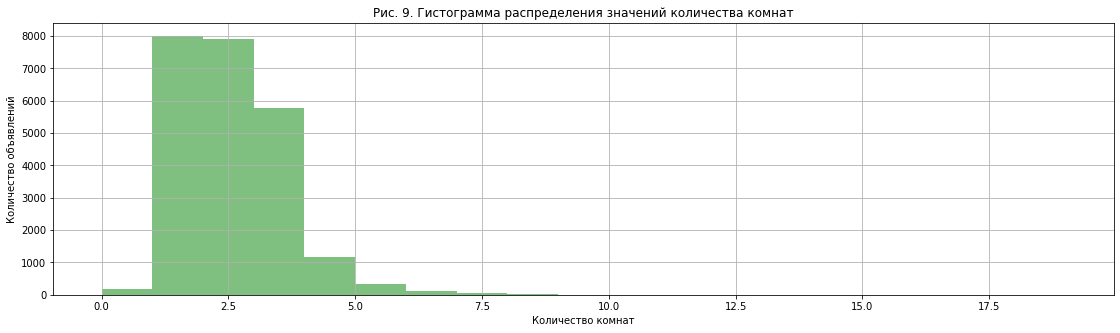

In [66]:
df['rooms'].hist(range=(0,19), bins=19, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 9. Гистограмма распределения значений количества комнат');
plt.xlabel('Количество комнат');
plt.ylabel('Количество объявлений');

Наиболее часто встречаются однокомнатные квартиры (около 8 тыс. объявлений, более 8000 - если отнести к однокомнатным объявления с нулевым количеством комнат), затем чуть реже встречатся двухкомнатные, затем, примерно на 30% реже - трехкомнатные. Количество квартир с 4-мя комнатами встречается чуть более 1000 раз, квартиры с количеством комнат 5 - около 300 раз, 6 комнат и более встречаются редко.

In [67]:
#посчитаем долю квартир с количеством комнат 6 и более
print(f"Доля недвижимости с количеством комнат более 5: {df[df['rooms']>5]['total_images'].count()/df.shape[0]:.2%}")

Доля недвижимости с количеством комнат более 5: 0.82%


**Выводы:**
1. Минимальное количество комнат для анализируемого датафрейма: 0, что соответствует студиям и квартирам со свободной планировкой.
2. Максимальное количество комнат: 19.
3. Среднее значение количества комнат: 2.1, медианное - 2.0.
4. Чаще всего встречаются квартиры с 1 и 2 комнатами (8000 и чуть менее 8000 объявлений соответственно.
5. Квартиры с 6-ю и более комнатами встречаются в 0.82% всего датафрейма.

## 3.4 Анализ высоты потолков продаваемой недвижимости <a id='3.4'></a>

Получим статистическую информацию о высоте потолков из датафрейма, затем построим гистограмму распределения.

In [68]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Согласно [источнику](https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=%D0%9A%D0%B0%D0%BA%D0%BE%D0%B2%D0%B0%20%D1%81%D0%B8%D1%82%D1%83%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B2%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%3F,%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%BC%D0%BE%D0%B6%D0%B5%D1%82%20%D0%BF%D1%80%D0%B5%D0%B2%D1%8B%D1%88%D0%B0%D1%82%D1%8C%203%20%D0%BC%D0%B5%D1%82%D1%80%D0%B0.), стандартная высота потолков в России сейчас составляет от 2.4 до 2.7 м. Для элитного жилья и квартир, относящихся к сталинскому ампиру, высота потолков может превышать 3 м. 

Среднее и медианное значение высоты потолков в датафрейме близки и соответствуют ожидаемому, однако есть выбросы - высота потолка 1 м и 100 м. Построим точечный график.

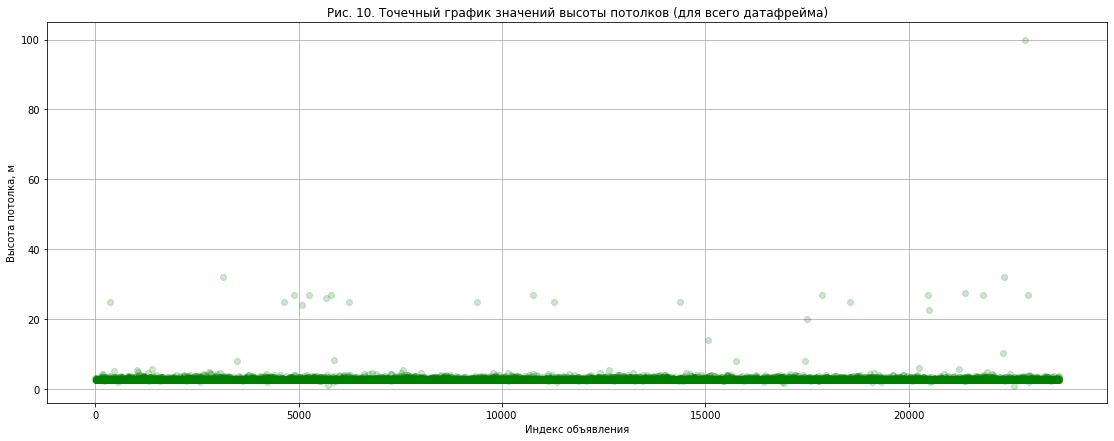

In [69]:
df['ceiling_height'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 7))
plt.title('Рис. 10. Точечный график значений высоты потолков (для всего датафрейма)');
plt.xlabel('Индекс объявления');
plt.ylabel('Высота потолка, м');

На точечном графике видно, что практически все значения высоты потолков лежат в пределах от 2 до 5 м. При этом наблюдаются единичные значения ниже 2 м и выше 5 м (возможно, опечатки при заполнении пользователем). Максимальная высота потолка - 100 м, за ней идет высота потолка 30-35 м. построим гистограмму на 20 корзин в диапазоне от 0 до 10 м.

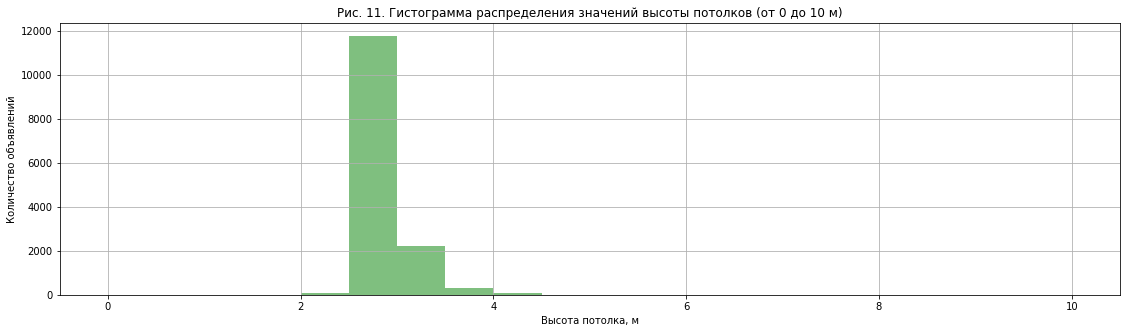

In [70]:
df['ceiling_height'].hist(range=(0,10), bins=20, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 11. Гистограмма распределения значений высоты потолков (от 0 до 10 м)');
plt.xlabel('Высота потолка, м');
plt.ylabel('Количество объявлений');

Большая часть недвижимости (чуть менее 12000 объявлений) имеет высоту потолков от 2.5 до 3 м, высота от 3 до 3.5 м встречается в 6 раз реже (чуть более 2000 объявлений), высота от 4 до 4.5 м встречается около 200 раз. Высота потолков более 4 и менее 2.5 м встречается менее 200 раз. Посчитаем долю объявлений с высотой потолков менее 2 м и более 4 м.

In [71]:
print(f"Высота потолка менее 2.5 м: {df[df['ceiling_height']<2.5]['total_images'].count()/df.shape[0]:.2%}")
print(f"Высота потолка более 4 м: {df[df['ceiling_height']>4]['total_images'].count()/df.shape[0]:.2%}")

Высота потолка менее 2.5 м: 0.31%
Высота потолка более 4 м: 0.32%


**Выводы:**
1. Среднее и медианное значения высоты потолка составляют 2.8 м и 2.7 м соответственно (соответствует ожидаемому). Минимальное значение - 1 м (вероятно, пользовательская опечатка), максимальное - 100 м (вероятно, пользовательская опечатка).
2. Из 14481 значения высоты потолков чуть менее 12000 значений находятся в пределах от 2.5 до 3 м. Около 2200 значений находится в интервале от 3 до 3.5 м, около 200 - от 3.5 до 4. Высота потолка менее 2.5 м и более 4 м встречается в общей сложности в 0.63% значений.

## 3.5 Изучение времени продажи квартиры

В текущем требуется провести исследование времени продажи квартиры и выделить периоды аномально долгого и аномально быстрого времени продажи. Получим статистическую информацию, построим гистограммы распределения как для всего датафрейма, так и для результата группировки по количеству комнат. Выделим стандартные временные интервалы продажи квартиры.

In [72]:
#получим статистическую информацию методом describe()
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из статистической информации о времени продажи недвижимости можно сказать следующее:
- средняя длительность продажи квартиры составляет полгода, медианная - 3 месяца. Среднее значение превышает медианное в два раза в связи с наличием в выборке резко отличающихся значений;
- самая быстрая продажа произошла через 1 день после публикации объяления, самая долгая заняла более 4-х лет;
- 75% объектов недвижимости проданы за время менее 8 месяцев.
- среднеквадратическое отклонение для выборки составляет 219.7 дней, что говорит о большой вариабельности значений в наборе данных.

Построим диаграмму размаха для 'days_exposition':

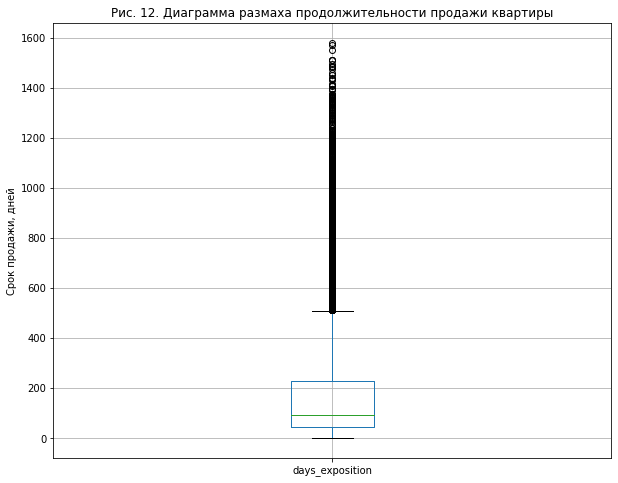

In [73]:
df.boxplot(column='days_exposition',  figsize=(10, 8))
plt.title('Рис. 12. Диаграмма размаха продолжительности продажи квартиры');
plt.ylabel('Срок продажи, дней');

Диаграмма размаха показывает, что нормальное время продажи находится в пределах от 0 до ≈500 дней. Уточним верхний предел нормальных значений, исходя из предположения, что он равен сумме третьего квартиля и межквартильного интервала. Нижний предел считать не будем, так как он ограничен нулем.

In [74]:
#рассчитаем верхний предел нормального времени продажи, как: Q3+1.5*IQR = Q3+1.5*(Q3-Q1)
print('Верхний предел нормального времени продажи, дней:')
2.5*df['days_exposition'].quantile(0.75)-1.5*df['days_exposition'].quantile(0.25)

Верхний предел нормального времени продажи, дней:


510.0

Построим гистограмму распределения продолжительности продажи. Так как объем данных достаточно велик, разобъем гистограмму на интервалы по 7 дней.

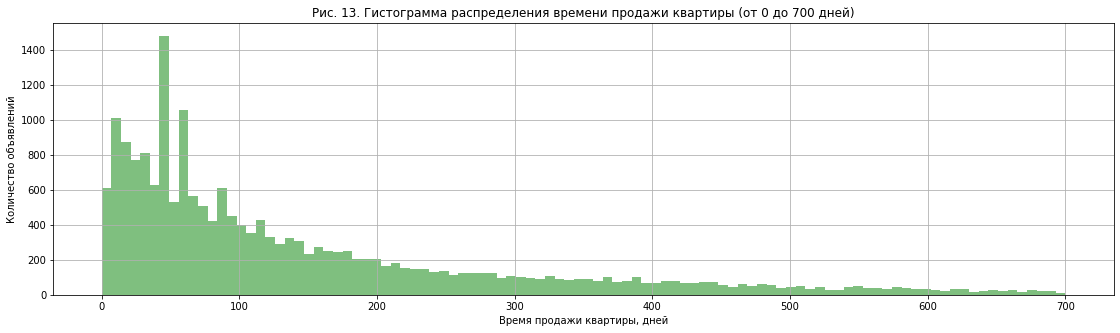

In [75]:
#выберем диапазон постоения диаграммы так, чтобы были учтены все нормальные (согласно расчету с межквартильным размахом)
#значения и немного с запасом
df['days_exposition'].hist(range=(0,700), bins=100, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 13. Гистограмма распределения времени продажи квартиры (от 0 до 700 дней)');
plt.xlabel('Время продажи квартиры, дней');
plt.ylabel('Количество объявлений');

Вид гистограммы похож на распределение Пуассона, описывающее число событий (продаж) в единицу времени (неделю).
На гистограмме есть резко выбивающиеся значения: так, более 1400 объектов недвижимости было продано на 7-й неделе (при ожидаемых ≈600), более 1000 объектов - на 9 неделе (при ожидаемых <600). Рассмотрим гистограмму в укрупненном масштабе:

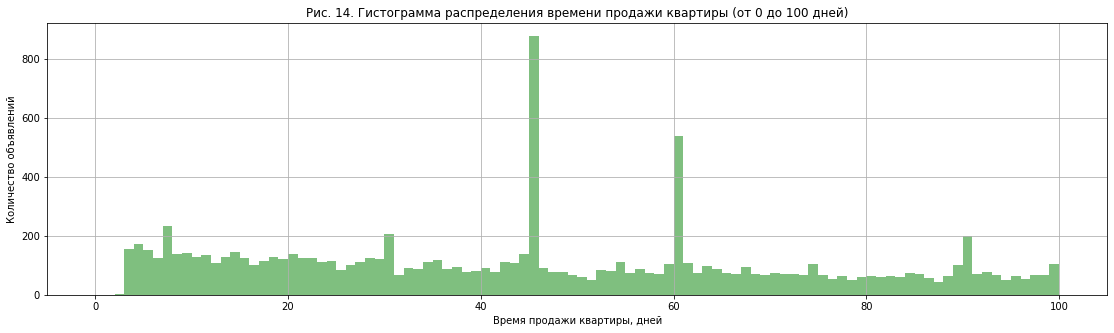

In [76]:
df['days_exposition'].hist(range=(0,100), bins=100, color='green', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 14. Гистограмма распределения времени продажи квартиры (от 0 до 100 дней)');
plt.xlabel('Время продажи квартиры, дней');
plt.ylabel('Количество объявлений');

На гистограмме видно аномальные скачки на 46-й и 61-й дни после размещения объявления. В эти дни продажи подскочили в ≈8 и ≈5 раз соответственно. Наблюдаются и другие локальные максимумы: 8, 31, 91 день, однако продажи в эти дни превышают близлежащие значения не более. чем в 2 раза. Трудно сказать, что привело к таким показателям. Может быть, произошел какой-то сбой на площадке размещения объявлений.

Рассмотрим гистограмму времени продажи квартир в зависимости от количества комнат. Квартиры с нулевым количеством комнат отнесем к однокомнатным.

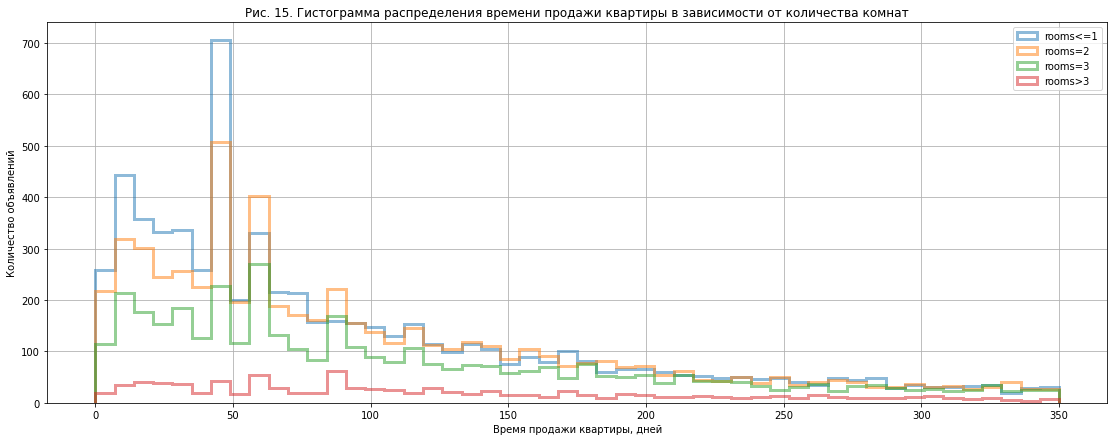

In [77]:
#строим гистограмму для квартир с 0 комнатами (студии, свободная планировка) и с 1 комнатой
ax=df[df['rooms']<=1]['days_exposition'].plot(
    kind='hist', 
    histtype='step', 
    range=(0,350), 
    bins=50, 
    linewidth=3, 
    alpha=0.5,
    label='rooms<=1', 
    legend=True, 
    figsize=(19,7)
);

#строим гистограмму для квартир с 2 комнатами
df[df['rooms']==2]['days_exposition'].plot(
    kind='hist', 
    histtype='step', 
    range=(0,350), 
    bins=50, 
    linewidth=3, 
    alpha=0.5, 
    label='rooms=2', 
    ax=ax, 
    grid=True, 
    legend=True);

#строим гистограмму для квартир с 3 комнатами
df[df['rooms']==3]['days_exposition'].plot(
    kind='hist', 
    histtype='step', 
    range=(0,350), 
    bins=50, 
    linewidth=3, 
    alpha=0.5, 
    label='rooms=3', 
    ax=ax, 
    grid=True, 
    legend=True);

#строим гистограмму для квартир с 4 и более комнатами
df[df['rooms']>3]['days_exposition'].plot(
    kind='hist', 
    histtype='step', 
    range=(0,350), 
    bins=50, 
    linewidth=3, 
    alpha=0.5, 
    label='rooms>3', 
    ax=ax, 
    grid=True, 
    legend=True);

plt.title('Рис. 15. Гистограмма распределения времени продажи квартиры в зависимости от количества комнат');
plt.xlabel('Время продажи квартиры, дней');
plt.ylabel('Количество объявлений');

Как и на общей диаграмме, для одно-, двух- и трехкомнатных квартир наблюдается резкое увеличение продаж на 7 и 9 неделях, а также локальные максимумы на 13 и 17 неделях, таким образом полученное распределение времени продажи характерно для всех квартир с количеством комнат 3 и меньше. Для недвижимости с количеством комнат более 3 наблюдается другая гистограмма, что связано с небольшой долей таких объектов в выборке и, возможно, другим спросом на многокомнатные квартиры. Рассмотрим также статистическую информацию о времени продажи недвижимости, сгруппированной по количеству комнат. Для удобства сравнения построим "ящик с усами" по значениям `days_exposiion` для каждого варианта количества комнат.

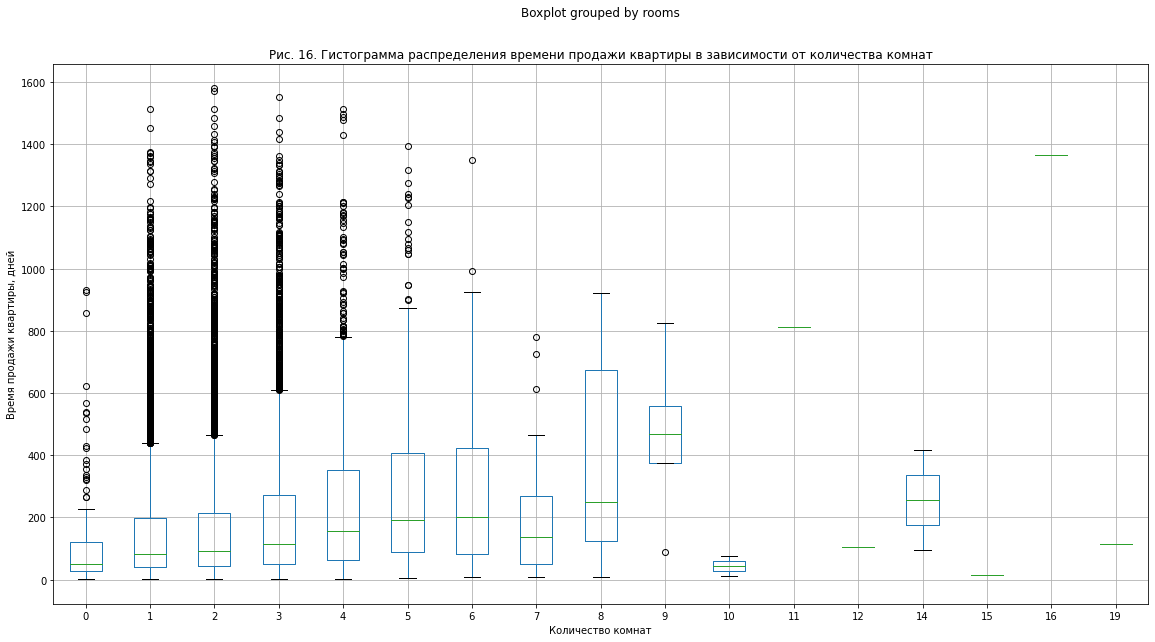

In [78]:
df.boxplot(column='days_exposition', by='rooms', figsize=(19, 10))
plt.title('Рис. 16. Гистограмма распределения времени продажи квартиры в зависимости от количества комнат');
plt.xlabel('Количество комнат');
plt.ylabel('Время продажи квартиры, дней');

Диаграмма с набором "ящиков с усами" по значениям `days_exposition` для каждого варианта количества комнат показывает следующее:

- с увеличением количества комнат время продажи недвижимости растет. Тенденция нелинейная и прослеживается от 0 комнат до 6; 
- начиная с 7 комнат и более зависимости нет, и недвижимость продается хаотично: от первого месяца (15 комнат) до 3.7 лет (16 комнат), что может быть объяснено небольшим объемом выборки объявлений с таким количеством комнат.  В общей сложности квартиры с количеством комнат от 7 и до 19 продаются за год (7, 8, 10, 12, 14, 15, 19) комнат;
- для объявлений с количеством комнат от 0 до 8 расстояние между первым и вторым квартилем в 2-4 раза меньше, чем между вторым и третьим; расстояние между нижним усом и вторым квартилем в 3-5 раз меньше, чем между вторым квартилем и концом верхнего уса. Это говорит о том, что 50% недвижимости продаются в 3-5 раз быстрее, чем другие 50% недвижимости с аналогичным количеством комнат.

Получим численные значения медианного времени продажи для каждого объекта с количеством комнат <7  и в общей сложности для всех квартир с количеством комнат более 7 и более.

In [79]:
#соберем сводную таблицу медианных значений количества дней продажи для квартир с количеством комнат от 0 до 6 включительно
display(df.where(df['rooms']<7).groupby(by='rooms')['days_exposition'].median().reset_index())

#рассчитаем медианное значение продолжительности продажи для объявлений с количеством комнат 7 и более
print('Медианное время продажи квартир с 7-ю и более комнатами:', df[df['rooms']>6]['days_exposition'].median(), 'дней.')

rooms  days_exposition
0    0.0             49.5
1    1.0             81.0
2    2.0             91.0
3    3.0            114.0
4    4.0            155.0
5    5.0            191.0
6    6.0            201.5

Медианное время продажи квартир с 7-ю и более комнатами: 146.0 дней.


**Выводы:**

- Общий вид гистограмм по времени продажи недвижимости схож с распределением Пуассона;
- На гистограммах не выделяется области с аномально быстрыми продажами. В целом, покупка недвижимости - довольно масштабный проект в жизни человека и подготовка нужных документов, процесс проверки квартиры, одобрение ипотеки - процесс длительный. В связи с этим можно принять за нестандартно быструю продажу снятие объявления с публикации в течение 1 недели после его размещения (на гистограммах выделяется 1-я неделя после публикации, на 2 неделе количество продаж резко растет);
- С увеличением числа комнат медианное время продажи растет с 1.5 до 6.5 месяцев. Это справедливо для количества комнат от 0 до 6, далее распределение времени продажи хаотично вследствие маленькой выборки для недвижимости с количеством комнат 7 и более.
- Для всех построенных "ящиков с усами" выделяется следующая закономерность: первые 50% недвижимости (до второго квартиля) продаются в 3-5 раз быстрее, чем оставшиеся 50% недвижимости. В связи с этим за порог аномально долгой продажи можно принять второй квартиль (все значения от 7 дней и до второго квартиля примем за стандартное время продажи):

     - для студий и квартир со свободной планировкой с 0 комнат - 50 дней;
     - для одно- и двухкомнатных квартир 80-90 дней;
     - для трехкомнатных квартир 114 дней;
     - для четырехомнатных квартир 155 дней;
     - для пяти- и шестикомнатных квартир 191 и 202 дня соответственно
     - для всего датафрейма 95 дней.
  

## 3.6 Удаление редких и выбивающихся значений

На данном этапе требуется удалить редкие и выбивающиеся значения, а также описать обнаруженные особенности.
Выполним поиск редких и выбивающихся значений для столбцов, которые необходимы для исследования факторов, влияющих на стоимость квартиры:

- площадь квартиры;
- количество комнат;
- удаленность от центра;
- высота потолков;
- стоимость

### 3.6.1 Удаление редких и выбивающихся значений площади квартиры

Вместо столбца `total_area`, как в [пункте 3.1](#'3.1'), проанализируем значения столбцов `living_area` и `kitchen_area`, так как даже при аномальных значениях в этих столбцах, значение общей площади может не вызывать подозрений. Посмотрим статистику о столбцах `living_area` и `kitchen_area` методом describe() и построим для них точечные графики (для визуализации редких и выбивающихся значений).

In [80]:
#получение статистики о 'living_area'
display(df['living_area'].describe())

#получение статистики о 'kitchen_area'
display(df['kitchen_area'].describe())

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

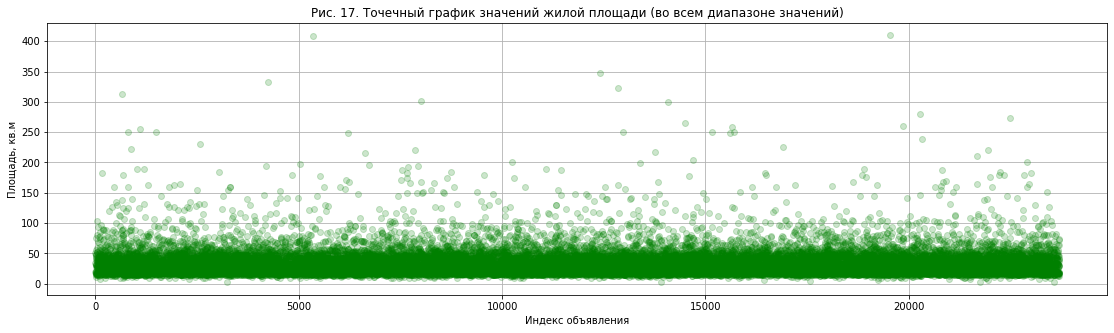

In [81]:
df['living_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5), title='living_area')
plt.title('Рис. 17. Точечный график значений жилой площади (во всем диапазоне значений)');
plt.xlabel('Индекс объявления');
plt.ylabel('Площадь, кв.м');

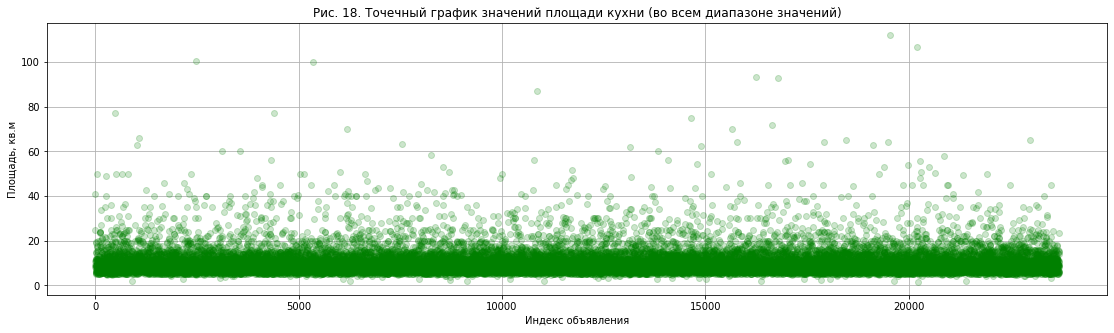

In [82]:
df['kitchen_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5), title='kitchen_area')
plt.title('Рис. 18. Точечный график значений площади кухни (во всем диапазоне значений)');
plt.xlabel('Индекс объявления');
plt.ylabel('Площадь, кв.м');

Рассмотрим детальнее область со значениями площади от 0 до 20 м.

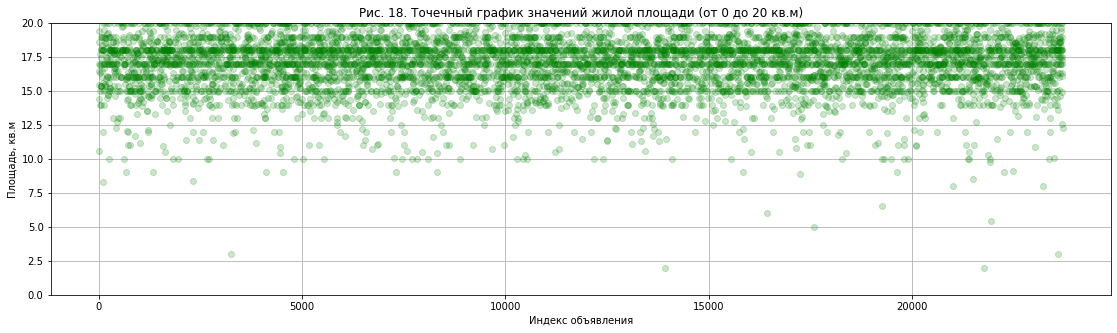

In [83]:
#поставим ограничение на значение оси Y
plt.ylim(0,20)
df['living_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5), title='living_area')
plt.title('Рис. 18. Точечный график значений жилой площади (от 0 до 20 кв.м)');
plt.xlabel('Индекс объявления');
plt.ylabel('Площадь, кв.м');

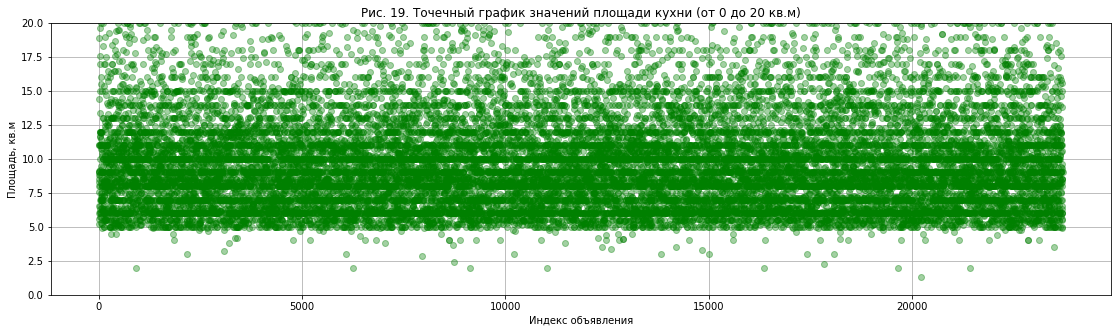

In [84]:
#поставим ограничение на значение оси Y
plt.ylim(0,20)
df['kitchen_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5), title='kitchen_area')
df['kitchen_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5), title='kitchen_area')
plt.title('Рис. 19. Точечный график значений площади кухни (от 0 до 20 кв.м)');
plt.xlabel('Индекс объявления');
plt.ylabel('Площадь, кв.м');

По графикам и статистической информации о жилой площади и площади кухни можно сделать следующие выводы:

**living_area**
- минимальное значение: 2 кв.м.;
- максимальное значение: 409.7 кв.м.;
- большая часть значений лежит в пределах от 12.5 до 100 кв.м. (назовем этот промежуток типовым интервалом)

**kitchen_area**
- минимальное значение: 0 кв.м.;
- максимальное значение: 112 кв.м.;
- большая часть значений находится в пределах от 5 до 30 кв.м. (назовем этот промежуток типовым интервалом)

Можно отметить, что на графиках, с увеличенным масштабом по оси Y, прослеживаются четкие горизонтальные полосы, вероятно, соотвтествующие стандартным значениям площади в планах застройки.

Удалим строки датафрейма, для которых жилая площадь и площадь кухни находятся за пределами типовых интервалов, однако строки с нулевой площадью кухни оставим, так как это не аномальное значение, а сигнал отсутствия кухни. Кроме того, значение жилой площади в таких объявлениях может находиться в типовом интервале.

In [85]:
print('Количество строк датафрейма до фильтрации по площади:', df.shape[0])

Количество строк датафрейма до фильтрации по площади: 23565


In [86]:
#отфильтруем датафрейм по площади кухни
df=df[((df['kitchen_area']>=5)&(df['kitchen_area']<=30))|(df['kitchen_area']==0)|(df['kitchen_area'].isna())]

#отфильтруем датафрейм по площади кухни
df=df[((df['living_area']>=12.5)&(df['living_area']<=100))|(df['living_area'].isna())]

print('Количество строк датафрейма после фильтрации по площади:', df.shape[0])

Количество строк датафрейма после фильтрации по площади: 22682


In [87]:
f"Удаленных строк: {1-22682/23565:.1%}"

'Удаленных строк: 3.7%'

In [88]:
#получение статистики о 'living_area'
display(df['living_area'].describe())

#получение статистики о 'kitchen_area'
display(df['kitchen_area'].describe())

count    20837.000000
mean        32.634160
std         15.576146
min         12.500000
25%         18.600000
50%         30.000000
75%         41.920000
max        100.000000
Name: living_area, dtype: float64

count    20500.000000
mean         9.965528
std          4.003867
min          5.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         30.000000
Name: kitchen_area, dtype: float64

После фильтрации датафрейма по жилой площади и площади кухни удалено 3.7% объявлений. Минимальные и максимальные значения соответствуют фильтрам. Для проверки, что значения площади кухни от 0 до 5 кв.м. удалены из датафрейма, снова построим точечный график.

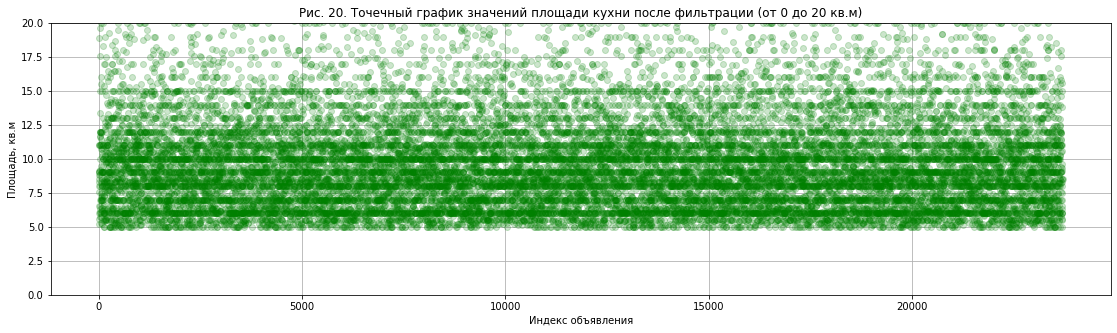

In [89]:
#поставим ограничение на значение оси Y
plt.ylim(0,20)
df['kitchen_area'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 5), title='kitchen_area')
plt.title('Рис. 20. Точечный график значений площади кухни после фильтрации (от 0 до 20 кв.м)');
plt.xlabel('Индекс объявления');
plt.ylabel('Площадь, кв.м');

Фильтрация по площади выполнена успешно.

### 3.6.2 Удаление редких и выбивающихся значений количества комнат

Согласно исследованию параметра количества квартир [пункте 3.3](#3.3), доля квартир с количеством комнат более 5 составляет 0.82%. Рассчитаем долю квартир, с количеством комнат более 3 и более 4.

In [90]:
print(f"Доля недвижимости с количеством комнат более 3: {df[df['rooms']>3]['total_images'].count()/df.shape[0]:.2%}")
print(f"Доля недвижимости с количеством комнат более 4: {df[df['rooms']>4]['total_images'].count()/df.shape[0]:.2%}")

Доля недвижимости с количеством комнат более 3: 5.73%
Доля недвижимости с количеством комнат более 4: 1.09%


Уберем из датафрейма строки с количеством комнат более 5. Квартиры с нулевым количеством комнат оставим без изменения, так как эти строки соответствуют студиям и квартирам со свободной планировкой, что в дальнейшем модет пригодиться. 

In [91]:
df=df[df['rooms']<=5]

print(f"Количество квартир с количеством комнат более 5 (после фильтрации датафрейма): {df[df['rooms']>5]['total_images'].count()}")

Количество квартир с количеством комнат более 5 (после фильтрации датафрейма): 0


В датафрейме остались только объявления, в которых количество комнат не более 5.

### 3.6.3  Удаление редких и выбивающихся значений удаленности от центра

Построим точечный график расстояний до центра ближайшего города (столбец `city_centers_nearest`).

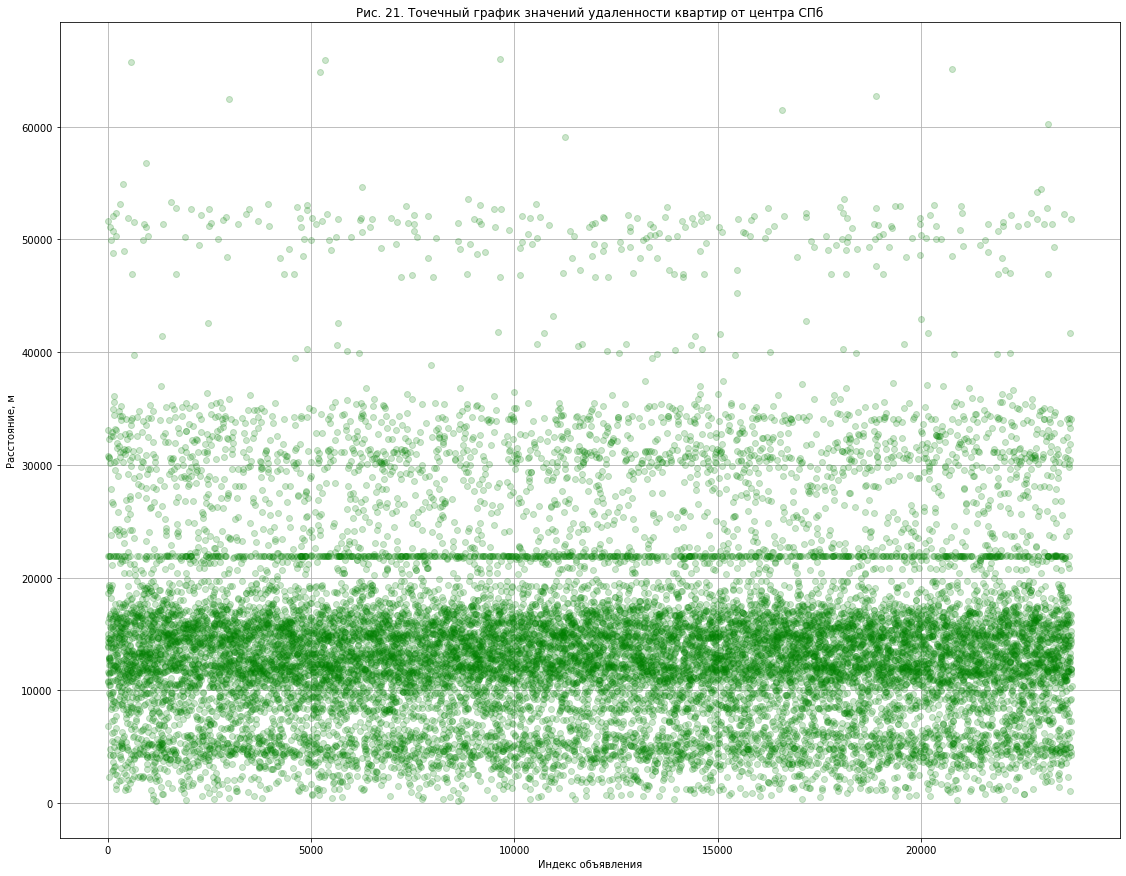

In [92]:
df['city_centers_nearest'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 15), title='city_centers_nearest')
plt.title('Рис. 21. Точечный график значений удаленности квартир от центра СПб');
plt.xlabel('Индекс объявления');
plt.ylabel('Расстояние, м');

На точечном графике наблюдается 5 "поясов" удаленности от центра:
- от 3 до 6 км;
- от 10 до 19 км;
- от 30 до 35 км;
- от 45 до 53 км;
- 22 км. Здесь выделяется четкая полоса одинаковой удаленности от центра для целого ряда объявлений. Вероятно, эта полоса соответствует Мурино, так как 588 объявлений для этого н.п. было заполнено искуственно. Проверим:

In [93]:
df[df['new_locality_name']=='Мурино']['city_centers_nearest'].mean()

21888.0

Действительно, среднее расстояние от Мурино до центра СПб составляет почти 22 км.

В зоне удаленности от 35 до 45 км наблюдается полоса сильно разреженных значений, дальше 53 км наблюдается всего 11 значений. Удалим оъявления для этих диапазонов.

In [94]:
#df=df[(df['city_centers_nearest']<=55000)|(df['city_centers_nearest'].isna())]

df=df[(~((df['city_centers_nearest']<=45000)&(df['city_centers_nearest']>=35000))&(df['city_centers_nearest']<=55000))|(df['city_centers_nearest'].isna())]


#проверим результат
print('Значений больше 55 км:', df[df['city_centers_nearest']>55000]['total_images'].count())
print('Значений от 35 до 45 км:', df[(df['city_centers_nearest']<=45000)&(df['city_centers_nearest']>=35000)]['total_images'].count())

print('Строк в датафрейме после фильтрации по удаленности от центра города:', df.shape[0])

Значений больше 55 км: 0
Значений от 35 до 45 км: 0
Строк в датафрейме после фильтрации по удаленности от центра города: 22485


### 3.6.4 Удаление редких и выбивающихся значений высоты потолков

В [пункте 3.4](#3.4) было выявлено, что максимальная высота потолков для датафрейма составляет 100 м, минимальная - 1 м. Построим снова точечный график распределения значений высоты потолков и найдем аномальные значения.

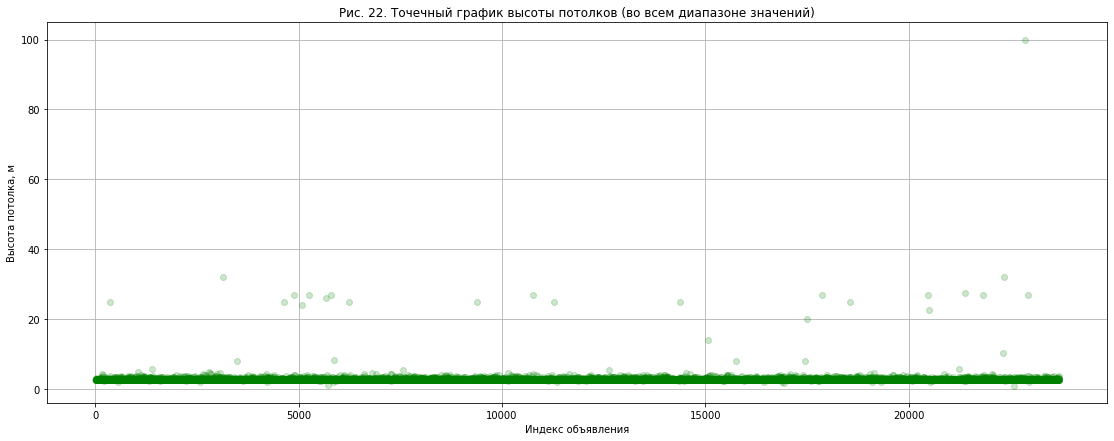

In [95]:
df['ceiling_height'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 7))
plt.title('Рис. 22. Точечный график высоты потолков (во всем диапазоне значений)');
plt.xlabel('Индекс объявления');
plt.ylabel('Высота потолка, м');

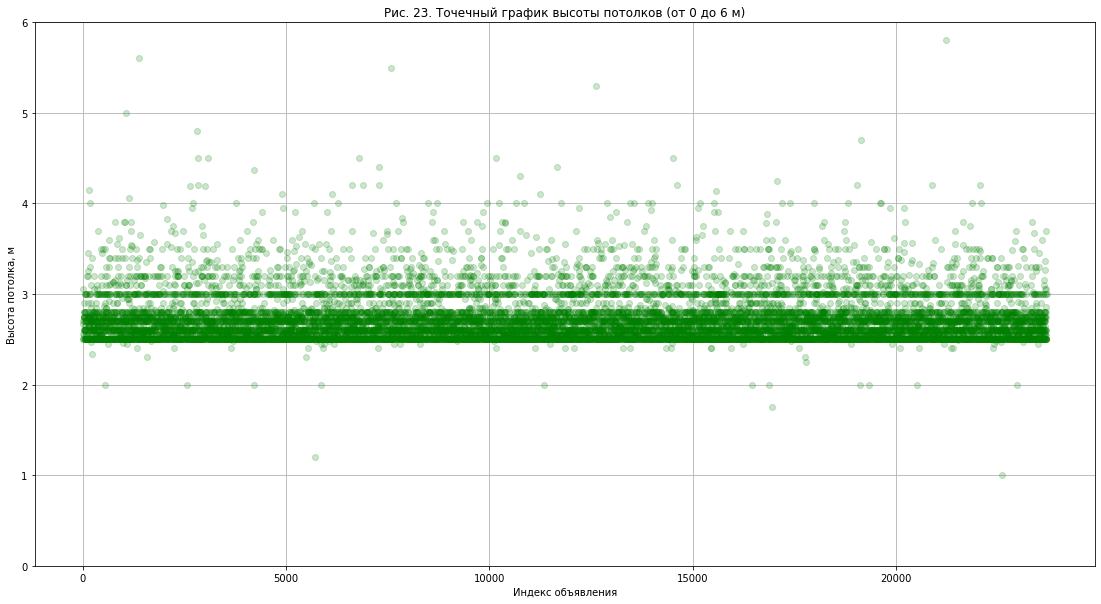

In [96]:
#ограничим максимальную высоту на точечном графике до 6 м
plt.ylim(0, 6)
df['ceiling_height'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 10))
plt.title('Рис. 23. Точечный график высоты потолков (от 0 до 6 м)');
plt.xlabel('Индекс объявления');
plt.ylabel('Высота потолка, м');

Согласно вышеприведенным графикам, высота потолков 2 м и менее, 5 м и более встречается достаточно редко, что соответствует действительности: высота потолков в России начинается от 2.4 м и редко превышает 3 м, исключения - дома старой постройки. В связи с этим значения 2 м и менее - аномальные, значения 5 м и более - возможны, но достаточно редкие. Посчитаем долю аномальных и редких значений и уберем их из датафрейма.

In [97]:
print(f"Процент аномальных и редких значений высоты потолка: {df[(df['ceiling_height']<=2)|(df['ceiling_height']>=5)]['total_images'].count()/df.shape[0]:.2%}")

Процент аномальных и редких значений высоты потолка: 0.21%


In [98]:
df=df[((df['ceiling_height']>2)&(df['ceiling_height']<5))|(df['ceiling_height'].isna())]
print('Строк датафрейма после фильтрации по высоте потолка:', df.shape[0])
print('Количество редких и аномальных значений высоты потолка после фильтрации:', df[(df['ceiling_height']<=2)|(df['ceiling_height']>=5)]['total_images'].count())

Строк датафрейма после фильтрации по высоте потолка: 22437
Количество редких и аномальных значений высоты потолка после фильтрации: 0


### 3.6.5 Удаление редких и выбивающихся значений стоимости квартиры и цены за квадратный метр

Построим точечный график для столбца `last_price`, чтобы проверить, какие значения остались после предыдущих этапов фильтрации.


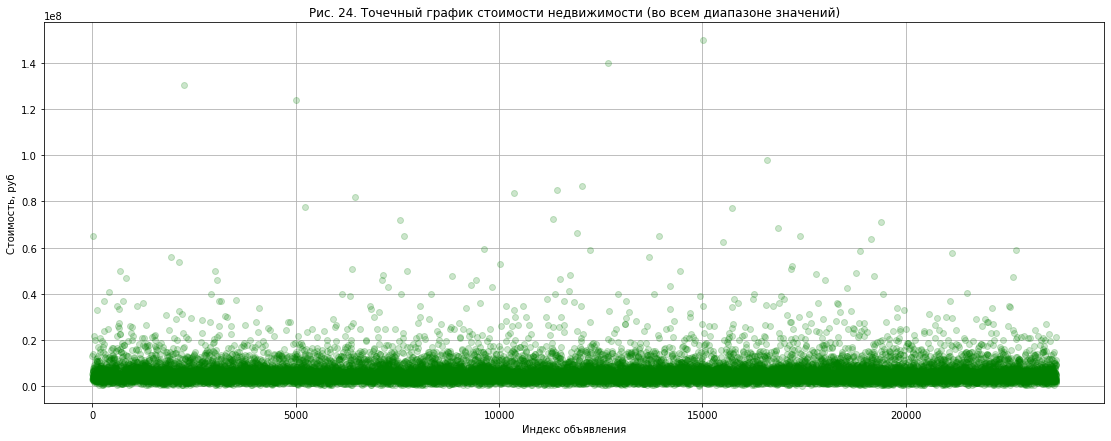

In [99]:
#построим график для всего диапазона значений last_price
df['last_price'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 7))
plt.title('Рис. 24. Точечный график стоимости недвижимости (во всем диапазоне значений)');
plt.xlabel('Индекс объявления');
plt.ylabel('Стоимость, руб');

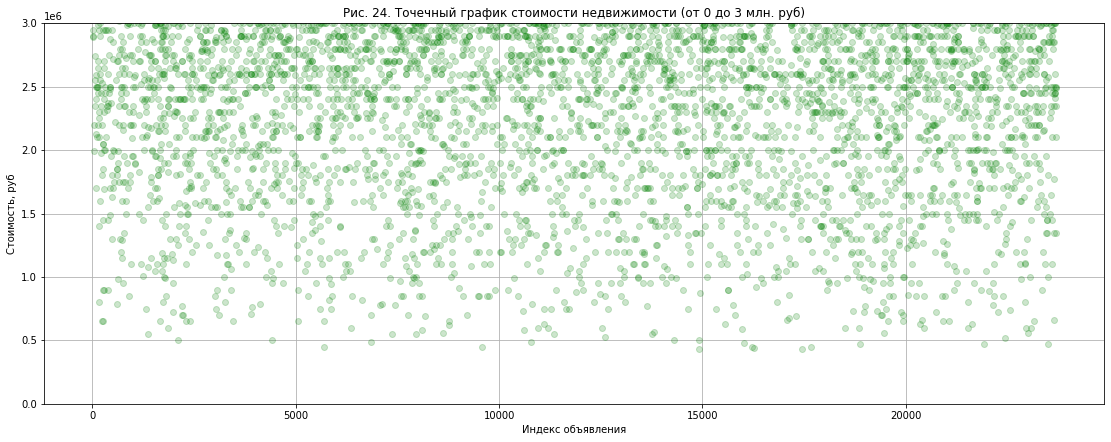

In [100]:
#увеличим масштаб оси Y для визуализации значений от 0 до 3 млн
plt.ylim(0, 3000000)
df['last_price'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 7))
plt.title('Рис. 24. Точечный график стоимости недвижимости (от 0 до 3 млн. руб)');
plt.xlabel('Индекс объявления');
plt.ylabel('Стоимость, руб');

Начиная количество квартир со стоимостью 30 млн и выше резко уменьшается, для значений от 30 до 100 млн не наблюдается такой сильный отрыв точек от основного объема, как для объявлений с ценой свыше 120 млн. Удалим объявления с ценой, выше 120 млн из датафрейма.

Минимальная стоимость квартиры составляет около 0.5 млн. Довольно дешево для квартиры, однако на вышеприведенном точечном графике значения от 0.5 млн до 3 млн возрастают практически с равномерной плотностью, поэтому фильтрацию минимальных значений проводить не будем.

In [101]:
#отфильтруем объявления со стоимостью квартиры более 100 миллионов
df=df[(df['last_price']<=100000000)|(df['last_price'].isna())]
print('Строк датафрейма после фильтрации по стоимости квартиры:', df.shape[0])
print('Количество квартир стоимостью более 100 млн после фильтрации:', df[df['ceiling_height']>100000000]['total_images'].count())

Строк датафрейма после фильтрации по стоимости квартиры: 22433
Количество квартир стоимостью более 100 млн после фильтрации: 0


Построим точечный график для столбца `square_meter_price`.

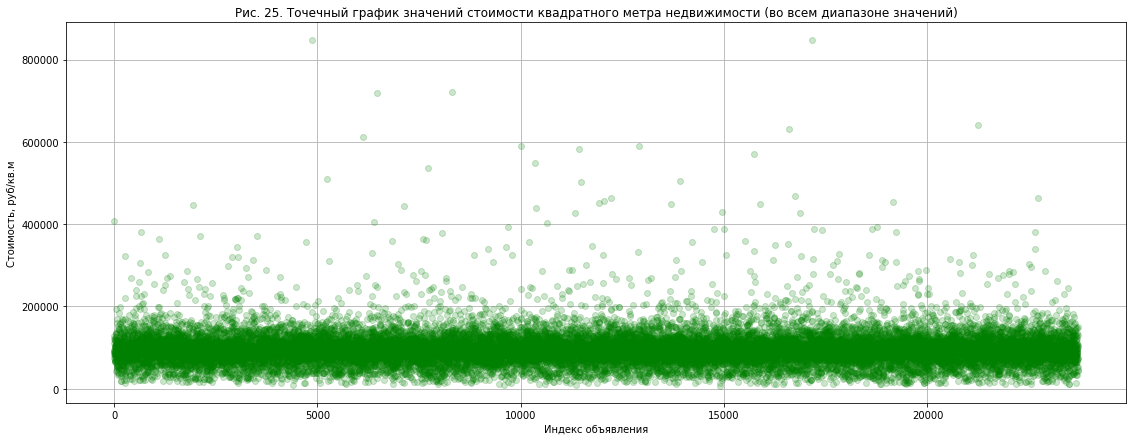

In [102]:
#построим график для всего диапазона значений столбца `square_meter_price`
df['square_meter_price'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 7))
plt.title('Рис. 25. Точечный график значений стоимости квадратного метра недвижимости (во всем диапазоне значений)');
plt.xlabel('Индекс объявления');
plt.ylabel('Стоимость, руб/кв.м');

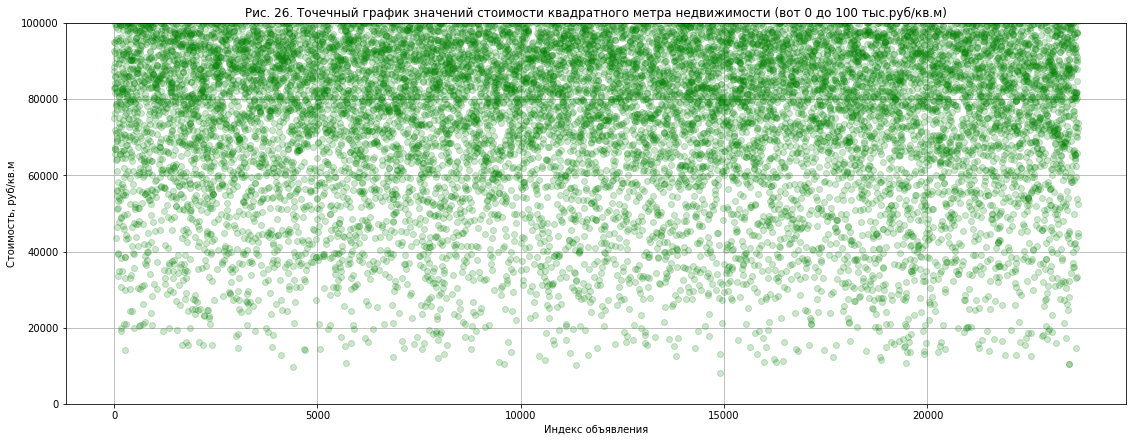

In [103]:
#построим график значений столбца `square_meter_price` в диапазоне от 0 до 100 тысяч
plt.ylim(0, 100000)
df['square_meter_price'].plot(style='o', color='green', grid=True, alpha = 0.2, figsize=(19, 7))
plt.title('Рис. 26. Точечный график значений стоимости квадратного метра недвижимости (вот 0 до 100 тыс.руб/кв.м)');
plt.xlabel('Индекс объявления');
plt.ylabel('Стоимость, руб/кв.м');

Основная часть значений находится в пределах от 80 тысяч до 200 тысяч рублей. В пределах от 20 тысяч до 80 тысяч и от 200 тысяч до 250 тысяч плотность значений заметно снижается, и при цене выше 250 тысяч значения все более разрежаются. Однако эти значения могут соответствовать значениям площади и ценам, оставшимся после предыдущих этапов фильтрации. Выбросов нет.

In [104]:
#посчитаем оставшееся после фильтрации количество строк датафрейма
print('После всех этапов фильтрации осталось ', df.shape[0], 'строк датафрейма.')

После всех этапов фильтрации осталось  22433 строк датафрейма.


**Выводы:**

В результате удаления редких и выбивающихся значений в столбцах `living_area`, `kitchen_area`, `rooms`, `city_centers_nearest`, `ceiling_height`, `last_price` было очищено 1132 строки датафрейма, что составляет 4.8% объема датафрейма до начала фильтрации.

## 3.7 Анализ факторов, влияющих на стоимость недвижимости

Согласно заданию на проект, в текущем разделе требуется выявить факторы, влияющие на стоимость квартиры: изучить, зависит ли цена от:
- площади квартиры;
- числа коммнат;
- удаленности от центра;
- этажа расположения;
- даты размещения.

### 3.7.1 Влияние площади квартиры на ее стоимость

Для оценки связи площади квартиры и ее стоимости построим диаграмму рассеяния для этих параметров.

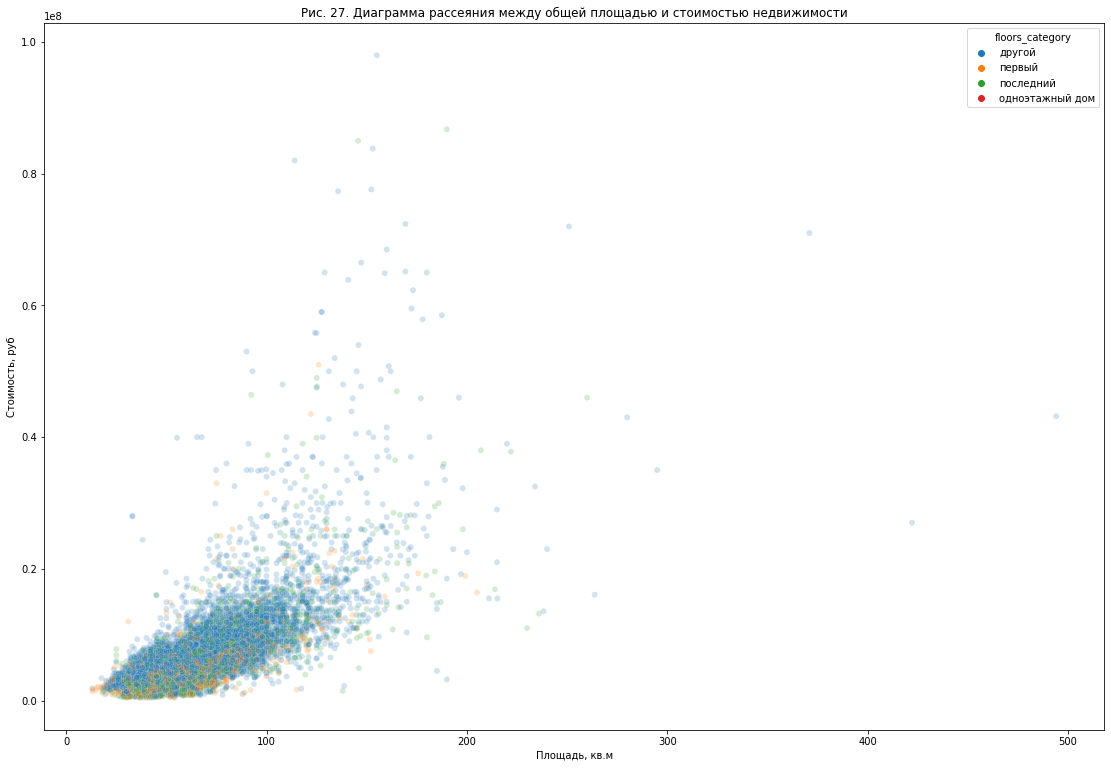

In [105]:
#импортируем библиотеку seaborn
#import seaborn as sns

#построим диаграмму рассеяния для параметров total_area и last_price
plt.figure(figsize=(19, 13))
sns.scatterplot(x='total_area', y='last_price', data=df, hue='floors_category', alpha=0.2)
plt.title('Рис. 27. Диаграмма рассеяния между общей площадью и стоимостью недвижимости');
plt.xlabel('Площадь, кв.м');
plt.ylabel('Стоимость, руб');

Построим график изменения медианного значения стоимости квартиры в зависимости от площади (округлим площадь до целого значения). Совместим его с графиком зависимости стоимости квартиры в зависимости от площади (значения без преобразований).

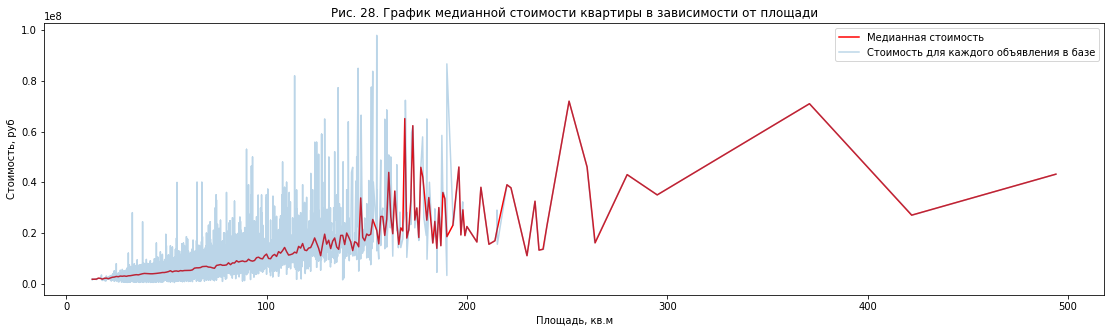

In [106]:
ax=df.pivot_table(index=round(df['total_area'],0), values='last_price', aggfunc='median').plot(alpha=1, color='red', figsize=(19,5))
df.sort_values(by='total_area').plot(x='total_area', y='last_price', ax=ax, alpha=0.3)
plt.title('Рис. 28. График медианной стоимости квартиры в зависимости от площади');
plt.xlabel('Площадь, кв.м');
plt.ylabel('Стоимость, руб');
plt.legend(['Медианная стоимость','Стоимость для каждого объявления в базе'], loc=1);

На ***диаграмме рассеяния*** наблюдается зависимость между площадью и ценой: при увеличении площади увеличивается стоимость квартиры. То же наблюдается и для ***графика*** зависимости стоимости от площади. Начиная с 45 кв.м., увеличивается количество "выбросов" - квартир с ценой в несколько раз выше, чем у основной массы объявлений с той же площадью. Вероятно, здесь начинают влиять другие факторы, такие, например, как класс жилья. Можно заметить, что среди выбивающихся значений на диаграмме рассеяния практически не наблюдается квартир на первом этаже. График медианной стоимости имеет тенденцию расти с увеличением площади и примерно до 70-75 кв.м. довольно устойчив к наличию выбивающихся значений.

Рассчитаем коэффициент корреляции между площадью и стоимостью квартиры.

In [107]:
print(f"Коэффициент корреляции между площадью квартиры и стоимостью: {df['total_area'].corr(df['last_price']):.1}")

Коэффициент корреляции между площадью квартиры и стоимостью: 0.7


Коэффициент корреляции между площадью квартиры и ее стоимостью (без разделения на категории по этажам) составляет 0.7 - связь есть. Коэффициент корреляции положительный, что говорит о том, что при увеличении площади квартиры увеличивается и ее стоимость. 

### 3.7.2 Влияние количества комнат в квартире на ее стоимость

Построим график зависимости стоимости квартиры в зависимости от количества комнат.

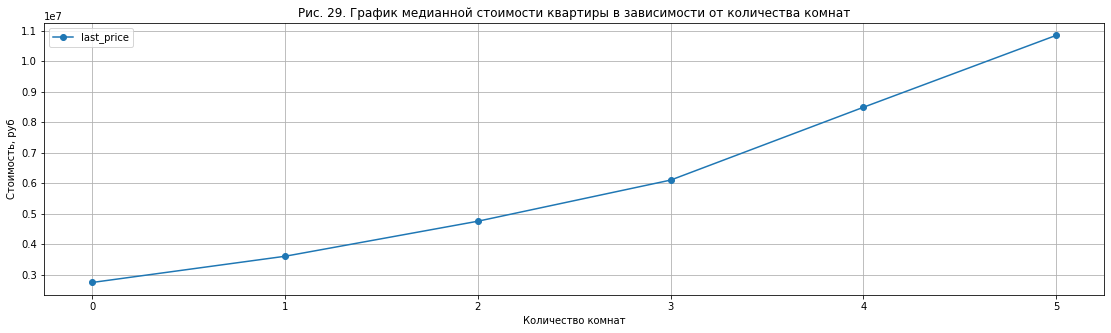

In [108]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(19,5))
plt.title('Рис. 29. График медианной стоимости квартиры в зависимости от количества комнат');
plt.xlabel('Количество комнат');
plt.ylabel('Стоимость, руб');

Как показывает график, медианная стоимость квартиры при увеличении количества комнат, растет - что вполне ожидаемо.
При этом начиная от 0 комнат (студии, свободная планировка) до 3 комнат стоимость при увеличении на 1 комнату растет примерно на миллион. Начиная с 3 до 5 комнат стоимость ведет себя иначе - при увеличении на 1 комнату цена увеличивается примерно на 2.5 млн.

Общее изменение стоимости недвижимости в зависимости от количества комнат варьируется в пределах от 2 млн до 11 млн.

Рассчитаем коэффициент корреляции для количества комнат и стоимости квартиры.

In [109]:
df['rooms'].corr(df['last_price'])

0.4073699521603065

Коэффициент положительный, значит при увеличении количества комнат цена растет (так и есть). Однако коэффициент корреляции ближе к 0, чем к 1. Возможно, это вызвано тем, что взаимосвязь этих величин не является линейной.

Построим график стоимости квадратного метра в зависимости от количества комнат.

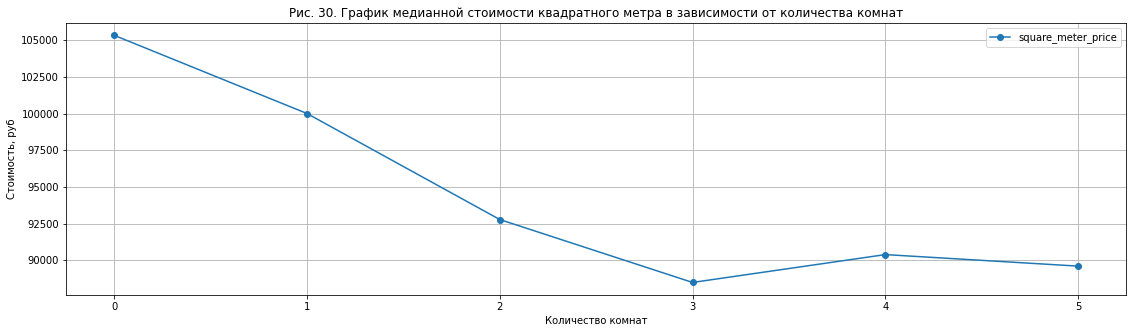

In [110]:
df.pivot_table(index='rooms', values='square_meter_price', aggfunc='median').plot(style='o-', grid=True, figsize=(19,5))
plt.title('Рис. 30. График медианной стоимости квадратного метра в зависимости от количества комнат');
plt.xlabel('Количество комнат');
plt.ylabel('Стоимость, руб');

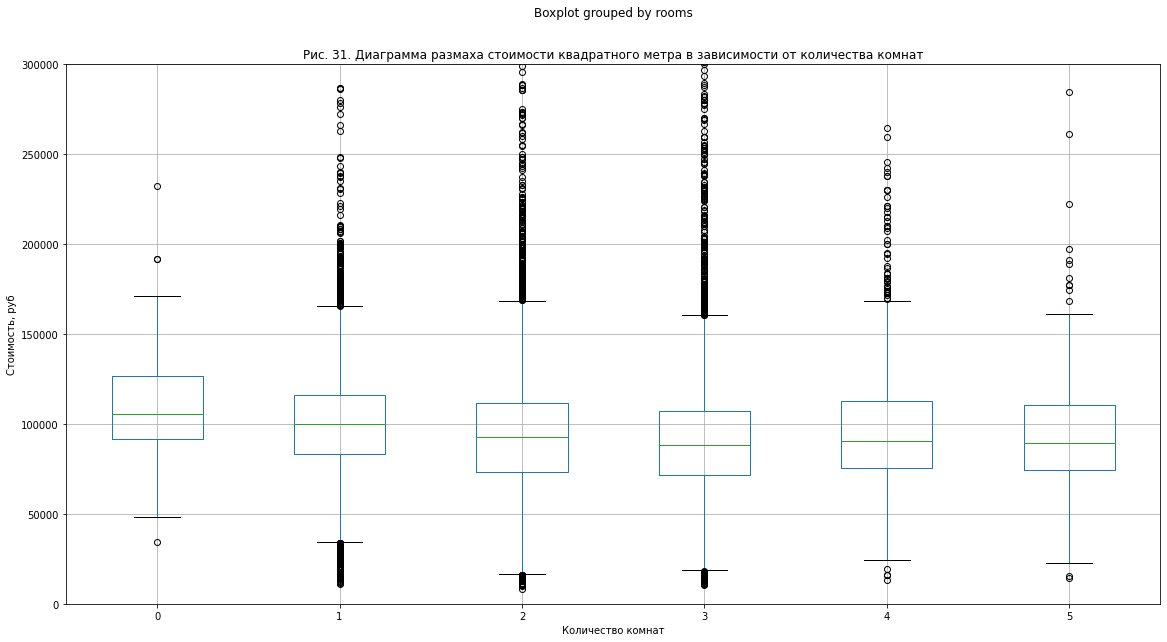

In [111]:
#визуализируем статистическую информацию о цене квадратного метра для каждого варианта комнат
fig, ax = plt.subplots(figsize=(19, 10))
df.boxplot(column='square_meter_price', by='rooms', ax=ax)
ax.set(ylim=(0, 300000))
plt.title('Рис. 31. Диаграмма размаха стоимости квадратного метра в зависимости от количества комнат');
plt.xlabel('Количество комнат');
plt.ylabel('Стоимость, руб');
plt.show()


Как показал график изменения стоимости квадратного метра в зависимости от количества комнат и диаграмма размаха, при уменьшении количества комнат уменьшается и стоимость квадратного метра. Возможно, это связано с низким спросом на многокомнатные квартиры.

Общее изменение медианной стоимости квадратного метра варьируется в пределах от 88.5 до 105 тысяч рублей, причем самая высокая стоимость квадратного метра наблюдается для студий и квартир со свободной планировкой (0 комнат. Примечательно, что это еще и самые быстро раскупаемые квартиры, см. 3.5). Межквартильный размах для "ящиков с усами" составляет около 40 тысяч.

Рассчитаем коэффициент корреляции:

In [112]:
df['rooms'].corr(df['square_meter_price'])

-0.042103644140743114

Вероятно, низкий коэффициент корреляции связан с тем, что зависимость между количеством комнат и стоимостью квадратного метра сложная. Например, от 0 до 3 комнат стоимость уменьшается, а от 3 до 5 комнат держится примерно на одном уровне (114-118 тысяч рублей).

### 3.7.3 Влияние удаленности от центра на стоимость квартиры

Для оценки влияния удаленности квартиры от центра на ее стоимость построим диаграмму рассеяния для значений `city_centers_nearest` и `last_price`, `city_centers_nearest` и `square_meter_price`.

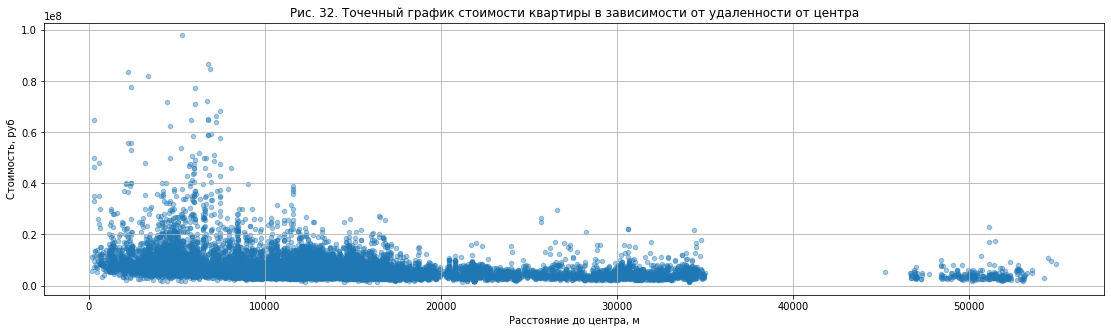

In [113]:
df.plot(x='city_centers_nearest', y='last_price', kind='scatter', figsize=(19, 5), alpha=0.4, grid=True)
plt.title('Рис. 32. Точечный график стоимости квартиры в зависимости от удаленности от центра');
plt.xlabel('Расстояние до центра, м');
plt.ylabel('Стоимость, руб');

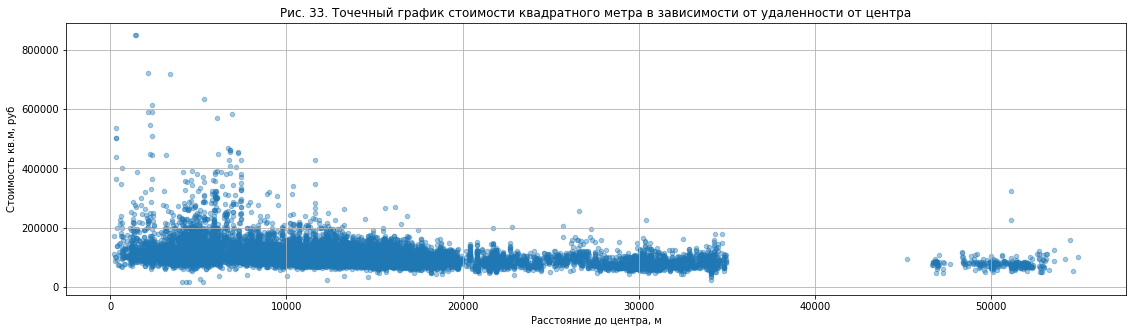

In [114]:
df.plot(x='city_centers_nearest', y='square_meter_price', kind='scatter', figsize=(19, 5), alpha=0.4, grid=True)
plt.title('Рис. 33. Точечный график стоимости квадратного метра в зависимости от удаленности от центра');
plt.xlabel('Расстояние до центра, м');
plt.ylabel('Стоимость кв.м, руб');

На диаграммах рассеяния выделяется три основных зоны:
- удаленность от центра на 0-20 км, здесь самая высокая цена - для основной части объявлений достигает 20 млн (около 200 тыс. за кв.м.);
- удаленность от центра 20-35 км, здесь цена снижена относительно предыдущей зоны и достигает примерно 10 млн (120 тыс/кв.м.);
- удаленность от центра 45 км и далее, цена меньше 10 млн рублей (100 тыс/кв.м.).

В каждой зоне наблюдаются резко отличающиеся значения - 100 млн (более 600 тыс/кв.м.), 30 млн (420 тыс/кв.м.), 22 млн (360 тыс/кв.м.) соответственно.
Самые высокие цены -"стена выбросов" наблюдаются для удаленности от центра на 0-8 км. Вероятно, эти объявления соответствуют квартирам в центре СПб.

Построим график изменения медианной стоимости квартиры и стоимости квадратного метра для каждого км удаленности от центра. Совместим с графиком цены относительно удаленности от центра, построенным по непреобразованным данным.

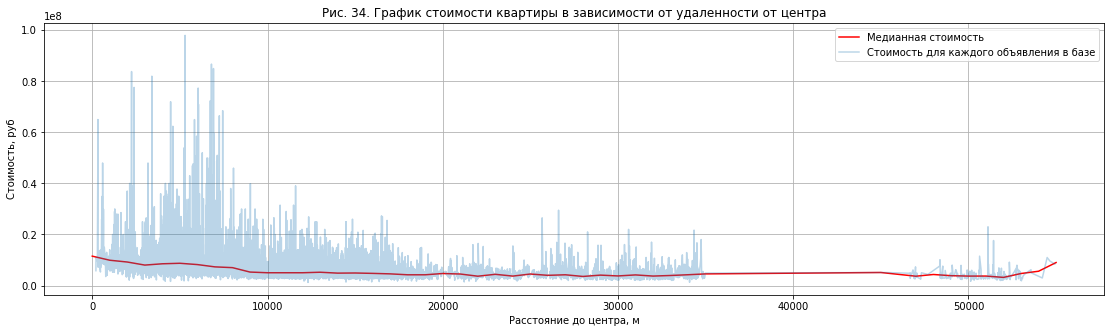

In [115]:
#построим график медианной стоимости квартиры для каждого километра удаленности от центра
ax=df.pivot_table(index=round(df['city_centers_nearest']/1000, 0)*1000, values='last_price', aggfunc='median').plot(alpha=1, color='red')
#в осях предыдущего графика построим график зависимости стоимости квартиры от удаленности от центра города 
df.sort_values(by='city_centers_nearest').plot(x='city_centers_nearest', y='last_price', ax=ax, alpha=0.3, figsize=(19, 5), grid=True)
plt.title('Рис. 34. График стоимости квартиры в зависимости от удаленности от центра');
plt.xlabel('Расстояние до центра, м');
plt.ylabel('Стоимость, руб');
plt.legend(['Медианная стоимость','Стоимость для каждого объявления в базе'], loc=1);

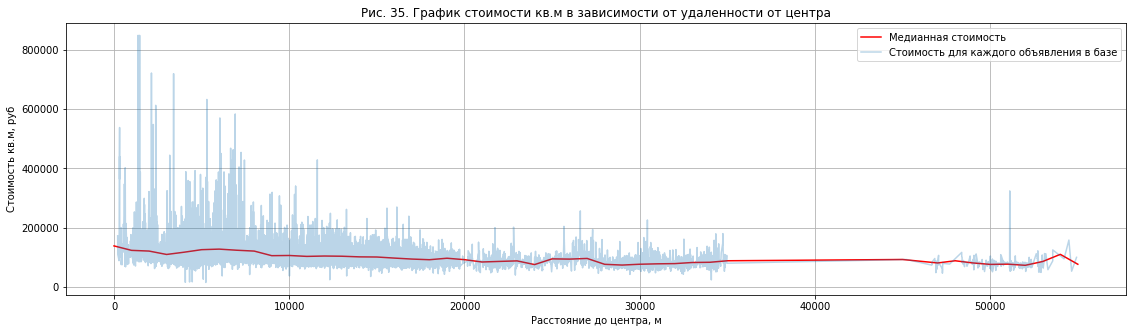

In [116]:
#построим график медианной стоимости квадратного метра для каждого километра удаленности от центра
ax=df.pivot_table(index=round(df['city_centers_nearest']/1000, 0)*1000, values='square_meter_price', aggfunc='median').plot(alpha=1, color='red')
#в осях предыдущего графика построим график зависимости стоимости квадратного метра от удаленности от центра города 
df.sort_values(by='city_centers_nearest').plot(x='city_centers_nearest', y='square_meter_price', ax=ax, alpha=0.3, figsize=(19, 5), grid=True)
plt.title('Рис. 35. График стоимости кв.м в зависимости от удаленности от центра');
plt.xlabel('Расстояние до центра, м');
plt.ylabel('Стоимость кв.м, руб');
plt.legend(['Медианная стоимость','Стоимость для каждого объявления в базе'], loc=1);

Из анализа **графика медианной стоимости** для каждого километра удаленности от центра города можно сделать следующие выводы:

- в диапазоне удаленности от 0 до 9 км наблюдается устойчивое уменьшение цены при увеличении удаленности от центра (обратная зависимость). В диапазоне от 3 до 5 км присутсвует небольшой рост цены. После 5 км и до 9 км стоимость продолжает уменьшаться;
- в диапазоне от 9 до  52 км скорость уменьшения цены при удалении от центра становится меньше, однако обратная связь сохраняется;
- в диапазоне 52+ км наблюдается резкое возрастание медианной стоимости.Возможно, на таком удалении от центра расположены популярные коттеджные поселки. Проверим, какие населенные пункты расположены на расстоянии более 52 км от центра СПб:

In [117]:
df[df['city_centers_nearest']>=52000]['new_locality_name'].unique()

array(['Ломоносов', 'Зеленогорск'], dtype=object)

**График медианной стоимости за квадратный метр** сохраняет тенденции графика медианной стоимости, однако он менее плавный, и более ярко проявляются "плато" на участке 5-8 км, 25-27 км. 

Создадим сводную таблицу: сгруппируем объявления по удаленности от центра (км) и запишем соответствующе им медианые значения стоимости квартир и стоимости за квадратный метр.

Рассчитаем коэффициент корреляции по сводной таблице:

1. Для всей таблицы;
2. Для диапазона 0-9 км;
3. Для диапазона 9-52 км
4. Для диапазона 52-55 км (55 км - максимальное значение).

In [118]:
df_pivot_price=df.pivot_table(index=round(df['city_centers_nearest']/1000, 0), values=['last_price', 'square_meter_price'], aggfunc='median').reset_index()
df_pivot_price.head()

city_centers_nearest  last_price  square_meter_price
0                   0.0  11500000.0            138537.0
1                   1.0   9900000.0            123529.0
2                   2.0   9200000.0            121134.0
3                   3.0   8000000.0            109708.0
4                   4.0   8510000.0            117303.5

In [119]:
min_board=[0, 0, 9, 52]
max_board=[df_pivot_price['city_centers_nearest'].max(), 9, 52, df_pivot_price['city_centers_nearest'].max()]

dict_corr_price={'Параметры корреляции':['Цена-удаленность от центра', 'Цена за кв.м.-удаленность от центра']}
for i in range(len(min_board)):
    dict_corr_price[str(min_board[i])+'-'+str(max_board[i])+' км']=[]
    dict_corr_price[str(min_board[i])+'-'+str(max_board[i])+' км']=[df_pivot_price.loc[(df_pivot_price['city_centers_nearest']>min_board[i])&(df_pivot_price['city_centers_nearest']<=max_board[i]), 'city_centers_nearest'].corr(df_pivot_price['last_price'])]
    dict_corr_price[str(min_board[i])+'-'+str(max_board[i])+' км'].append(df_pivot_price.loc[(df_pivot_price['city_centers_nearest']>min_board[i])&(df_pivot_price['city_centers_nearest']<=max_board[i]), 'city_centers_nearest'].corr(df_pivot_price['square_meter_price']))
    
pivot_corr_df=pd.DataFrame(dict_corr_price)
pivot_corr_df

Параметры корреляции  0-55.0 км    0-9 км   9-52 км  \
0           Цена-удаленность от центра  -0.509768 -0.900436 -0.619166   
1  Цена за кв.м.-удаленность от центра  -0.732575 -0.201661 -0.704990   

   52-55.0 км  
0    0.947154  
1   -0.271600

На удаленности от центра СПб на 9-52 км наблюдается отрицательный, близкий к -1 коэффициент корреляции между стоимостью квадратного метра и удаленностью от центра СПб, что говорит о наличии сильной сильной обратной связи между величинами. То же наблюдается для коэффициента корреляции между ценой и удаленностью от центра в этом же диапазонах.

На участках 0-9 км, 52-55 км коэффициент корреляции для стоимости квадратного метра и удаленности от центра близок к нулю, что говорит о практически отсутствии связи между величинами. Это соответствует характеру графика для стоимости кв.м. и может быть обусловлено преобладанием влияния на цену кв.м. других факторов, например, расположением квартиры в элитном районе, инфраструктурой и т.д.

Коэффициент корреляции цены квартиры и удаленностью от центра для диапазона 0-9 км составляет -0.9, для диапазона 52-55 км: 0.9, что также соответствует характеру графика для цены квартиры.

Разные коэффициенты корреляции между стоимостью квартиры и удаленностью, между стоимость. кв.м. и удаленностью от центра СПб на участках 0-9 км, 52-55 км могут быть вызваны тем, что цена квартиры - недостаточно "чистый" показатель, так как здесь может проявляться действие других факторов, например, площади помещения. Стоимость квадратного метра почти свободна от влияния площади квартиры (если не учитывать, что стоимость квадратного метра для многокомнатных квартир меньше, чем для однокомнатных) и более предпочтительна для проведения анализа.

На всем диапазоне коэффициент корреляции между ценой и удаленностью от центра СПб, между стоимостью кв.м. и удаленностью от центра СПб составляет -0.5 и -0.7 соответственно. Оба показателя отрицательны, что говорит о том, что при удалении от центра СПб в общем случае цена квартиры/цена за кв.м. снижается.

### 3.7.4 Влияние этажа расположения квартиры на ее стоимость

Для определения влияния этажа расположения квартиры на ее стоимость сгруппируем датафрейм по категории этажа и для каждой категории рассчитаем медианную стоимость квадратного метра и общей стоимости квартиры. По получившимся сводным таблицам построим графики.

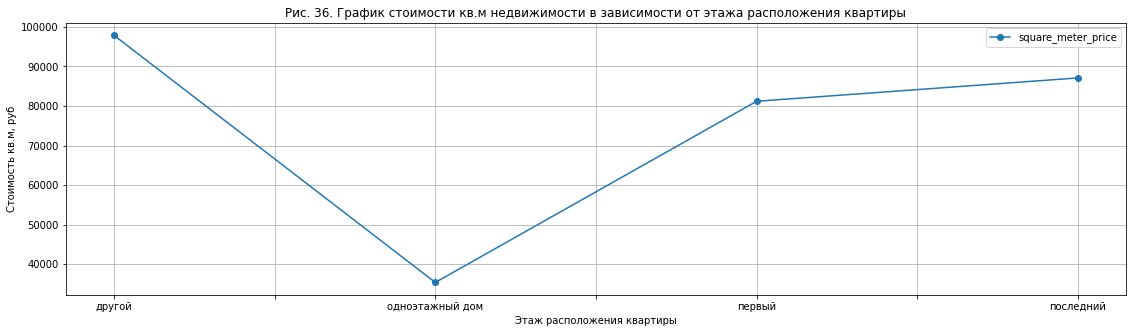

In [120]:
#построим график медианной стоимости кв.м в зависимости от этажа расположения квартиры
df.pivot_table(index='floors_category', values='square_meter_price', aggfunc='median').plot(figsize=(19,5), grid=True, style='o-')
plt.title('Рис. 36. График стоимости кв.м недвижимости в зависимости от этажа расположения квартиры');
plt.xlabel('Этаж расположения квартиры');
plt.ylabel('Стоимость кв.м, руб');

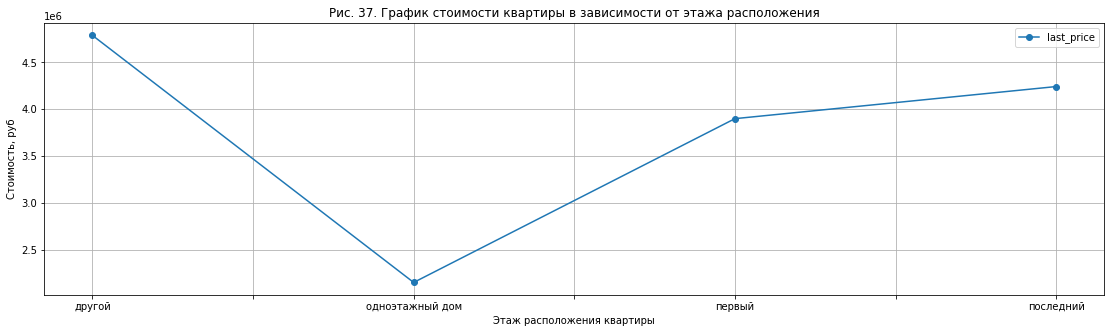

In [121]:
#построим график медианной стоимости в зависимости от этажа расположения квартиры
df.pivot_table(index='floors_category', values='last_price', aggfunc='median').plot(figsize=(19,5), grid=True, style='o-')
plt.title('Рис. 37. График стоимости квартиры в зависимости от этажа расположения');
plt.xlabel('Этаж расположения квартиры');
plt.ylabel('Стоимость, руб');

Не ожидаемо, но самые дорогие квартиры находятся ни на первом, ни на последнем этаже - на другом :).
Чуть дешевле стоят квартиры на последнем этаже, еще дешевле - на первом.
Примечательно, что цена кв.м., как и общая стоимость, в одноэтажных домах в 1.5-2 раза ниже, чем в многоэтажных домах. 
Это объяснимо для многоквартирных одноэтажных домов, но довольно необычно для частного дома.

Посмотрим, в каких населенных пунктах продается недвижимость в одноэтажных домах:

In [122]:
df[df['floors_category']=='одноэтажный дом']['new_locality_name'].unique()

array(['Волосово', 'Рощино пгт.', 'Вещево п.ст.', 'Будогощь пгт.',
       'Санкт-Петербург', 'Луга', 'Сестрорецк', 'Гаврилово поселок',
       'Сижно деревня', 'Ефимовский пгт.', 'Большие Колпаны деревня',
       'Большая Ижора пгт.', 'Оредеж поселок', 'Каськово деревня',
       'Суйда поселок', 'Свирьстрой пгт.', 'Сосново поселок',
       'Пчевжа поселок', 'Зеленогорск'], dtype=object)

Продажа одноэтажного частного дома для полученного списка населенных пунктов вполне реально. Может быть, там сохранились и одноэтажные многоквартирные дома, что объяснило бы характер графика выше.

### 3.7.5 Влияние на стоимость квартиры дня недели, месяца и года размещения объявления

Для определения влияния дня недели, месяца и года продажи квартиры на ее стоимость сгруппируем датафрейм по этим категориям и для каждой категории рассчитаем медианную общую стоимость и медианную стоимость квадратного метра. По получившимся сводным таблицам построим графики.

**Построим графики медианной общей стоимости квартиры и медианной стоимости квадратного метра в зависимости от года размещения объявления**

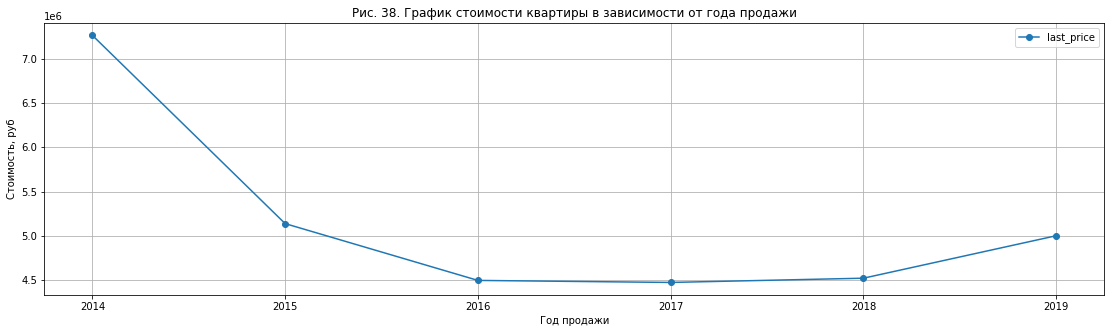

In [123]:
#построим график медианной стоимости квартиры в зависимости от года размещения объявления
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 38. График стоимости квартиры в зависимости от года продажи');
plt.xlabel('Год продажи');
plt.ylabel('Стоимость, руб');

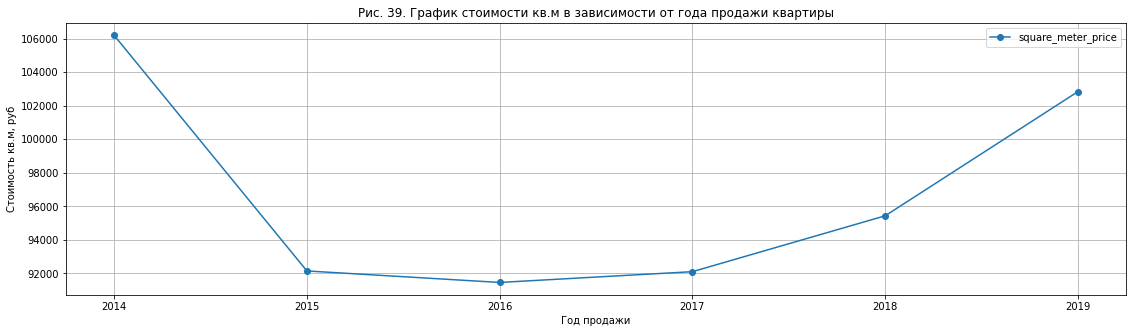

In [124]:
#построим график медианной стоимости кв.м в зависимости от года размещения объявления
df.pivot_table(index='year', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 39. График стоимости кв.м в зависимости от года продажи квартиры');
plt.xlabel('Год продажи');
plt.ylabel('Стоимость кв.м, руб');

Согласно полученному графику медианной стоимости кв.м (рис. 39), за период с 2014 по 2019 год максимальная стоимость квадратного метра  (106 тыс. руб.) наблюдалась в 2014 году, затем к 2015 году снизилась на примерно 13% (92 тыс.руб.),  к 2016 году - еще на 0.5% от первоначального значения и достигла своего минимума в 2016 г. (91.5 тыс.руб./кв.м.).

После 2016 г. стоимость квадратного метра недвижимости начинает расти и к 2019 г. достигает 103 тыс.руб./кв.м., что на 3% меньше, чем в 2014 году.

Анализ графика зависимости медианной стоимости квартиры от года размещения объявления (рис. 38) показывает, что максимальная стоимость квартиры, как и максимальная стоимость кв.м., наблюдалась в 2014 году (7.3 млн). К 2016 г. общая стоимость квартир упала на 38%, и в течение трех лет (2016, 2017, 2018 г.) держалась на уровне 4.5 млн, после чего начала расти и к 2019 г. достигла 5 млн, что на 46% меньше первоначального значения.

Подобное поведение графиков может быть вызвано изменением курса евро/доллара относительно рубля, инфляцией, реформами в области купли-продажи недвижимости и т.д.

Следует заметить, что удорожание стоимости кв.м идет быстрее, чем рост общей стоимости недвижимости. Так, стоимость кв.м к 2019 г. практически вернулась к значениям 2014 г (меньше всего лишь на 3%), в то время как общая стоимость квартир на 2019 год составляет чуть более половины от значений 2014 г. (меньше на 46%). Подобная разница в графиках может быть вызвана влиянием общей площади недвижимости: например, при возрастании цены кв.м площадь продаваемых квартир может снижаться, что в свою очередь может привести к снижению общей стоимости недвижимости, сохранению ее на прежнем уровне или небольшому росту, непропорциональному росту стоимости кв.м. Проверим медианную площадь продаваемой недвижимости в разные годы:

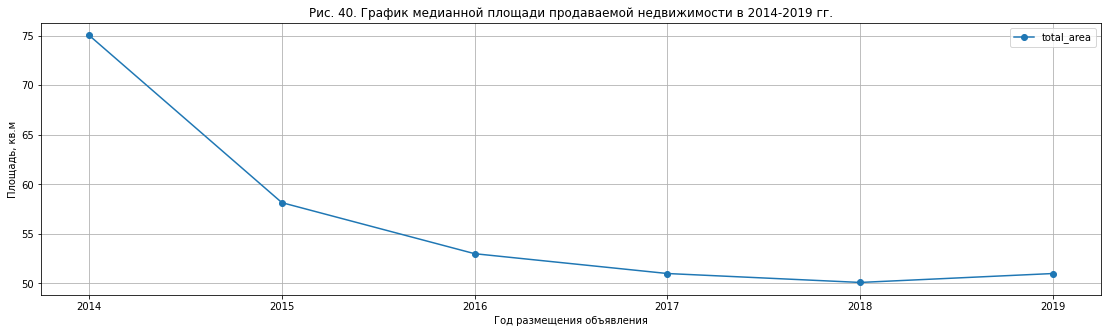

In [125]:
df.pivot_table(index='year', values='total_area', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 40. График медианной площади продаваемой недвижимости в 2014-2019 гг.');
plt.xlabel('Год размещения объявления');
plt.ylabel('Площадь, кв.м');

Опираясь на график (рис. 40), можно сказать, что медианная площадь продаваемой недвижимости с 2014 по 2018 гг. снижалась и лишь только в 2019 г. произошел небольшой рост. При этом в 2016-2018 гг снижение площади продаваемых квартир наблюдалось на фоне роста стоимости кв.м, что, вероятно, и привело к сохранению медианной стоимости квартир в 2016-2018 гг. на одном уровне (4.5 млн).

**Построим график медианной стоимости квартиры и стоимости квадратного метра в зависимости от месяца размещения объявления:**

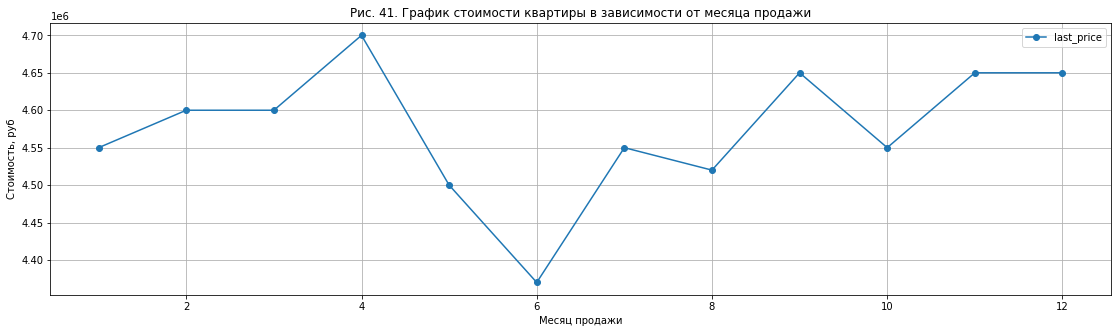

In [126]:
#построим график стоимости квартиры в зависимости от месяца продажи
df.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 41. График стоимости квартиры в зависимости от месяца продажи');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость, руб');

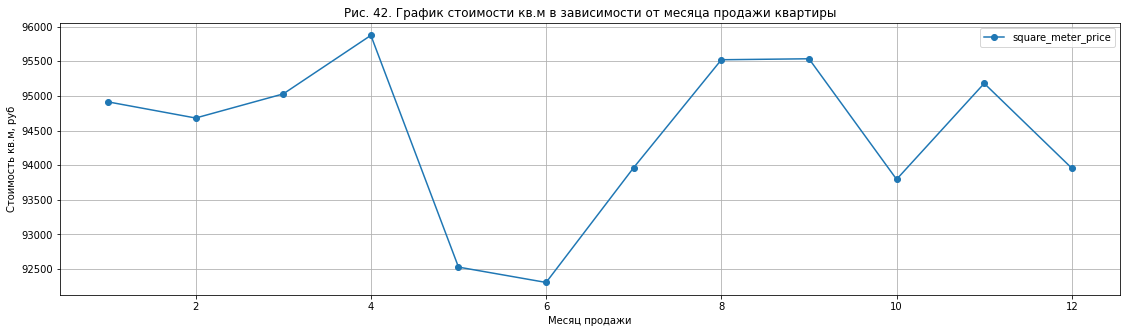

In [127]:
#построим график стоимости кв.м в зависимости от месяца продажи
df.pivot_table(index='month', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 42. График стоимости кв.м в зависимости от месяца продажи квартиры');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость кв.м, руб');

Согласно графику медианной стоимости квадратного метра в зависимости от месяца размещения объявления (рис. 42), максимальные цены на кв.м наблюдаются в апреле, августе, сентябре (более 95.5 тыс.руб/кв.м), минимальные - в июне (92.3 тыс.руб/кв.м) и мае(92.5 тыс.руб/кв.м). Амплитуда изменения стоимости кв. м. небольшая - менее 4000 рублей.

График медианной стоимости квартир показывает максимальную цену в апреле (4.7 млн), сентябре, ноябре, декабре (4.65 млн). Минимальная цена наблюдается в июне (4.37 млн). Амплитуда изменения общей стоимости квартир составляет 350 тыс. рублей.

Проверим, имеют ли графики зависимости стоимости кв.м. и общей стоимости недвижимости от месяца для каждого года, приведенного в датафрейме, характер, похожий на предыдущие графики. Если да - то полученные медианные графики стоимости кв.м. и общей стоимости квартир (без учета года) отражают реальную ситуацию.

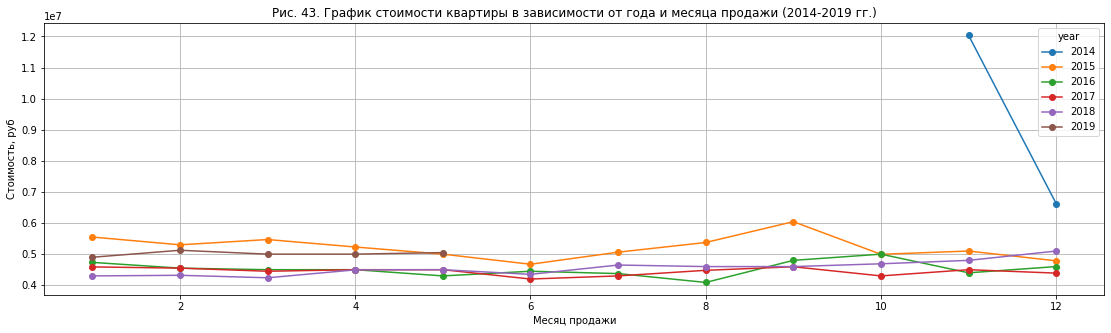

In [128]:
#построим график зависимости стоимости квартиры в зависимости от года и месяца продажи
df.pivot_table(index='month', columns='year', values='last_price', aggfunc='median').reset_index().plot(x='month', y=[2014, 2015, 2016, 2017, 2018, 2019], style='o-', figsize=(19, 5), grid=True)
plt.title('Рис. 43. График стоимости квартиры в зависимости от года и месяца продажи (2014-2019 гг.)');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость, руб');

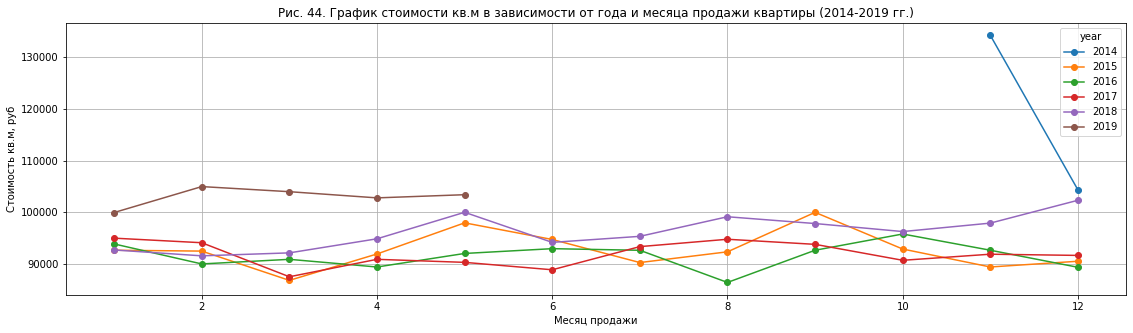

In [129]:
#построим график зависимости стоимости кв.м в зависимости от года и месяца продажи
df.pivot_table(index='month', columns='year', values='square_meter_price', aggfunc='median').reset_index().plot(x='month', y=[2014, 2015, 2016, 2017, 2018, 2019], style='o-', figsize=(19, 5), grid=True)
plt.title('Рис. 44. График стоимости кв.м в зависимости от года и месяца продажи квартиры (2014-2019 гг.)');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость кв.м, руб');

Анализируя риведенные выше графики можно сказать, что общая тенденция изменения общей стоимости квартиры и стоимости кв.м. в зависимости от месяца от года к году не прослеживается. График для 2014 г. отмечается резким падением общей стоимости квартир (от 12 млн в ноябре до 6.6 млн в декабре) и стоимости кв.м. (от 133 тыс. в ноябре до 105 тыс. в декабре. Графики для 2015-2018 гг колеблются друг от друга в пределах 20 тыс/кв.м. (для стоимости кв.м) и в пределах 2 млн (для общей стоимости недвижимости).

Кроме того, для 2014 и 2019 гг. представлены не все месяцы. Построим графики для 2015-2018 гг, включающих все 12 месяцев.

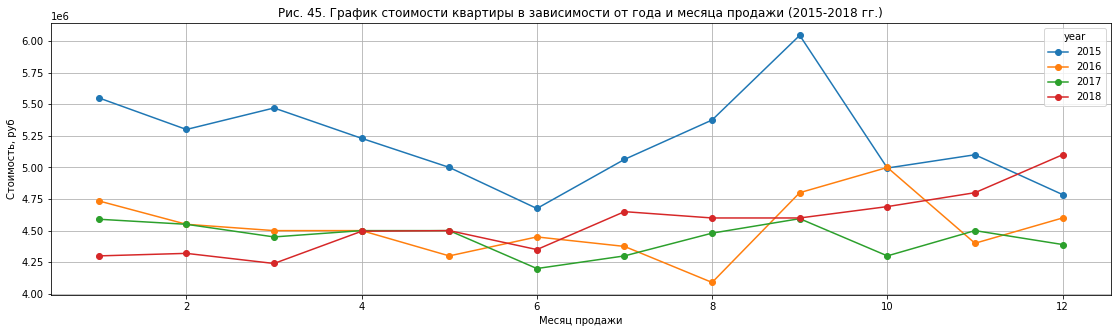

In [130]:
#построим график зависимости стоимости квартиры в зависимости от года и месяца продажи (2015-2018)
df.pivot_table(index='month', columns='year', values='last_price', aggfunc='median').reset_index().plot(x='month', y=[2015, 2016, 2017, 2018], style='o-', figsize=(19, 5), grid=True)
plt.title('Рис. 45. График стоимости квартиры в зависимости от года и месяца продажи (2015-2018 гг.)');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость, руб');

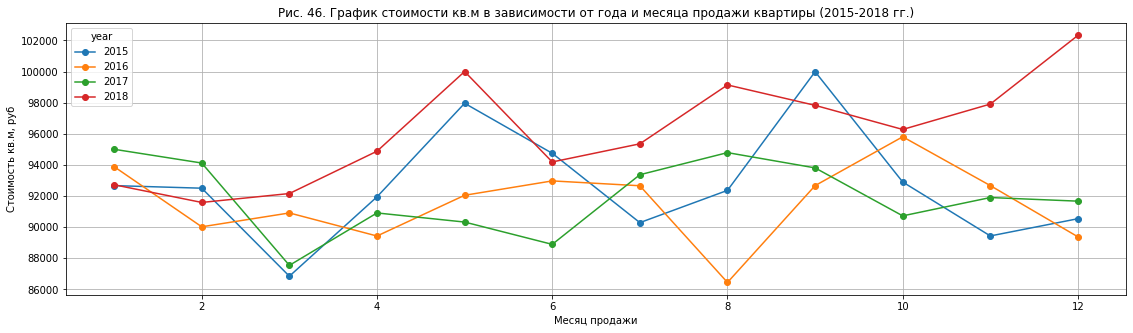

In [131]:
#построим график зависимости стоимости кв.м в зависимости от года и месяца продажи (2015-2018 гг.)
df.pivot_table(index='month', columns='year', values='square_meter_price', aggfunc='median').reset_index().plot(x='month', y=[2015, 2016, 2017, 2018], style='o-', figsize=(19, 5), grid=True)
plt.title('Рис. 46. График стоимости кв.м в зависимости от года и месяца продажи квартиры (2015-2018 гг.)');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость кв.м, руб');

Можно сказать, что графики зависимости цены за кв.м. от месяца размещения объявления за 2015-2018 гг. напоминают синусоиду с локальными минимумами в марте, июле, ноябре и максимумами в  мае, сентябре и декабре. При этом максимумы и минимумы цены для каждого года приходятся на разные локальные экстремумы.

Графики зависимости общей стоимости недвижимости от месяца размещения объявления за 2015-2018 гг. не имеют ярко выраженных общих тенденций. При этом стоимость квартир в 2015 г. в январе-сентябре выше, чем в 2016-2018 в тот же период, и лишь к октябрю снижается до уровня цен 2016-2018 гг.


В целом графики завимости цены за кв.м. от месяца размещения объявления за 2015-2018 повторяют характер графика медианной стоимости квадратного метра, построенной по значениям всех лет. Амплитуда колебаний цены кв.м для разных лет, в зависимости от месяца, колеблется в пределах 10-16 тысяч/кв.м.

Графики зависимости медианной стоимости недвижимости от месяца размещения объявления за 2015-2018 гг. характер аналогичного графика, построенного по значениям всех лет (рис. 41), не повторяют.

**Построим график медианной стоимости квартиры и медианной стоимости квадратного метра в зависимости от дня недели размещения объявления**

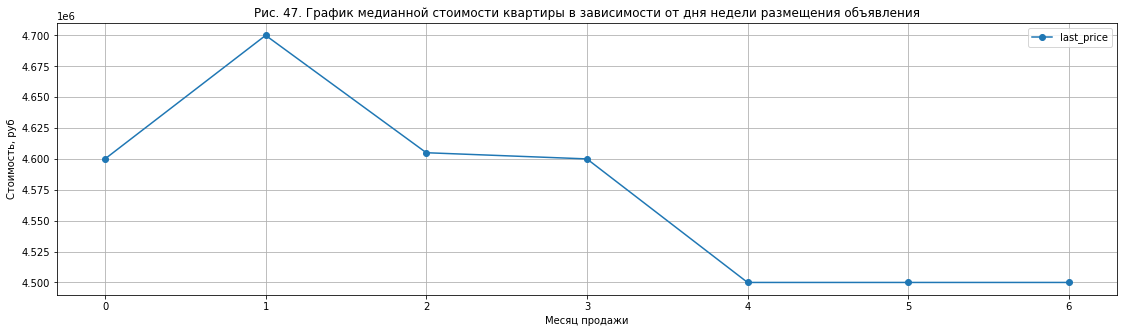

In [132]:
#построим график медианной стоимости квартиры в зависимости от дня недели размещения объявления
df.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 47. График медианной стоимости квартиры в зависимости от дня недели размещения объявления');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость, руб');

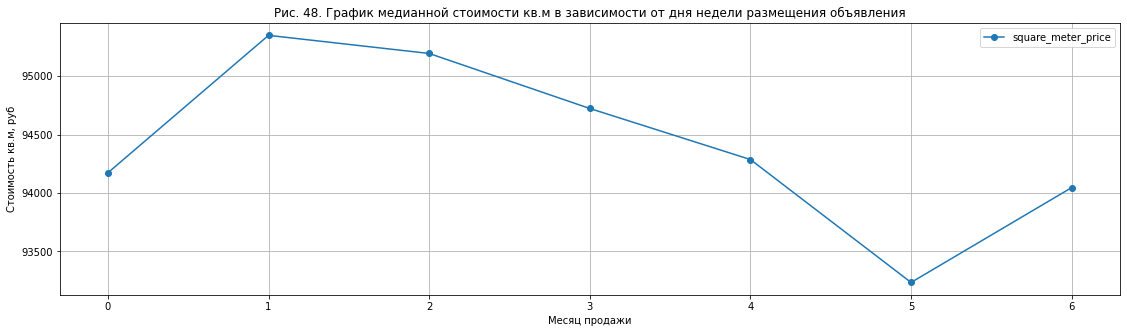

In [133]:
#построим график медианной стоимости кв.м в зависимости от дня недели размещения объявления
df.pivot_table(index='weekday', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
plt.title('Рис. 48. График медианной стоимости кв.м в зависимости от дня недели размещения объявления');
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость кв.м, руб');

На графике медианной стоимости кв.м. в зависимости от дня недели размещения объявления минимальная цена соответствует субботе (93.2 тыс/кв.м), максимальная - вторнику (95.4 тыс/кв.м). Амплитуда изменений стоимости кв.м составляет 2.2 тыс.руб/кв.м. 

На графике зависимости медианной стоимости недвижимости от дня недели размещения объявления максимальная цена также соответствует вторнику (4.7 млн), минимальная наблюдается с пятницы по воскресенье (4.5 млн). Амплитуда изменений стоимости составляет 200 тыс.руб.

Проверим, как соотносятся с предыдущими графиками графики зависимости медианной стоимости кв.м. от дня недели, построенные:

а) для разных месяцев размещения объявления

б) для разных лет размещения объявления

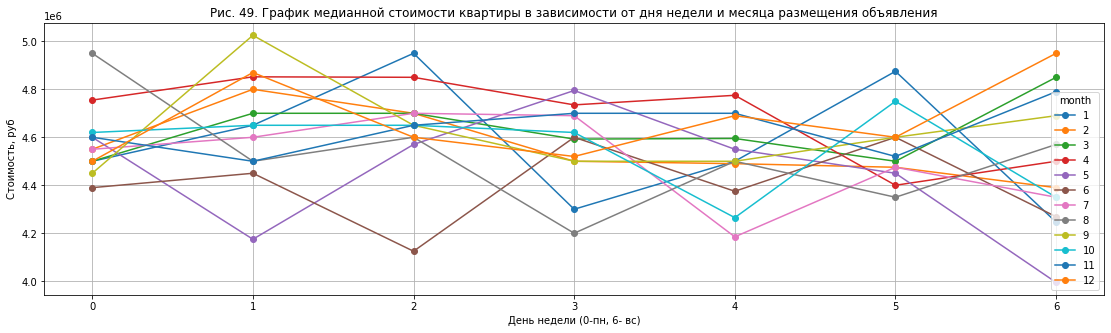

In [134]:
#построим график медианной стоимости в зависимости от дня недели размещения объявления (в разные месяцы)
df.pivot_table(index='weekday', columns='month', values='last_price', aggfunc='median').reset_index().plot(x='weekday', y=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], style='o-', figsize=(19, 5), grid=True);
plt.title('Рис. 49. График медианной стоимости квартиры в зависимости от дня недели и месяца размещения объявления');
plt.xlabel('День недели (0-пн, 6- вс)');
plt.ylabel('Стоимость, руб');

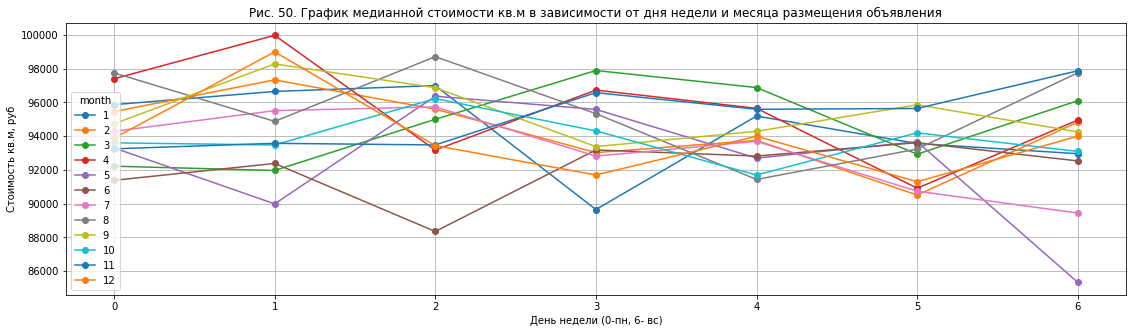

In [135]:
#построим график медианной стоимости  кв.м в зависимости от дня недели размещения объявления (в разные месяцы)
df.pivot_table(index='weekday', columns='month', values='square_meter_price', aggfunc='median').reset_index().plot(x='weekday', y=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], style='o-', figsize=(19, 5), grid=True)
plt.title('Рис. 50. График медианной стоимости кв.м в зависимости от дня недели и месяца размещения объявления');
plt.xlabel('День недели (0-пн, 6- вс)');
plt.ylabel('Стоимость кв.м, руб');

Анализируя полученные графики совместно с графиками на рис. 47-48, можно сказать следующее: 

- для 7 месяцев из 12 во вторник наблюдается увеличение стоимости недвижимости по сравнению с понедельником, при этом только для трех месяцев цена в этот день максимальная;
- для 8 месяцев из 12 во вторник наблюдается увеличение стоимости кв.м по сравнению с понедельником, при этом только для четырех месяцев цена в этот день максимальная;
- на рис. 47 с пт по вс медианная цена недвижимости остается постоянной (4.5 млн), в то время как график изменения медианной цены в зависимости от дня недели и месяца размещения объявления показывает, что цены в пт-вс для разных месяцев не находятся на одном и том же уровне. Это подтверждает случайных характер графика на рис. 47, что не дает возможности опираться на подобные "зависимости" при планировании сделок с недвижимостью;
- для 6 месяцев из 12 в субботу наблюдается снижение  стоимости по сравнению с пятницей, при этом цена в этот день минимальна для трех месяцев.

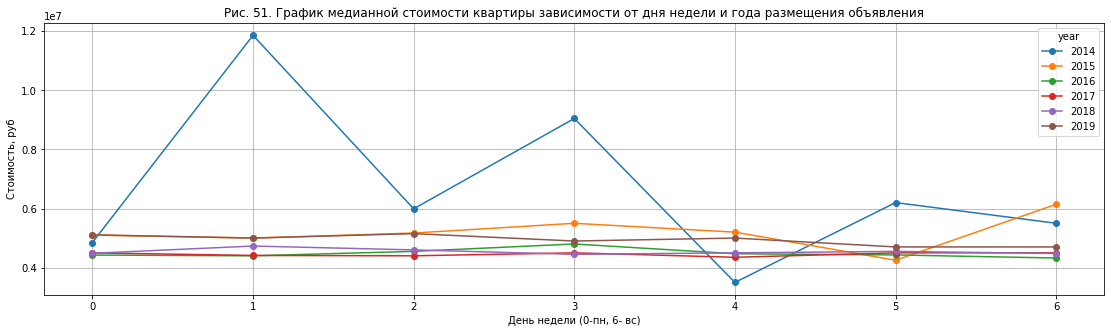

In [136]:
#построим график медианной стоимости в зависимости от дня недели размещения объявления (для разных лет)
df.pivot_table(index='weekday', columns='year', values='last_price', aggfunc='median').reset_index().plot(x='weekday', y=[2014, 2015, 2016, 2017, 2018, 2019], style='o-', figsize=(19, 5), grid=True)
plt.title('Рис. 51. График медианной стоимости квартиры зависимости от дня недели и года размещения объявления');
plt.xlabel('День недели (0-пн, 6- вс)');
plt.ylabel('Стоимость, руб');

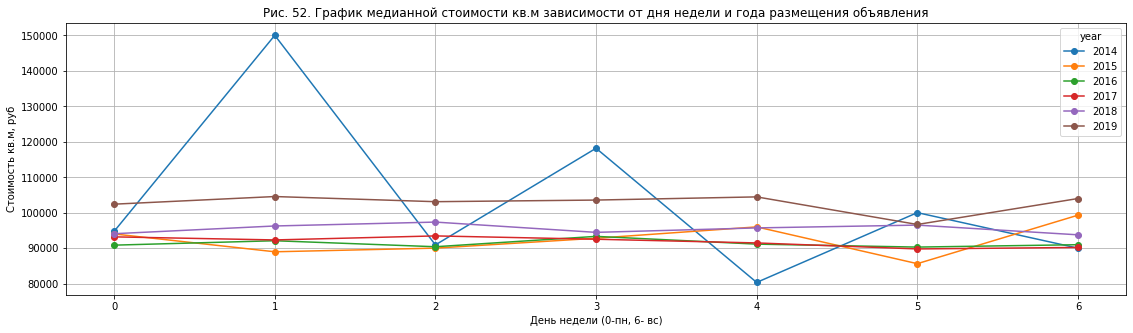

In [137]:
#построим график медианной стоимости кв.м в зависимости от дня недели размещения объявления (для разных лет)
df.pivot_table(index='weekday', columns='year', values='square_meter_price', aggfunc='median').reset_index().plot(x='weekday', y=[2014, 2015, 2016, 2017, 2018, 2019], style='o-', figsize=(19, 5), grid=True, title='График зависимости медианной стоимости кв.м. от дня недели размещения объявления (в разные годы)')
plt.title('Рис. 52. График медианной стоимости кв.м зависимости от дня недели и года размещения объявления');
plt.xlabel('День недели (0-пн, 6- вс)');
plt.ylabel('Стоимость кв.м, руб');

Анализируя полученный график, можно сказать следующее:
- график цены медианной стоимости кв.м. и медианной общей стоимости в зависимости от дня недели для 2014 г. имеет пилообразный характер и отражает резкие изменения цены в течение недели. Максимальный скачок стоимости кв.м наблюдается со вторника на среду (≈60 тыс/кв.м., ), общей стоимости - с понедельника на вторник (7 млн), к выходным график начинает стабилизироваться;
- максимальное значение цены за кв.м. во вторник наблюдается для 2014 и 2019 гг, минимальное значение цены кв.м в субботу - для 2015, 2017, 2019 гг.
- максимальное значение медианной общей стоимости во вторник наблюдается для 2014 г, минимальное значение медианной общей стоимости с пт по вс - для 2016-2018 гг.

**Выводы:**

В результате анализа факторов, влияющих на стоимость недвижимости, было выявлено:

1. При увеличении площади увеличивается общая стоимость квартиры. Коэффициент корреляции составляет 0.7.
2. Увеличение числа комнат ведет к увеличению общей стоимости квартиры, что, однако, сопровождается снижением стоимости квадратного метра. Общее изменение медианной стоимости для количества комнат от 0 до 5 варьируется в пределах от 88.5 до 105 тысяч рублей/кв.м. 
3. Корреляция между удаленностью от центра СПб и стоимостью квадратного метра отрицательная и составляет -0.7, что говорит о наличии связи. Однако выделяются участки (0-9 км, 52-55 км), для которых коэффициент корреляции близок к нулю - вероятно, вследствие влияния других факторов.
4. Наиболее высокая цена кв.м. наблюдается у квартир, расположенных на "другом" этаже (99 тыс.руб), затем идут квартиры на последнем этаже (88 тыс.руб/кв.м.), квартиры на первом этаже (81 тыс.руб/кв.м.). Минимальная стоимость кв.м наблюдается у квартир в одноэтажных домах (35 тыс.руб/кв.м), расположенных в Ленинградской области. Изменение общей стоимости недвижимости имеет тот же характер: самые дорогие квартиры находятся на "другом" этаже (4.8 млн руб), затем на последнем (4.25 млн. руб), первом (3.9 млн. руб), в одноэтажных домах (2.2 млн).
5. Медианная стоимость квадратного метра за 2014-2019 г. менялась в пределах от 91.5 тыс.руб/кв.м (2016 год) до 106 тыс.руб/кв.м. (2014 год).За 2014-2016 гг. цена кв.м. опустилась со 106 тыс.руб. до 91.5 тыс. руб, затем снова начала расти и  к 2019 г. достигла 103 тыс.руб/кв.м.
6. Медианная общая стоимость недвижимости за 2014-2019 гг. менялась в пределах от 7.3 млн руб (2014 г.) до 4.5 млн руб (2016-2018 гг). После 2018 г. стоимость начала расти, и к 2019 г.  достигла 5 млн, что меньше первоначального значения на 46% - вследствие уменьшения площади продаваемых квартир.
7. Медианная стоимость кв.м. по месяцам  меняется на величину менее 4 тыс.руб/кв.м., четкая зависимость не выявляется.
8. Медианная общая стоимость недвижимости по месяцам меняется на 350 тыс. руб., четкая зависимость не выявляется.
9. Медианная стоимость кв.м. по дням недели меняется на 2200 руб/кв.м. 
10. Общая стоимость квартир по дням недели меняется в пределах 200 тыс. руб.


## 3.8 Анализ 10 населенных пунктов с наибольшим количеством объявлений

В текущем разделе требуется:
- выбрать 10 населенных пунктов с наибольшим числом объявлений;
- рассчитать среднюю цену кв.м. в этих населенных пунктах;
- выделить населенные пункты с самой высокой и низкой стоимостью жилья.

In [139]:
#запишем в новую таблицу 10 населенных пунктов с наибольшим количеством объявлений
df_popular_locality=df.groupby('new_locality_name').agg({'square_meter_price': ['count', 'mean']}).sort_values(by=('square_meter_price', 'count'), ascending=False).head(10).sort_values(by=('square_meter_price', 'mean'), ascending=False)
df_popular_locality

square_meter_price               
                               count           mean
new_locality_name                                  
Санкт-Петербург                14863  111850.982238
Пушкин                           351  102948.509972
Кудрово                          460   95383.117391
Парголово поселок                316   90012.496835
Мурино                           569   85721.397188
Шушары поселок                   428   78251.714953
Колпино                          333   75263.060060
Гатчина                          299   68840.638796
Всеволожск                       395   68648.468354
Выборг                           230   57810.995652

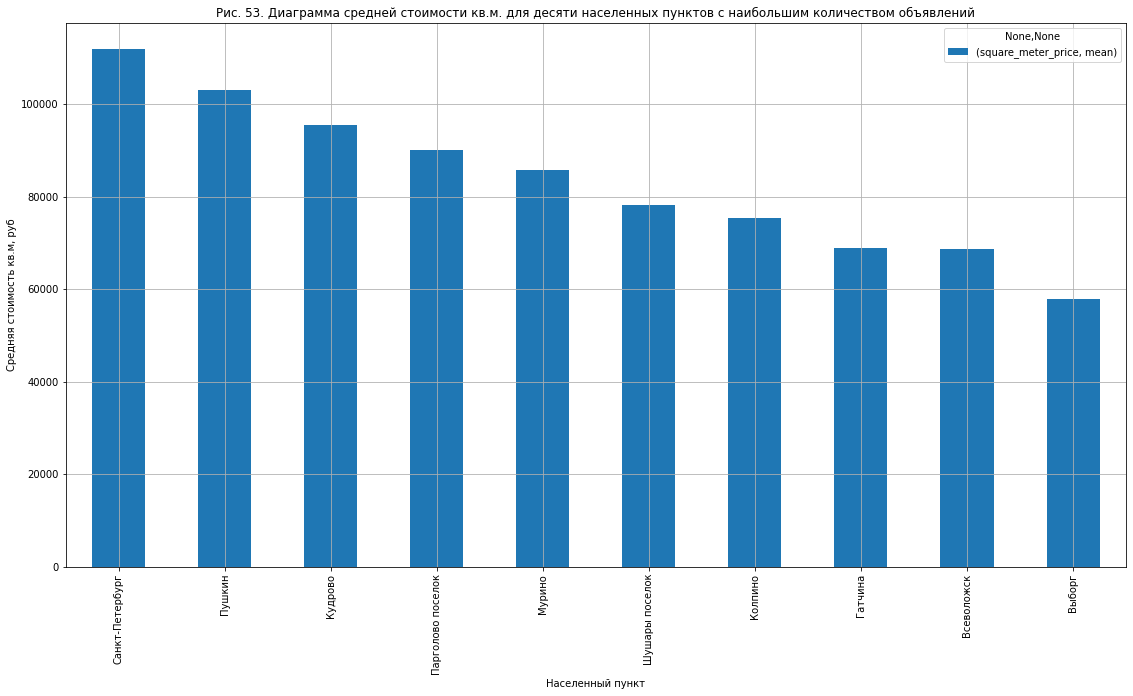

In [140]:
#построим диаграмму средней стоимости кв.м. для каждого населенного пункта в df_popular_locality
df_popular_locality.plot(y=('square_meter_price', 'mean'), kind='bar', figsize=(19,10), grid=True);
plt.title('Рис. 53. Диаграмма средней стоимости кв.м. для десяти населенных пунктов с наибольшим количеством объявлений');
plt.xlabel('Населенный пункт');
plt.ylabel('Средняя стоимость кв.м, руб');

**Вывод:** к населенным пунктам с наибольшей стоимостью квадратного метра можно отнести: Санкт-Петербург (112 тыс/кв.м) и Пушкин (103 тыс/кв.м), с наименьшей - Всеволожск и Выборг (69 тыс/кв.м и 58 тыс/кв.м соответственно).

## 3.9 Выделение области в центре Санкт-Петербурга

В текущем разделе необходимо определить границы области, находящейся в центре Санкт-Петербурга.

In [141]:
#создадим столбцец датафрейма, в котором сохраним расстояние до центра СПб в км
df['city_centers_nearest_km']=round(df['city_centers_nearest']/1000, 0)

#выведем первые 5 строк таблицы
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
5             NaN            12         14.4      5         False   False   

   open_plan  kitchen_area  balcony  airports_nearest  city_centers_nearest  \
0      False          25.0        0           18863.0               16028.0   
1      False          11.0        2           12817.0               18603.0   
2      False           8.3        0           21741.0               13933.0   
3      False           NaN        0           28098.0                6800.0   
5      False           9.1        0               NaN                   NaN   

   parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                  1          482.0                  2          755.0   
1                  0            NaN                  0            NaN   
2                  1           90.0                  2          574.0   
3                  2           84.0                  3          234.0   
5                  0            NaN                  0            NaN   

   days_exposition new_locality_name  square_meter_price  weekday  month  \
0              NaN   Санкт-Петербург            120370.0        3      3   
1             81.0    Шушары поселок             82921.0        1     12   
2            558.0   Санкт-Петербург             92786.0        3      8   
3            424.0   Санкт-Петербург            408176.0        4      7   
5             55.0      Янино-1 пгт.             95066.0        0      9   

   year floors_category  living_to_total  kitchen_to_total  \
0  2019          другой             0.47              0.23   
1  2018          первый             0.46              0.27   
2  2015          другой             0.61              0.15   
3  2015          другой              NaN               NaN   
5  2018          другой             0.47              0.30   

   city_centers_nearest_km  
0                     16.0  
1                     19.0  
2                     14.0  
3                      7.0  
5                      NaN

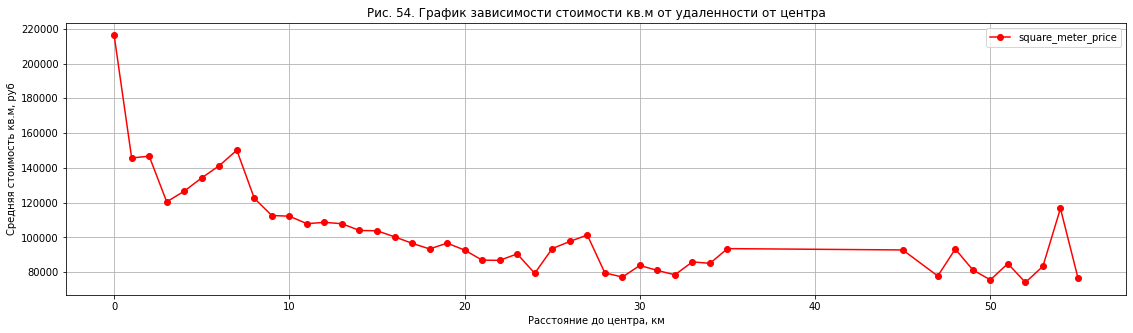

In [142]:
#рассчитаем с помощью сводной таблицы среднее значение стоимости кв.м. для каждого км
df.pivot_table(index='city_centers_nearest_km', values='square_meter_price', aggfunc='mean').plot(alpha=1, color='red', style='o-', figsize=(19,5), grid=True);
plt.title('Рис. 54. График зависимости стоимости кв.м от удаленности от центра');
plt.xlabel('Расстояние до центра, км');
plt.ylabel('Средняя стоимость кв.м, руб');

Согласно графику зависимости стоимости кв.м. от удаленности от центра, наиболее сильно значения графика меняются в пределах от 0 до 7 км. Недвижимость в пределах от 0 до 7 км от центра СПб примем за находящуюся в центре. 

In [143]:
#посчитаем количество недвижимости в центре
df[df['city_centers_nearest_km']<=7]['total_images'].count()

3036

**Вывод:** недвижимость в пределах от 0 до 7 км от центра СПб примем за находящуюся в центре. Для исследуемого датафрейма в центре находится 3036 объектов.

## 3.10 Изучение недвижимости в центре Санк-Петербурга

### 3.10.1 Изучение параметра "площадь" для квартир  в центре Санкт-Петербурга

Методом describe() получим статистическую информацию о площади квартир в центре СПб. Дополнительно запросим статистическую информацию о площади квартир во всем датафрейме (повторно, для сравнения). Построим диаграммы размаха по параметру "площадь" как для квартир в центре, так и для всего датафрейма.

In [144]:
print('Статистическая информация о площади для квартир в центре СПб:')
df.loc[df['city_centers_nearest_km']<=7, 'total_area'].describe()

Статистическая информация о площади для квартир в центре СПб:


count    3036.000000
mean       79.036288
std        34.076365
min        13.000000
25%        54.975000
50%        73.400000
75%        97.000000
max       494.100000
Name: total_area, dtype: float64

In [145]:
print('Статистическая информация о площади для квартир для всего датафрейма:')
df['total_area'].describe()

Статистическая информация о площади для квартир для всего датафрейма:


count    22433.000000
mean        56.996181
std         24.588672
min         13.000000
25%         40.000000
50%         51.200000
75%         67.700000
max        494.100000
Name: total_area, dtype: float64

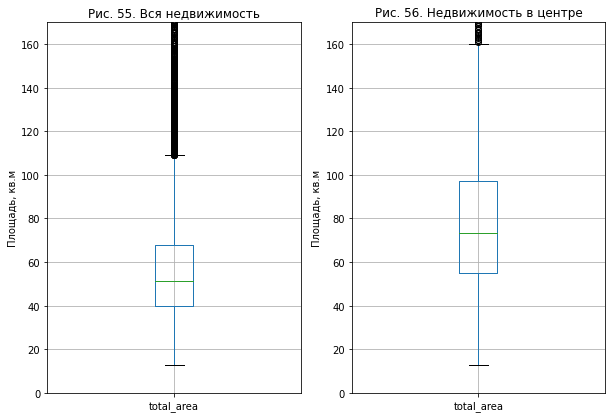

In [146]:
#построим ящик с усами для значений total_area для всего датафрейма
plt.figure(figsize=(10, 15))
plt.subplot(2,2,1)
plt.ylim(0,170)
df['total_area'].plot(kind='box', grid=True)
plt.title('Рис. 55. Вся недвижимость')
plt.ylabel('Площадь, кв.м');

#построим ящик с усами для значений total_area для недвижимости в центре
plt.subplot(2,2,2)
plt.ylim(0,170)
df.loc[df['city_centers_nearest_km']<=7, 'total_area'].plot(kind='box', grid=True)
plt.title('Рис. 56. Недвижимость в центре')
plt.ylabel('Площадь, кв.м');

В центре СПб продаются квартиры с большей площадью, чем в других областях (медианное значение площади для центра составляет 73.4 кв.м, для всего датафрейма - 51.2 кв.м.). Межквартильный интервал для значений площади в центре больше, чем для всего датафрейма в ≈1.5 раза. При этом для всего датафрейма нормальное значение площади находится в пределах от 13 до 109 кв.м., для квартир в центре СПб - от 13 до 160 кв.м.

Вероятно, такое отличие вызвано тем, что в центре СПб находятся старый жилой фонд с просторными комнатами. Остальная часть СПб застраивалась позднее, и более приорететной задачей являлось обеспечение населения жильем (лучше построить больше квартир с меньшей площадью, чем наоборот :) ). Кроме того, сейчас наиболее востребованы квартиры-студии, одно-и двухкомнатные квартиры (см. пункт с исследованием количества комнат), с учетом чего строятся новые жилые комплексы и что приводит к уменьшению медианной площади квартир для всего датафрейма.

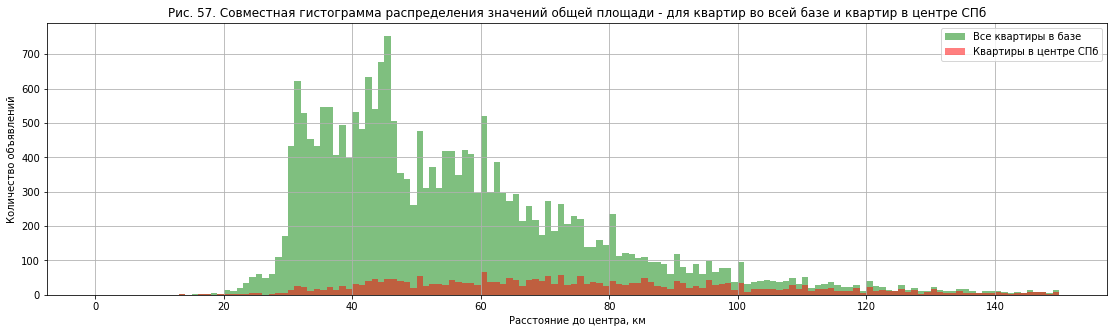

In [147]:
#построим совместную гистограмму распределения значений total_area - для всех квартир и для квартир в центре
df['total_area'].hist(bins=150, range=(0,150), figsize=(19, 5), color='green', alpha=0.5)
df.loc[df['city_centers_nearest_km']<=7, 'total_area'].hist(bins=150, range=(0,150), figsize=(19, 5), color='red', alpha=0.5);
plt.title('Рис. 57. Совместная гистограмма распределения значений общей площади - для квартир во всей базе и квартир в центре СПб');
plt.xlabel('Расстояние до центра, км');
plt.ylabel('Количество объявлений');
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

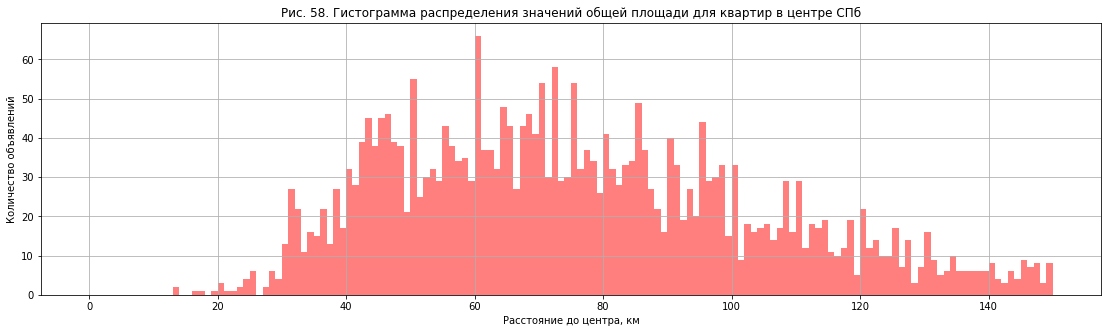

In [148]:
#построим отдельную гистограмму распределения значений total_area для квартир в центра СПб
df.loc[df['city_centers_nearest_km']<=7, 'total_area'].hist(bins=150, range=(0,150), figsize=(19, 5), color='red', alpha=0.5)
plt.title('Рис. 58. Гистограмма распределения значений общей площади для квартир в центре СПб')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Количество объявлений');

**Выводы:**
- медианная площадь квартиры в центре СПб составляет 73.4 кв.м, что на 22.2 кв.м. больше медианной площади квартир во всем датафрейме. Вероятно, это вызвано более ранней застройкой центра с преобладанием просторных квартир;
- гистограмма распределений значений площади для центра СПб похожа на нормальное распределение, при этом не выделяется трех локальных пиков, как для гистограммы по всему датафрейму - вероятно, отсутствует влияние типовой застройки.

### 3.10.2 Изучение параметра "стоимость кв.м." для квартир  в центре Санкт-Петербурга

Методом describe() получим статистическую информацию о стоимости кв.м. для квартир в центре СПб. Дополнительно запросим статистическую информацию о стоимости кв.м. для квартир во всем датафрейме (повторно, для сравнения). Построим диаграммы размаха по параметру "стоимости кв.м." как для квартир в центре, так и для всего датафрейма.

In [149]:
print('Статистическая информация о стоимости квадратного метра для квартир в центре СПб:')
df.loc[df['city_centers_nearest_km']<=7, 'square_meter_price'].describe()

Статистическая информация о стоимости квадратного метра для квартир в центре СПб:


count      3036.000000
mean     136632.535573
std       65095.455096
min       15345.000000
25%       99750.000000
50%      121533.000000
75%      150889.250000
max      848485.000000
Name: square_meter_price, dtype: float64

In [150]:
print('Статистическая информация о стоимости квадратного метра для всего датафрейма:')
df['square_meter_price'].describe()

Статистическая информация о стоимости квадратного метра для всего датафрейма:


count     22433.000000
mean      97137.853386
std       40520.382141
min        7963.000000
25%       76159.000000
50%       94565.000000
75%      113147.000000
max      848485.000000
Name: square_meter_price, dtype: float64

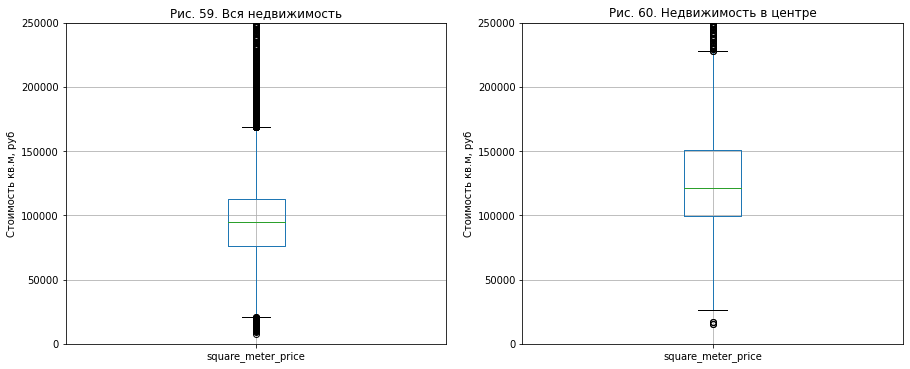

In [151]:
#построим ящик с усами для значений square_meter_price для всего датафрейма
plt.figure(figsize=(15, 13))
plt.subplot(2,2,1)
plt.ylim(0,250000)
df['square_meter_price'].plot(kind='box', grid=True)
plt.title('Рис. 59. Вся недвижимость')
plt.ylabel('Стоимость кв.м, руб');

#построим ящик с усами для значений square_meter_price для квартир в центре СПб
plt.subplot(2,2,2)
plt.ylim(0,250000)
df.loc[df['city_centers_nearest_km']<=7, 'square_meter_price'].plot(kind='box', grid=True)
plt.title('Рис. 60. Недвижимость в центре')
plt.ylabel('Стоимость кв.м, руб');

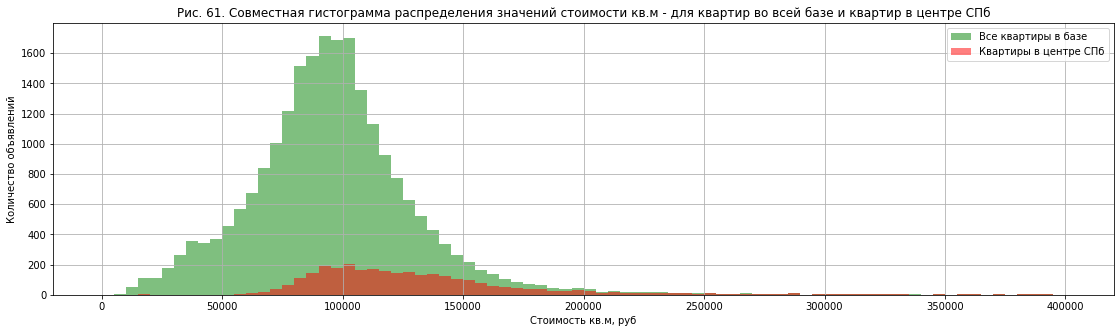

In [152]:
#построим совместную гистограмму распределения значений square_meter_price - для всех квартир и для квартир в центре
df['square_meter_price'].hist(range=(0,400000), bins=80, color='green', alpha=0.5, figsize=(19, 7))
df.loc[df['city_centers_nearest_km']<=7, 'square_meter_price'].hist(range=(0,400000), bins=80, color='red', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 61. Совместная гистограмма распределения значений стоимости кв.м - для квартир во всей базе и квартир в центре СПб');
plt.xlabel('Стоимость кв.м, руб');
plt.ylabel('Количество объявлений');
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

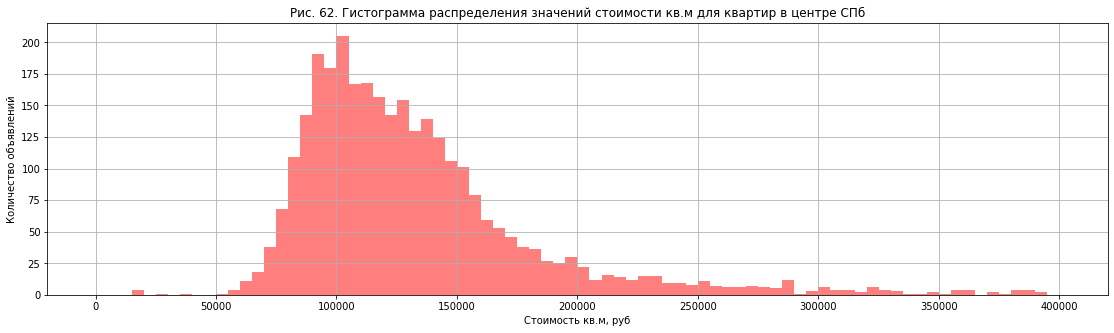

In [153]:
#построим совместную гистограмму распределения значений square_meter_price для квартир в центре
df.loc[df['city_centers_nearest_km']<=7, 'square_meter_price'].hist(range=(0,400000), bins=80, color='red', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 62. Гистограмма распределения значений стоимости кв.м для квартир в центре СПб')
plt.xlabel('Стоимость кв.м, руб')
plt.ylabel('Количество объявлений');

**Выводы:**

- медианная стоимость квадратного метра для квартир в центре СПб составляет 121.5 тыс.руб/кв.м, для всего датафрейма - 94.5 тыс.руб/кв.м., что ожидаемо - квартиры в центре дороже;
- размах нормальных значений стоимости квадратного метра для центра СПб больше, чем для всего датафрейма;
- несмотря на разные медианные стоимости кв.м., для квартир в центре СПб, как и для всего датафрейма, наиболее часто встречается цена за кв.м. от 80 до 110 тыс. руб.
- гистограмма распределения стоимости кв.м. для квартир в центре СПб похожа на нормальное распределение, скошена вправо (в отличие от гистограммы по всей базе), имеет "хвост", вытянутый в сторону удорожания.

### 3.10.3 Изучение параметра "удаленность от центра" для квартир  в центре Санкт-Петербурга

Методом describe() получим статистическую информацию о удаленности от центра для квартир в центре СПб. Построим гистограмму распределения значений `city_centers_nearest` для квартир в центре СПб.

In [154]:
df.loc[df['city_centers_nearest_km']<=7, 'city_centers_nearest'].describe()

count    3036.000000
mean     4590.704875
std      1638.138945
min       208.000000
25%      3575.000000
50%      4761.000000
75%      5838.250000
max      7498.000000
Name: city_centers_nearest, dtype: float64

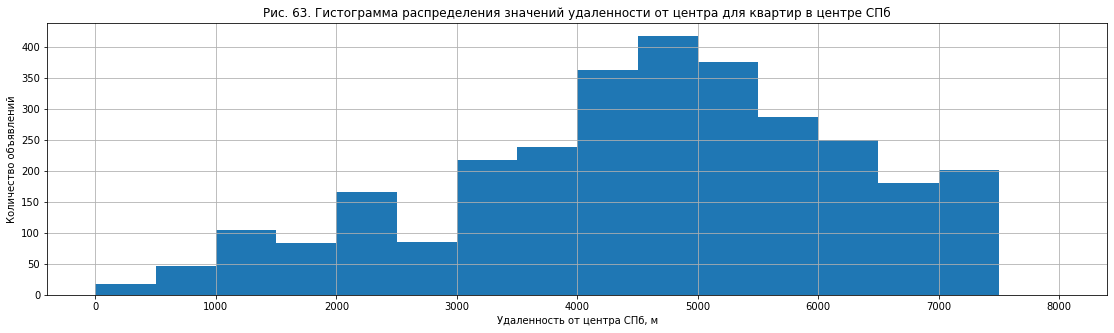

In [155]:
df.loc[df['city_centers_nearest_km']<=7, 'city_centers_nearest'].hist(bins=16, range=(0,8000), figsize=(19,5))
plt.title('Рис. 63. Гистограмма распределения значений удаленности от центра для квартир в центре СПб')
plt.xlabel('Удаленность от центра СПб, м')
plt.ylabel('Количество объявлений');

**Выводы:**
- среднее расстояние до центра СПб для сегмента квартир в центре СПб - 4.6 км, медианное - 4.8 км. 
- наиболее часто встречается недвижимость на расстоянии 4-5.5 км от центра СПб (более 1100 объявлений из 3036 объектов в центре)

### 3.10.4 Изучение параметра "число комнат" для квартир  в центре Санкт-Петербурга

Получим статистическую информацию о количестве комнат методом describe()

In [156]:
#получим статистику о числе комнат для квартир в центре СПб
df.loc[df['city_centers_nearest_km']<=7, 'rooms'].describe()

count    3036.000000
mean        2.557312
std         1.054843
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

In [157]:
#получим статистику о числе комнат для квартир во всем датафрейме
df['rooms'].describe()

count    22433.000000
mean         2.008024
std          0.945807
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

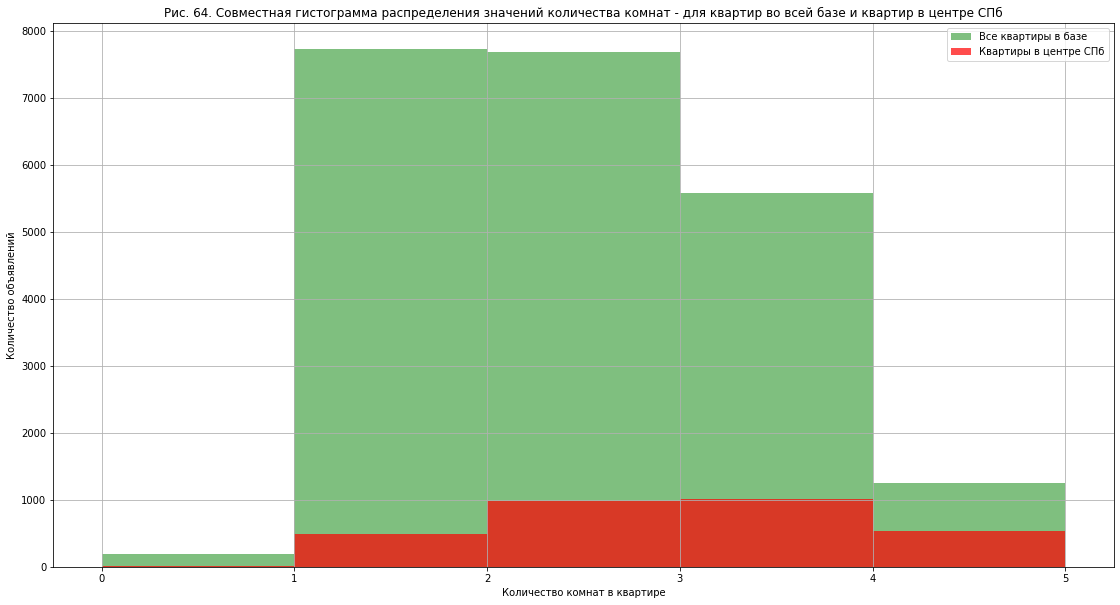

In [158]:
#построим совместную диаграмму распределения значений числа комнат для всего датафрейма (зеленый) и для квартир в центре (красный)
df['rooms'].hist(range=(0,5), bins=5, color='green', alpha=0.5, figsize=(19, 10))
df.loc[df['city_centers_nearest_km']<=7, 'rooms'].hist(range=(0,5), bins=5, color='red', alpha=0.7, figsize=(19, 10))
plt.title('Рис. 64. Совместная гистограмма распределения значений количества комнат - для квартир во всей базе и квартир в центре СПб');
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Количество объявлений')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

**Выводы:**

- медианное значение количества комнат для квартир в центре составляет 3 комнаты, для всего датафрейма - 2 комнаты;
- в целом в базе объявлений преобладат квартиры с одной и двумя комнатами, в центре СПб преобладают квартиры с двумя и тремя комнатами, что также может быть вызвано годами застройки центра СПб. Количество однокомнатных и четырехкомнатных квартир в центре СПб практически одинаково, студии и квартиры со свободной планировкой в центре СПб встречаются совсем редко.

### 3.10.5 Изучение параметра "высота потолков" для квартир  в центре Санкт-Петербурга

In [159]:
print('Статистическая информация о высоте потолков для квартир в центре СПб')
df.loc[df['city_centers_nearest_km']<=7, 'ceiling_height'].describe()

Статистическая информация о высоте потолков для квартир в центре СПб


count    1941.000000
mean        3.055750
std         0.342129
min         2.400000
25%         2.800000
50%         3.000000
75%         3.200000
max         4.800000
Name: ceiling_height, dtype: float64

In [160]:
print('Статистическая информация о высоте потолков для всего датафрейма')
df[ 'ceiling_height'].describe()

Статистическая информация о высоте потолков для всего датафрейма


count    13703.000000
mean         2.710860
std          0.252089
min          2.250000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.800000
Name: ceiling_height, dtype: float64

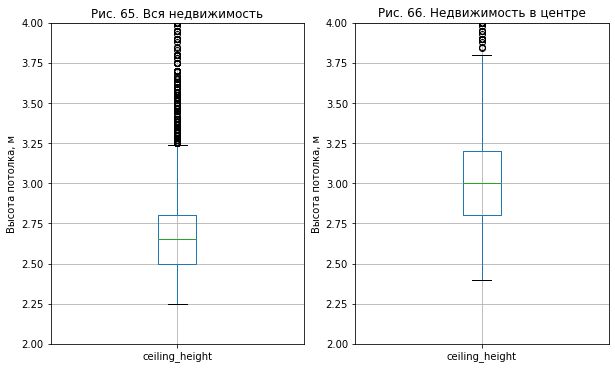

In [161]:
#построим ящик с усами для всей базы
plt.figure(figsize=(10, 13))
plt.subplot(2,2,1)
plt.ylim(2,4)
df['ceiling_height'].plot(kind='box', grid=True)
plt.title('Рис. 65. Вся недвижимость')
plt.ylabel('Высота потолка, м')

#построим ящик с усами для сегмента квартир в центре
plt.subplot(2,2,2)
plt.ylim(2,4)
df.loc[df['city_centers_nearest_km']<=7, 'ceiling_height'].plot(kind='box', grid=True)
plt.title('Рис. 66. Недвижимость в центре')
plt.ylabel('Высота потолка, м');

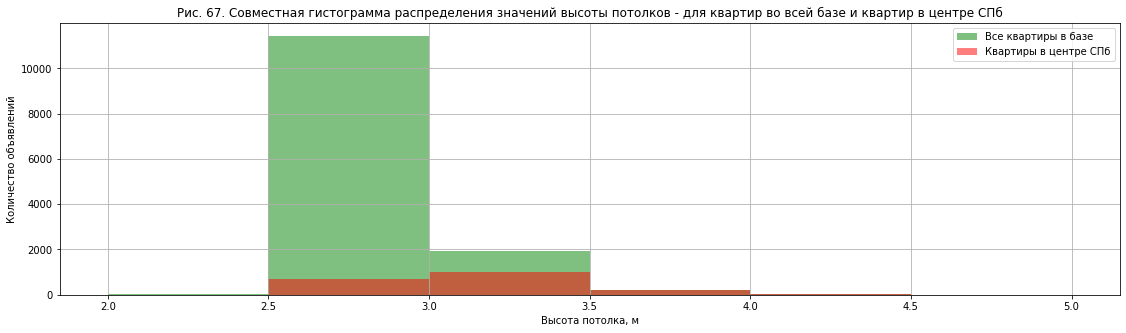

In [162]:
#построим совместную гистограмму распределения  высоты потолков для всего датафрейма и для сегмента квартир в центре
df['ceiling_height'].hist(range=(2,5), bins=6, color='green', alpha=0.5, figsize=(19, 7))
df.loc[df['city_centers_nearest_km']<=7, 'ceiling_height'].hist(range=(2,5), bins=6, color='red', alpha=0.5, figsize=(19, 5))
plt.title('Рис. 67. Совместная гистограмма распределения значений высоты потолков - для квартир во всей базе и квартир в центре СПб');
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

**Вывод:**

- для квартир в центре СПб характерны более высокие потолки, чем в целом по базе (средние значения 3.1 м и 2.7 м соответственно).
- для всего датафрейма преобладает высота потолков от 2.5 до 3 м, высота потолков от 3 до 3.5 м встречается примерно в 6 раз реже. Больше половины значений высоты потолков всего датафрейма в пределах от 3 до 3.5 м представлены квартирами в центре СПб. Все значения высоты потолков от 3.5 до 4 м в общем датафрейме представлены только квартирами в центре;
- для квартир в центре СПб преобладают потолки высотой от 3 до 3.5 м., затем - от 2.5 до 3 м, от 3.5 до 4 м. Значений свыше 4 и менее 2.5 очень мало.


### 3.10.6 Изучение влияния числа комнат на стоимость квартиры в центре СПб

Построим график зависимости медианной стоимости недвижимости в зависимости от количества комнат (синий цвет на графике - весь датафрейм, красные - квартиры в центре).

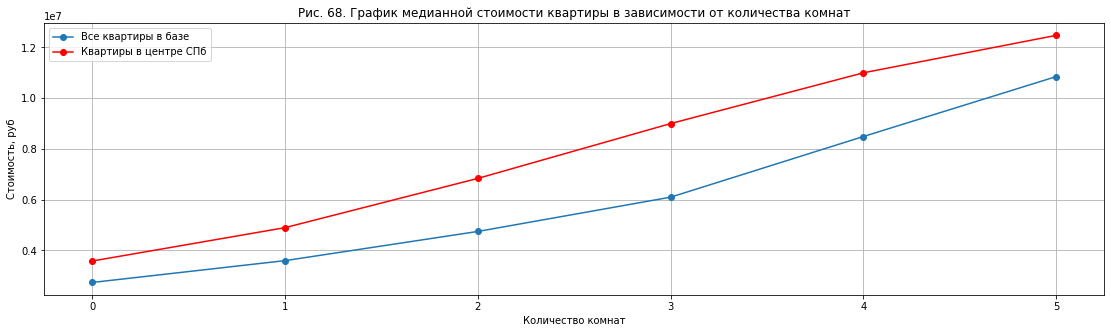

In [163]:
ax=df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(19,5))
df[df['city_centers_nearest_km']<=10].pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 68. График медианной стоимости квартиры в зависимости от количества комнат');
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=2);

Построим график зависимости медианной стоимости квадратного метра недвижимости в зависимости от количества комнат (синий цвет на графике - весь датафрейм, красные - квартиры в центре).

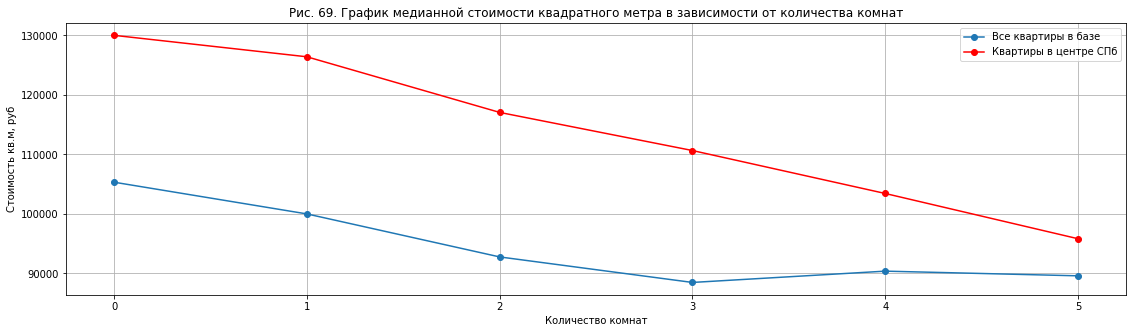

In [164]:
ax=df.pivot_table(index='rooms', values='square_meter_price', aggfunc='median').plot(style='o-', grid=True, figsize=(19,5))
df[df['city_centers_nearest_km']<=10].pivot_table(index='rooms', values='square_meter_price', aggfunc='median').plot(style='o-', grid=True, figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 69. График медианной стоимости квадратного метра в зависимости от количества комнат');
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость кв.м, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

**Выводы:**
- с увеличением числа комнат медианная стоимость квадратного метра для квартир в центре СПб снижается, что характерно для всего датафрейма в целом;
- медианная стоимость кв.м. для всего датафрейма изменялась в пределах от 130 тыс. руб/кв.м до 96 тыс. руб/кв.м (амплитуда 34 тыс.руб/кв.м), для сегмента квартир в центре - от 106 тыс.руб/кв.м. до 88 тыс.руб/кв.м (амплитуда 18 тыс.руб/кв.м);
- для количества комнат от 0 до 3 включительно медианная стоимость кв.м. для квартир в центре на 20-25 тыс.руб/кв.м больше, чем для аналогичных показателей по всему датафрейму;
- медианная стоимость квартир в центре СПб с увеличением количества комнат растет, что наблюдается и для медианной стоимости, рассчитанной по всему датафрейму. Медианная стоимость квартир в центре СПб растет с 3.6 млн до 12.5 млн, медианная стоимость квартир по всему датафрейму растет с 2.7 млн до 10.9 млн. Общая стоимость квартир в центре СПб на 2-3 млн выше, чем для аналогичных показателей по всему датафрейму.

### 3.10.7 Изучение влияния категории этажа на стоимость квартиры в центре СПб

Построим график зависимости медианной стоимости недвижимости в зависимости от этажа расположения, рассчитанной как по всему датафрейму, так и для квартир в центре СПб.

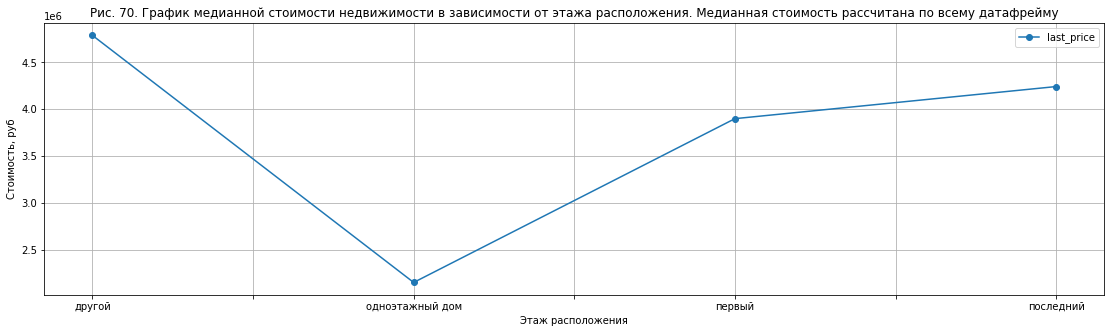

In [165]:
df.pivot_table(index='floors_category', values='last_price', aggfunc='median').plot(figsize=(19,5), grid=True, style='o-')
plt.title('Рис. 70. График медианной стоимости недвижимости в зависимости от этажа расположения. Медианная стоимость рассчитана по всему датафрейму');
plt.xlabel('Этаж расположения')
plt.ylabel('Стоимость, руб');

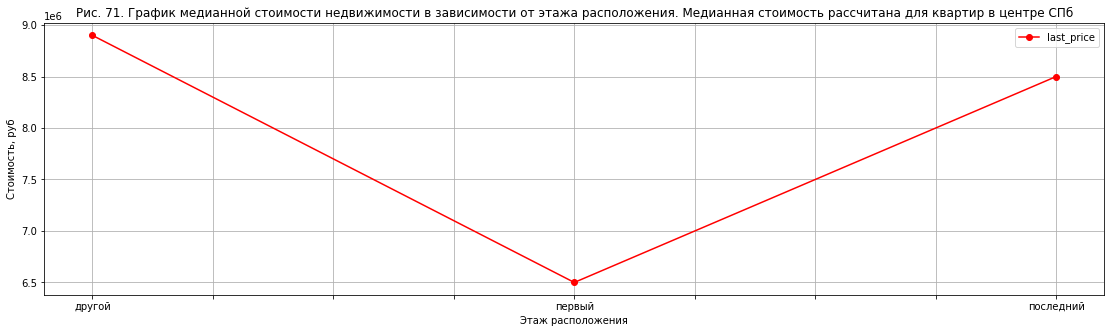

In [166]:
df[df['city_centers_nearest_km']<=7].pivot_table(index='floors_category', values='last_price', aggfunc='median').plot(figsize=(19,5), grid=True, style='o-', color='red')
plt.title('Рис. 71. График медианной стоимости недвижимости в зависимости от этажа расположения. Медианная стоимость рассчитана для квартир в центре СПб');
plt.xlabel('Этаж расположения')
plt.ylabel('Стоимость, руб');

Построим график зависимости медианной стоимости квадратного метра недвижимости в зависимости от этажа расположения, рассчитанной как по всему датафрейму, так и для квартир в центре СПб.

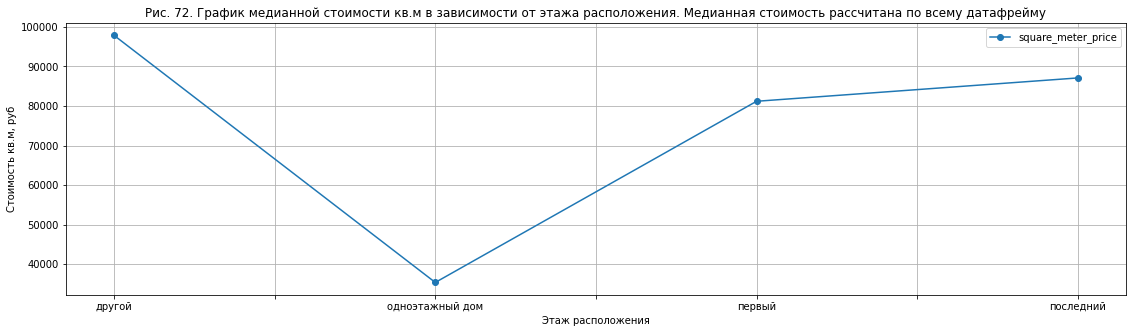

In [167]:
df.pivot_table(index='floors_category', values='square_meter_price', aggfunc='median').plot(figsize=(19,5), grid=True, style='o-')
plt.title('Рис. 72. График медианной стоимости кв.м в зависимости от этажа расположения. Медианная стоимость рассчитана по всему датафрейму');
plt.xlabel('Этаж расположения')
plt.ylabel('Стоимость кв.м, руб');

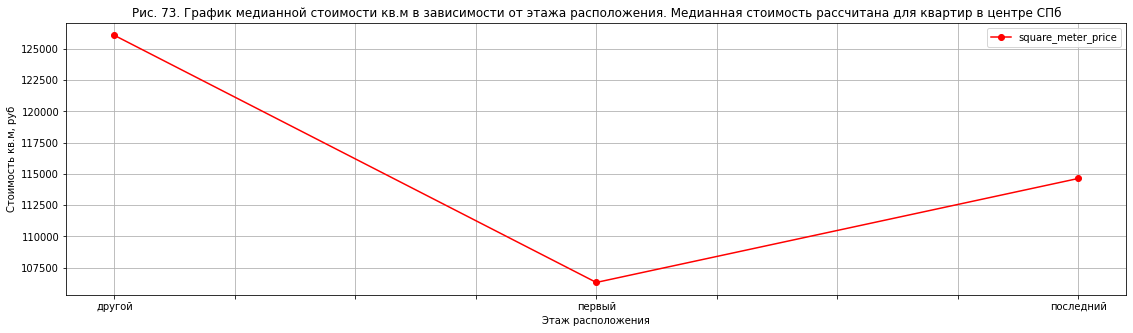

In [168]:
df[df['city_centers_nearest_km']<=7].pivot_table(index='floors_category', values='square_meter_price', aggfunc='median').plot(figsize=(19,5), grid=True, style='o-', color='red')
plt.title('Рис. 73. График медианной стоимости кв.м в зависимости от этажа расположения. Медианная стоимость рассчитана для квартир в центре СПб');
plt.xlabel('Этаж расположения')
plt.ylabel('Стоимость кв.м, руб');

**Вывод:** 
- как и во всем датафрейме, наиболее дорогие квартиры в центре СПб расположены на "другом" этаже, затем по стоимости идет последний этаж, потом первый. Одноэтажные дома в центре СПб отсутствуют. При этом изменение стоимости кв.м. и общей стоимости при изменении категории этажа для сегмента квартир в центре сопоставимо со значениями для всего датафрейма.

### 3.10.7 Изучение влияния удаленности от центра на стоимость квартиры в центре СПб

Рассчитаем коэффициент корреляции между удаленностью от центра и стоимостью кв.м. для сегмента квартир в центре СПб.

In [169]:
f"Коэффициент корреляции между удаленностью от центра и стоимостью кв.м для квартир в центре СПб: {df.loc[df['city_centers_nearest_km']<=7, 'city_centers_nearest'].corr(df['square_meter_price']):.2}"

'Коэффициент корреляции между удаленностью от центра и стоимостью кв.м для квартир в центре СПб: 0.034'

Рассчитаем коэффициент корреляции между удаленностью от центра и стоимостью квартир в центре СПб.

In [170]:
f"Коэффициент корреляции между удаленностью от центра и стоимостью квартир в центре СПб: {df.loc[df['city_centers_nearest_km']<=7, 'city_centers_nearest'].corr(df['last_price']):.2}"

'Коэффициент корреляции между удаленностью от центра и стоимостью квартир в центре СПб: 0.019'

Коэффициент корреляции близок к нулю, что может говорить о том, что:
1) связи между величинами нет;

2) связь есть, но она ослабляется другими факторами.

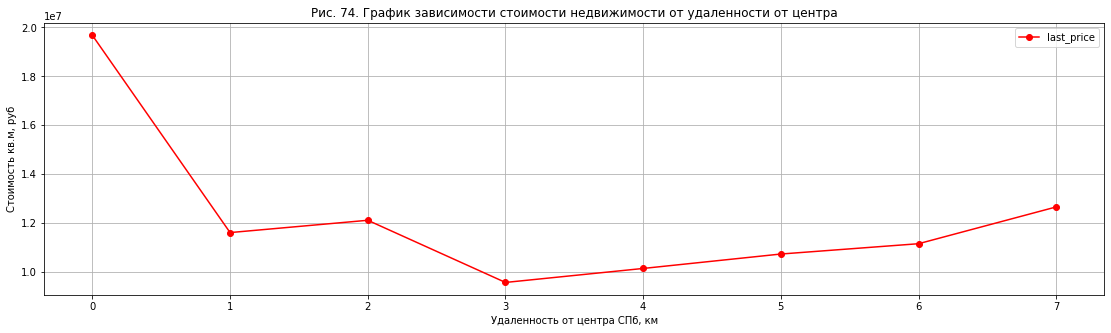

In [171]:
df[df['city_centers_nearest_km']<=7].pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(alpha=1, color='red', style='o-', figsize=(19,5), grid=True)
plt.title('Рис. 74. График зависимости стоимости недвижимости от удаленности от центра');
plt.xlabel('Удаленность от центра СПб, км')
plt.ylabel('Стоимость кв.м, руб');

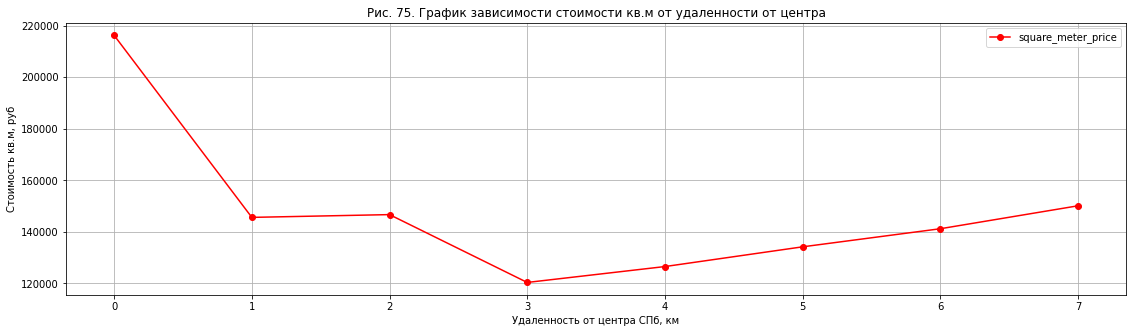

In [172]:
df[df['city_centers_nearest_km']<=7].pivot_table(index='city_centers_nearest_km', values='square_meter_price', aggfunc='mean').plot(alpha=1, color='red', style='o-', figsize=(19,5), grid=True)
plt.title('Рис. 75. График зависимости стоимости кв.м от удаленности от центра');
plt.xlabel('Удаленность от центра СПб, км')
plt.ylabel('Стоимость кв.м, руб');

**Выводы:**
- для всего датафрейма при увеличении расстояния от центра стоимость кв.м. снижается. Такой или обратной зависимости для сегмента квартир в центре СПб не выявлено. Однако можно отметить, что при удаленности от 0 до 3 км стоимость (общая и за кв.м) снижается, после чего начинает расти;
- характер графиков зависимости медианной стоимости кв.м. и медианной общей стоимости от удаленности от центра СПб практически совпадает;
- амплитуда изменения стоимости кв.м недвижимости в центре СПб - 200 тыс.руб/кв.м, общей стоимости - 12 млн.руб.

### 3.10.7 Изучение влияния даты размещения объявления на стоимость квартиры в центре СПб

Построим график **медианной стоимости квартиры** в зависимости от года размещения объявления. Медианную стоимость рассчитаем как по всему датафрейму (синий цвет на графике, рис. 76), так и для квартир в центре СПб (красный цвет на графике, рис. 76)

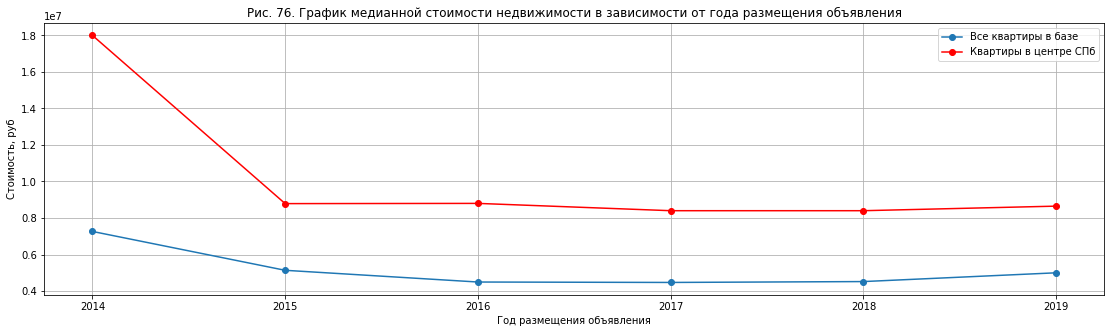

In [173]:
ax=df.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
df[df['city_centers_nearest_km']<=7].pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 76. График медианной стоимости недвижимости в зависимости от года размещения объявления');
plt.xlabel('Год размещения объявления')
plt.ylabel('Стоимость, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

Построим график **медианной стоимости кв.м.** в зависимости от года размещения объявления. Медианную стоимость рассчитаем как по всему датафрейму (синий цвет на графике, рис. 77), так и для квартир в центре СПб (красный цвет на графике, рис. 77)

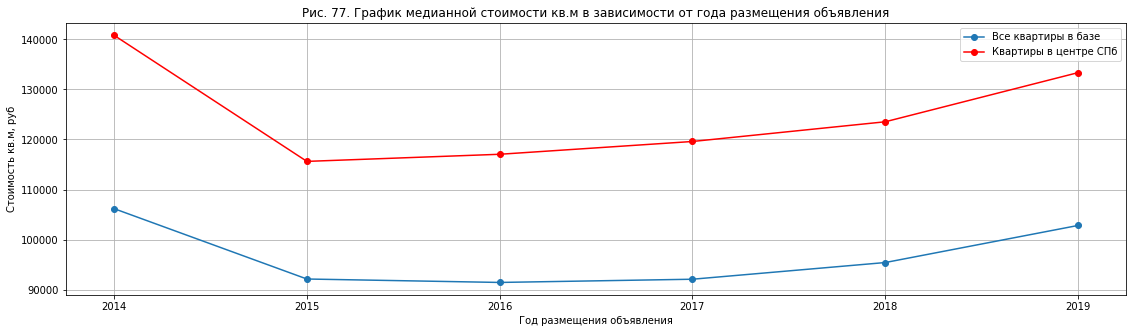

In [174]:
ax=df.pivot_table(index='year', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
df[df['city_centers_nearest_km']<=7].pivot_table(index='year', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 77. График медианной стоимости кв.м в зависимости от года размещения объявления');
plt.xlabel('Год размещения объявления')
plt.ylabel('Стоимость кв.м, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

Построим график **медианной стоимости квартиры** в зависимости от месяца размещения объявления. Медианную стоимость рассчитаем как по всему датафрейму (синий цвет на графике, рис. 78), так и для квартир в центре СПб (красный цвет на графике, рис. 78)

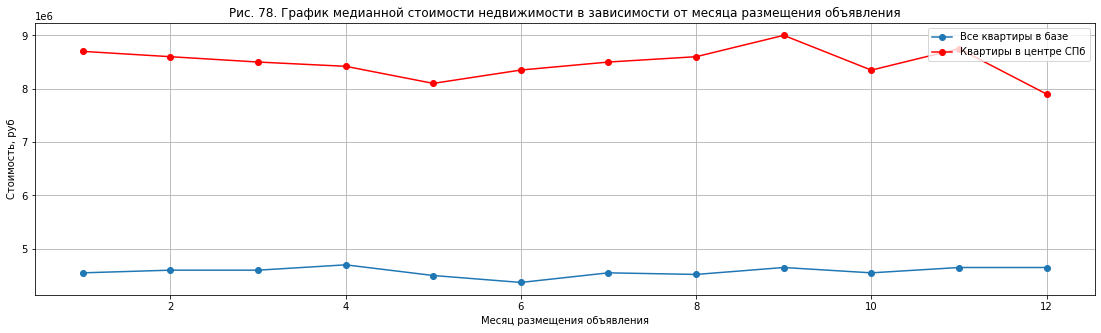

In [175]:
ax=df.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
df[df['city_centers_nearest_km']<=7].pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 78. График медианной стоимости недвижимости в зависимости от месяца размещения объявления');
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Стоимость, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

Построим график **медианной стоимости кв.м** в зависимости от месяца размещения объявления. Медианную стоимость рассчитаем как по всему датафрейму (синий цвет на графике, рис. 79), так и для квартир в центре СПб (красный цвет на графике, рис. 79)

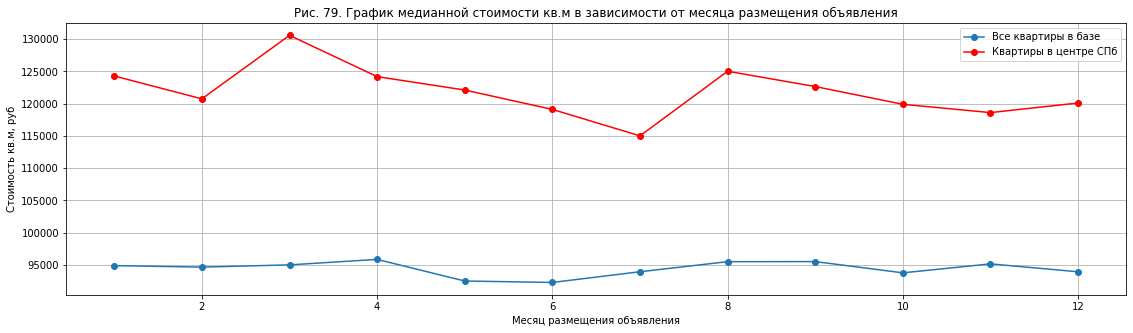

In [176]:
ax=df.pivot_table(index='month', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
df[df['city_centers_nearest_km']<=7].pivot_table(index='month', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 79. График медианной стоимости кв.м в зависимости от месяца размещения объявления');
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Стоимость кв.м, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=1);

Построим график **медианной стоимости квартиры** в зависимости от дня недели размещения объявления. Медианную стоимость рассчитаем как по всему датафрейму (синий цвет на графике, рис. 80), так и для квартир в центре СПб (красный цвет на графике, рис. 80)

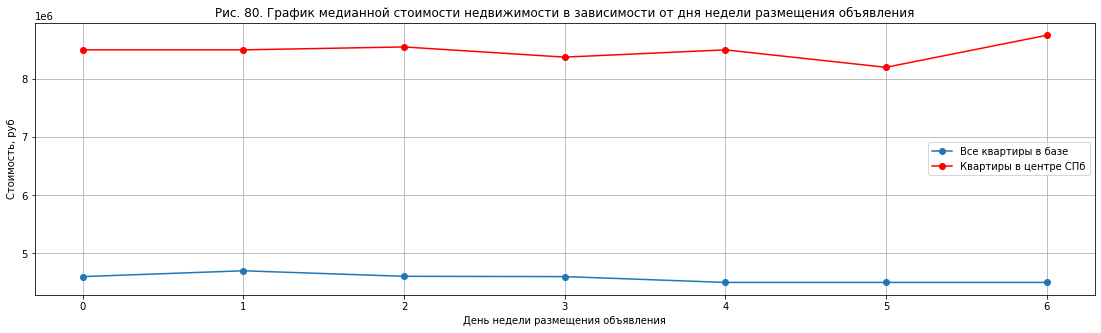

In [177]:
ax=df.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
df[df['city_centers_nearest_km']<=7].pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 80. График медианной стоимости недвижимости в зависимости от дня недели размещения объявления');
plt.xlabel('День недели размещения объявления')
plt.ylabel('Стоимость, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=0);

Построим график **медианной стоимости кв.м** в зависимости от дня недели размещения объявления. Медианную стоимость рассчитаем как по всему датафрейму (синий цвет на графике, рис. 81), так и для квартир в центре СПб (красный цвет на графике, рис. 81)

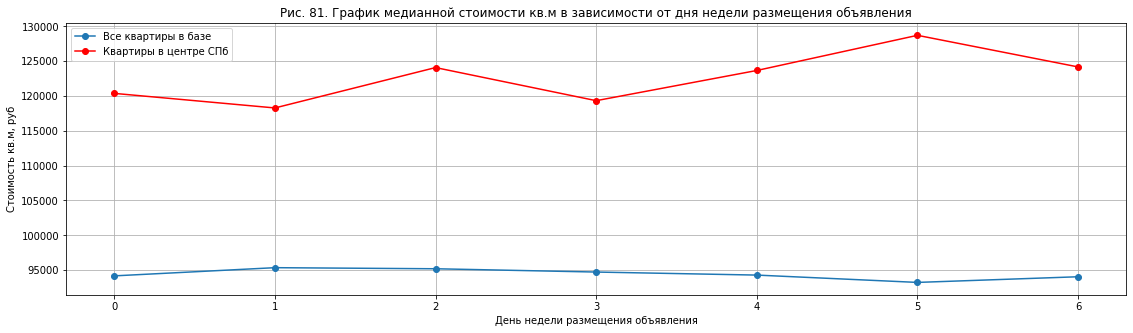

In [178]:
ax=df.pivot_table(index='weekday', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5))
df[df['city_centers_nearest_km']<=7].pivot_table(index='weekday', values='square_meter_price', aggfunc='median').plot(grid=True, style='o-', figsize=(19,5), ax=ax, color='red')
plt.title('Рис. 81. График медианной стоимости кв.м в зависимости от дня недели размещения объявления');
plt.xlabel('День недели размещения объявления')
plt.ylabel('Стоимость кв.м, руб')
plt.legend(['Все квартиры в базе','Квартиры в центре СПб'], loc=0);

**Выводы:**

- изменение медианной стоимости кв.м. и медианной общей стоимости недвижимости в зависимости от года размещения объявления для сегмента недвижимости в центре СПб имеет тот же характер, что и для всего датафрейма. Полученный результат может быть объяснен тем, что медианная годовая стоимость кв.м. менялась вследствие глобальных событий, затрагивающих весь рынок недвижимости, а не отдельные его сегменты (например, в радиусе 7 км от центра СПб :) );
- в целом график медианной стоимость кв.м. и медианной общей стоимости недвижимости в зависимости от месяца размещения объявления повторяет характер аналогичного графика для всего датафрейма;
- график изменения медианной стоимости кв.м. в зависимости от для недели для сегмента квартир в центре СПб и для всего датафрейма имеют разный характер: в первом случае к выходным цена увеличивается, во втором - уменьшается. Колебание цены кв.м. для квартир в центре СПб происходит в пределах 10 тыс. руб/кв.м, для всего датафрейма - в пределах 2.5 тысяч.
- медианная общая стоимость недвижимости в центре СПб, как и стоимость кв.м., от значений для всего датафрейма отличается амплитудой (550 тыс.руб у квартир в центре СПб и 200 тыс. руб для всего датафрейма) и более пилообразным характером графика.

# 4. Общий вывод

В рамках выполнения проекта было проведено:
1. Исследование влияния на стоимость недвижимости таких факторов, как: площадь, число комнат, удаленность от центра, этаж расположения, а также дата размещения объявления о продаже - для всего датафрейма и отдельно для сегмента квартир в центре Санкт-Петербурга;
2. Среди десяти населенных пунктов с наибольшим количеством объявлений выявлены населенные пункты с самой высокой и самой низкой стоимостью жилья;
3. Исследован срок продажи недвижимости.


В результате исследования получены следующие выводы:
1. Медианное значение стоимости квадратного метра за 2014-2019 гг. составляет 95 тыс. руб. за кв. м., медианное значение общей стоимости - 4.6 млн. руб.
2. При увеличении площади квартиры ее общая стоимость растет, коэффициент корреляции 0.7.
3. При увеличении числа комнат общая стоимость квартиры увеличивается, однако стоимость квадратного метра снижается, что, вероятно, вызвано низким спросом на многокомнатные квартиры. Максимальная медианная стоимость квадратного метра наблюдается у квартир студий и квартир со свободной планировкой (105 тыс.руб/кв.м.), минимальная - у квартир с количеством комнат более трех (88-90 тыс.руб/кв.м).
4. Для Санкт-Петербурга и Ленинградской области при увеличении расстояния от центра СПб до продаваемой квартиры стоимость квадратного метра снижается с коэффициентом корреляции -0.7.Исключение составляет район в центре СПб (удаленность от центра 0-9 км), и населенные пункты на расстоянии 52-55 км от центра СПб - для этих районов коэффициент корреляции близок к нулю - вероятно, влияют другие факторы.
5. Цена кв.м. зависит от этажа расположения квартиры: наиболее дорогие квартиры расположены на "другом" этаже (не на первом и не на последнем, 98 тыс.руб/кв.м.), затем - квартиры на последнем этаже (87 тыс.руб/кв.м), после - квартиры на первом этаже (81 тыс.руб/кв.м). Отдельно можно выделить недвижимость в одноэтажных домах в Ленинградской области с ценой 35 тыс.руб/кв.м. Общая стоимость квартир на "другом" этаже составляет 4.8 млн, на последнем - 4.2 млн, на первом - 3.9 млн.
6. С 2014 г. по 2016 г. медианная стоимость кв.м. снижалась, однако после 2016 г. начался непрерывный рост, и в 2019 г. медианная стоимость кв.м. достигает 103 тыс.руб. Нельзя сказать, что стоимость кв.м. зависит от года размещения объявления, однако с 2016 г. присутствует тенденция роста цены. Четкая зависимость между стоимостью кв.м. и месяцем/днем недели размещения объявления не выявлена. 
7. С 2014 по 2016 г. медианная общая стоимость недвижимости снизилась с 7.3 млн руб до 4.5 млн руб, с 2016 по 2018 держалась на уровне 4.5 млн руб (что, вероятно, вызвано уменьшением площади продаваемых квартир совместно с увеличением стоимости квадратного метра), с 2018 по 2019 выросла до 5 млн, однако не достигла значения 2014-го года на 46%. Подобная динамика медианной общей стоимости может быть обусловлена совместным влиянием изменения стоимости кв.м. и уменьшения общей площади продаваемой недвижимости, наблюдавшейся с 2014 по 2018 гг.
8. К центру Санкт-Петербурга отнесены объекты с удаленностью от центра 0-7 км. Для этого сегмента выделены следующие особенности:

     8.1 Для квартир в центре СПб медианное значение площади, количества комнат и высоты потолков, больше, чем для всего датафрейма  в целом. Вероятно, это вызвано преобладанием более старой застройки по сравнению с окраинными районами СПб и Ленинградской областью.
     8.2 При прочих равных условиях квартиры в центре СПб дороже. Медианное значение стоимости кв.м. для центра СПб составляет 122 тыс. руб/кв.м, что на 27 тысяч больше аналогичного показателя для всего датафрейма.    
     8.3 В пределах от 0 до 7 км от центра СПб корреляция между ценой кв.м. и удаленностью от центра города отсутствует. В остальном зависимость стоимости кв.м. в центре СПб от числа комнат, этажа, даты размещения соответствует аналогичным показателям для всего датафрейма.
   
   
9. Список с десятью населенными пунктами с наибольшим количеством объявлений включает (по уменьшению средней стоимости кв.м.): Санкт-Петербург (112 тыс.руб/кв.м), Пушкин (103 тыс.руб/кв.м), Кудрово (95 тыс.руб/кв.м), Парголово поселок (90 тыс.руб/кв.м), Мурино (86 тыс.руб/кв.м), Шушары (78 тыс.руб/кв.м), Колпино (75 тыс.руб/кв.м), Гатчина (69 тыс.руб/кв.м), Всеволожск (69 тыс.руб/кв.м), Выборг (58 тыс.руб/кв.м).
10. Время продажи недвижимости зависит от количества комнат в квартире: при увеличении количества комнат растет и время продажи. Ожидаемый срок продажи студии или квартиры со свободной планировкой: около 1.5 месяцев, одно- и двухкомнатных квартир - 3 месяца, четырехкомнатной квартиры и более - от пяти месяцев.

<div align="center"><b> КОТИК ДЛЯ РЕВЬЮЕРА :) </b></div> 
<img src="https://srisovki-online.ru/wp-content/uploads/2021/05/66-2-1024x768.jpg" align=center width=500, heigth=50>